In [84]:
import warnings
warnings.filterwarnings("ignore")
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import seaborn as sns
import datetime
import matplotlib.pyplot as plt


# Create a bar chart or histogram to visualize the distribution of a categorical or continuous variable, such as the distribution of ages or genders in a population.

In [20]:
df=pd.read_csv(r"C:\Users\k siva rao\Downloads\Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_85.csv")

In [21]:
df

Country Code                      Region          IncomeGroup  \
0            ABW   Latin America & Caribbean          High income   
1            AFE                         NaN                  NaN   
2            AFG                  South Asia           Low income   
3            AFW                         NaN                  NaN   
4            AGO          Sub-Saharan Africa  Lower middle income   
..           ...                         ...                  ...   
260          XKX       Europe & Central Asia  Upper middle income   
261          YEM  Middle East & North Africa           Low income   
262          ZAF          Sub-Saharan Africa  Upper middle income   
263          ZMB          Sub-Saharan Africa  Lower middle income   
264          ZWE          Sub-Saharan Africa  Lower middle income   

                                          SpecialNotes  \
0                                                  NaN   
1    26 countries, stretching from the Red Sea in t...   
2    The reporting period for national accounts dat...   
3    22 countries, stretching from the westernmost ...   
4    The World Bank systematically assesses the app...   
..                                                 ...   
260                                                NaN   
261  The World Bank systematically assesses the app...   
262  Fiscal year end: March 31; reporting period fo...   
263  National accounts data were rebased to reflect...   
264  National Accounts data are reported in Zimbabw...   

                       TableName  Unnamed: 5  
0                          Aruba         NaN  
1    Africa Eastern and Southern         NaN  
2                    Afghanistan         NaN  
3     Africa Western and Central         NaN  
4                         Angola         NaN  
..                           ...         ...  
260                       Kosovo         NaN  
261                  Yemen, Rep.         NaN  
262                 South Africa         NaN  
263                       Zambia         NaN  
264                     Zimbabwe         NaN  

[265 rows x 6 columns]

In [23]:
df1=pd.read_csv(r"C:\Users\k siva rao\Downloads\Metadata_Indicator_API_SP.POP.TOTL_DS2_en_csv_v2_85.csv")

In [24]:
df1

INDICATOR_CODE     INDICATOR_NAME  \
0    SP.POP.TOTL  Population, total   

                                         SOURCE_NOTE  \
0  Total population is based on the de facto defi...   

                                 SOURCE_ORGANIZATION  Unnamed: 4  
0  (1) United Nations Population Division. World ...         NaN

In [30]:
df2=pd.read_csv(r"C:\Users\k siva rao\Downloads\Pop_data1.csv")

In [31]:
df2

Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54608.0      55811.0      56682.0      57475.0   
1      SP.POP.TOTL  130692579.0  134169237.0  137835590.0  141630546.0   
2      SP.POP.TOTL    8622466.0    8790140.0    8969047.0    9157465.0   
3      SP.POP.TOTL   97256290.0   99314028.0  101445032.0  103667517.0   
4      SP.POP.TOTL    5357195.0    5441333.0    5521400.0    5599827.0   
..             ...          ...          ...          ...          ...   
261    SP.POP.TOTL   16520441.0   16989464.0   17503133.0   18042215.0   
262    SP.POP.TOTL    3119430.0    3219451.0    3323427.0    3431381.0   
263    SP.POP.TOTL    3806310.0    3925952.0    4049778.0    4177931.0   
264    SP.POP.TOTL          NaN          NaN          NaN          NaN   
265    SP.POP.TOTL          NaN          NaN          NaN          NaN   

            1964         1965  ...         2013         2014         2015  \
0        58178.0      58782.0  ...     102880.0     103594.0     104257.0   
1    145605995.0  149742351.0  ...  567892149.0  583651101.0  600008424.0   
2      9355514.0    9565147.0  ...   31541209.0   32716210.0   33753499.0   
3    105959979.0  108336203.0  ...  387204553.0  397855507.0  408690375.0   
4      5673199.0    5736582.0  ...   26147002.0   27128337.0   28127721.0   
..           ...          ...  ...          ...          ...          ...   
261   18603097.0   19187194.0  ...   26984002.0   27753304.0   28516545.0   
262    3542764.0    3658024.0  ...   53873616.0   54729551.0   55876504.0   
263    4310332.0    4447149.0  ...   15234976.0   15737793.0   16248230.0   
264          NaN          NaN  ...   13555422.0   13855753.0   14154937.0   
265          NaN          NaN  ...          NaN          NaN          NaN   

            2016         2017         2018         2019         2020  \
0       104874.0     105439.0     105962.0     106442.0     106585.0   
1    616377605.0  632746570.0  649757148.0  667242986.0  685112979.0   
2     34636207.0   35643418.0   36686784.0   37769499.0   38972230.0   
3    419778384.0  431138704.0  442646825.0  454306063.0  466189102.0   
4     29154746.0   30208628.0   31273533.0   32353588.0   33428486.0   
..           ...          ...          ...          ...          ...   
261   29274002.0   30034389.0   30790513.0   31546691.0   32284046.0   
262   56422274.0   56641209.0   57339635.0   58087055.0   58801927.0   
263   16767761.0   17298054.0   17835893.0   18380477.0   18927715.0   
264   14452704.0   14751101.0   15052184.0   15354608.0   15669666.0   
265          NaN          NaN          NaN          NaN          NaN   

            2021         2022  
0       106537.0     106445.0  
1    702977106.0  720859132.0  
2     40099462.0   41128771.0  
3    478185907.0  490330870.0  
4     34503774.0   35588987.0  
..           ...          ...  
261   32981641.0   33696614.0  
262   59392255.0   59893885.0  
263   19473125.0   20017675.0  
264   15993524.0   16320537.0  
265          NaN          NaN  

[266 rows x 67 columns]

In [38]:
df2.duplicated().sum()

0

In [40]:
df2.isna().sum().any()

True

In [41]:
df2=df2.fillna(method="ffill")
df2

Country Name Country Code     Indicator Name  \
0                          Aruba          ABW  Population, total   
1    Africa Eastern and Southern          AFE  Population, total   
2                    Afghanistan          AFG  Population, total   
3     Africa Western and Central          AFW  Population, total   
4                         Angola          AGO  Population, total   
..                           ...          ...                ...   
261                       Kosovo          XKX  Population, total   
262                  Yemen, Rep.          YEM  Population, total   
263                 South Africa          ZAF  Population, total   
264                       Zambia          ZMB  Population, total   
265                     Zimbabwe          ZWE  Population, total   

    Indicator Code         1960         1961         1962         1963  \
0      SP.POP.TOTL      54608.0      55811.0      56682.0      57475.0   
1      SP.POP.TOTL  130692579.0  134169237.0  137835590.0  141630546.0   
2      SP.POP.TOTL    8622466.0    8790140.0    8969047.0    9157465.0   
3      SP.POP.TOTL   97256290.0   99314028.0  101445032.0  103667517.0   
4      SP.POP.TOTL    5357195.0    5441333.0    5521400.0    5599827.0   
..             ...          ...          ...          ...          ...   
261    SP.POP.TOTL   16520441.0   16989464.0   17503133.0   18042215.0   
262    SP.POP.TOTL    3119430.0    3219451.0    3323427.0    3431381.0   
263    SP.POP.TOTL    3806310.0    3925952.0    4049778.0    4177931.0   
264    SP.POP.TOTL    3806310.0    3925952.0    4049778.0    4177931.0   
265    SP.POP.TOTL    3806310.0    3925952.0    4049778.0    4177931.0   

            1964         1965  ...         2013         2014         2015  \
0        58178.0      58782.0  ...     102880.0     103594.0     104257.0   
1    145605995.0  149742351.0  ...  567892149.0  583651101.0  600008424.0   
2      9355514.0    9565147.0  ...   31541209.0   32716210.0   33753499.0   
3    105959979.0  108336203.0  ...  387204553.0  397855507.0  408690375.0   
4      5673199.0    5736582.0  ...   26147002.0   27128337.0   28127721.0   
..           ...          ...  ...          ...          ...          ...   
261   18603097.0   19187194.0  ...   26984002.0   27753304.0   28516545.0   
262    3542764.0    3658024.0  ...   53873616.0   54729551.0   55876504.0   
263    4310332.0    4447149.0  ...   15234976.0   15737793.0   16248230.0   
264    4310332.0    4447149.0  ...   13555422.0   13855753.0   14154937.0   
265    4310332.0    4447149.0  ...   13555422.0   13855753.0   14154937.0   

            2016         2017         2018         2019         2020  \
0       104874.0     105439.0     105962.0     106442.0     106585.0   
1    616377605.0  632746570.0  649757148.0  667242986.0  685112979.0   
2     34636207.0   35643418.0   36686784.0   37769499.0   38972230.0   
3    419778384.0  431138704.0  442646825.0  454306063.0  466189102.0   
4     29154746.0   30208628.0   31273533.0   32353588.0   33428486.0   
..           ...          ...          ...          ...          ...   
261   29274002.0   30034389.0   30790513.0   31546691.0   32284046.0   
262   56422274.0   56641209.0   57339635.0   58087055.0   58801927.0   
263   16767761.0   17298054.0   17835893.0   18380477.0   18927715.0   
264   14452704.0   14751101.0   15052184.0   15354608.0   15669666.0   
265   14452704.0   14751101.0   15052184.0   15354608.0   15669666.0   

            2021         2022  
0       106537.0     106445.0  
1    702977106.0  720859132.0  
2     40099462.0   41128771.0  
3    478185907.0  490330870.0  
4     34503774.0   35588987.0  
..           ...          ...  
261   32981641.0   33696614.0  
262   59392255.0   59893885.0  
263   19473125.0   20017675.0  
264   15993524.0   16320537.0  
265   15993524.0   16320537.0  

[266 rows x 67 columns]

In [42]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 67 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            266 non-null    float64
 5   1961            266 non-null    float64
 6   1962            266 non-null    float64
 7   1963            266 non-null    float64
 8   1964            266 non-null    float64
 9   1965            266 non-null    float64
 10  1966            266 non-null    float64
 11  1967            266 non-null    float64
 12  1968            266 non-null    float64
 13  1969            266 non-null    float64
 14  1970            266 non-null    float64
 15  1971            266 non-null    float64
 16  1972            266 non-null    float64
 17  1973            266 non-null    flo

In [43]:
df2["Country Name"].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

In [44]:
df2["Country Code"].unique()

array(['ABW', 'AFE', 'AFG', 'AFW', 'AGO', 'ALB', 'AND', 'ARB', 'ARE',
       'ARG', 'ARM', 'ASM', 'ATG', 'AUS', 'AUT', 'AZE', 'BDI', 'BEL',
       'BEN', 'BFA', 'BGD', 'BGR', 'BHR', 'BHS', 'BIH', 'BLR', 'BLZ',
       'BMU', 'BOL', 'BRA', 'BRB', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CEB', 'CHE', 'CHI', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COG',
       'COL', 'COM', 'CPV', 'CRI', 'CSS', 'CUB', 'CUW', 'CYM', 'CYP',
       'CZE', 'DEU', 'DJI', 'DMA', 'DNK', 'DOM', 'DZA', 'EAP', 'EAR',
       'EAS', 'ECA', 'ECS', 'ECU', 'EGY', 'EMU', 'ERI', 'ESP', 'EST',
       'ETH', 'EUU', 'FCS', 'FIN', 'FJI', 'FRA', 'FRO', 'FSM', 'GAB',
       'GBR', 'GEO', 'GHA', 'GIB', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GRD', 'GRL', 'GTM', 'GUM', 'GUY', 'HIC', 'HKG', 'HND', 'HPC',
       'HRV', 'HTI', 'HUN', 'IBD', 'IBT', 'IDA', 'IDB', 'IDN', 'IDX',
       'IMN', 'IND', 'INX', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA',
       'JAM', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KIR', 'KNA',
       'KOR', 'KWT',

In [45]:
df2["Indicator Name"].unique()

array(['Population, total'], dtype=object)

In [46]:
df2["Indicator Code"].unique()

array(['SP.POP.TOTL'], dtype=object)

In [66]:
df2.drop(['Country Code','Indicator Code','Indicator Name'],axis=1,inplace=True)

In [67]:
cols=['1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022']

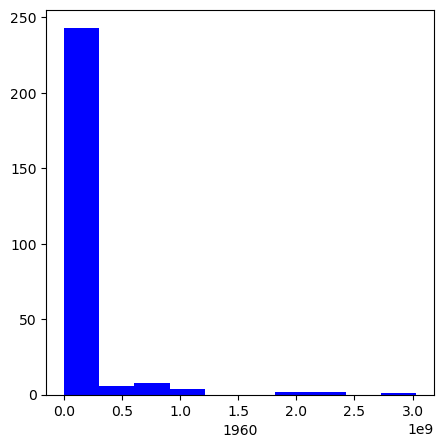

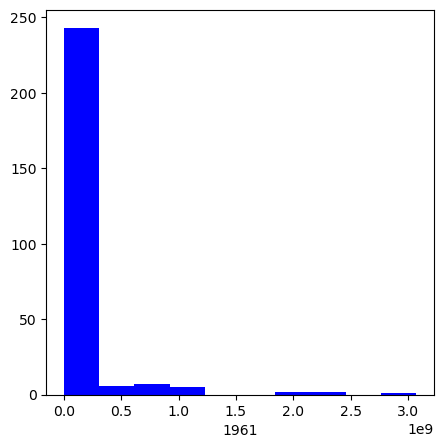

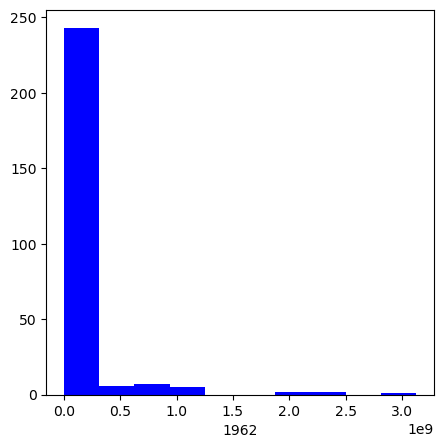

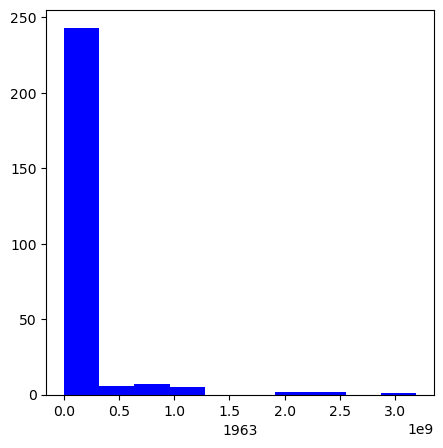

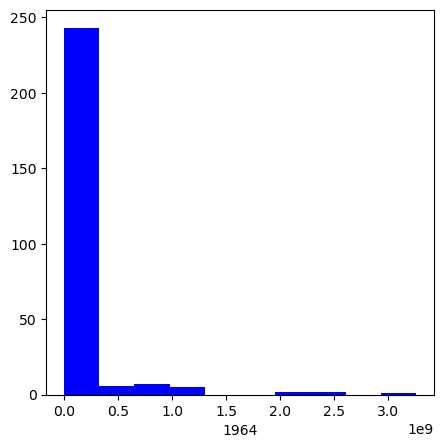

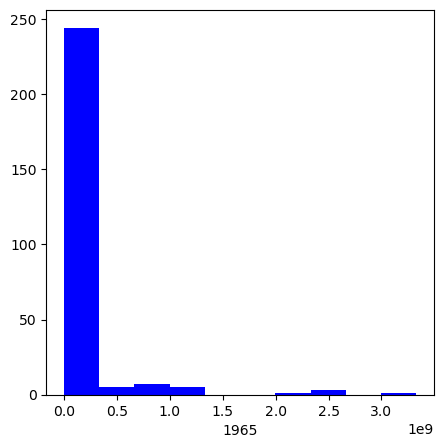

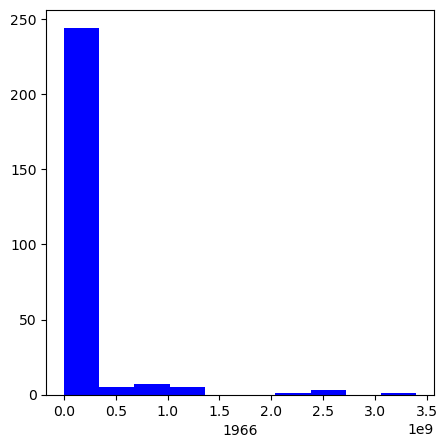

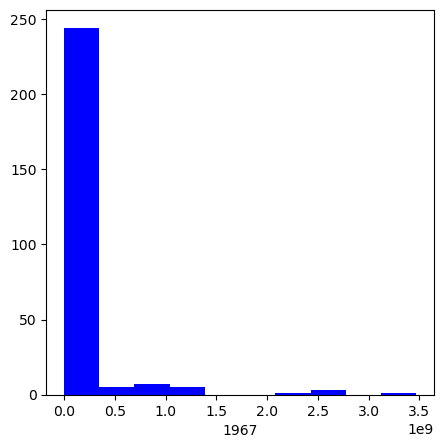

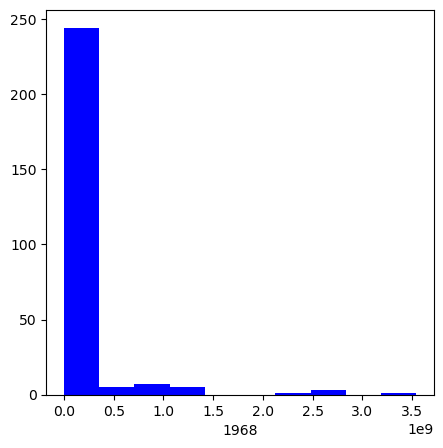

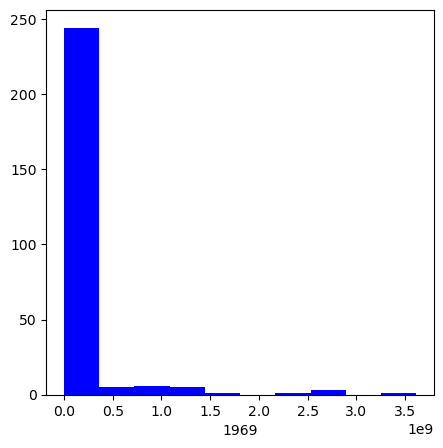

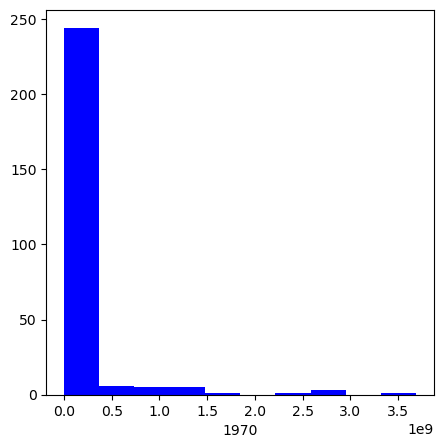

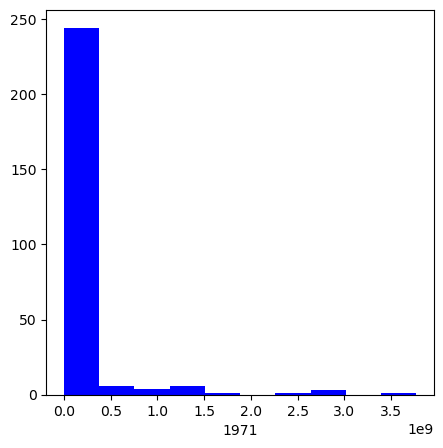

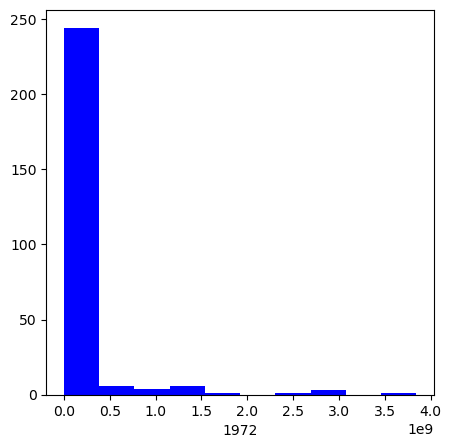

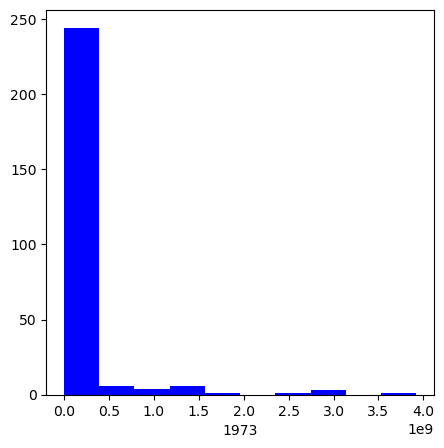

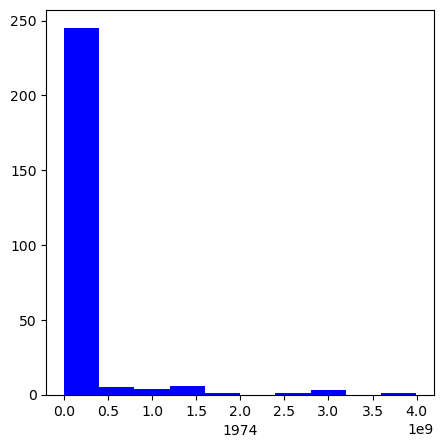

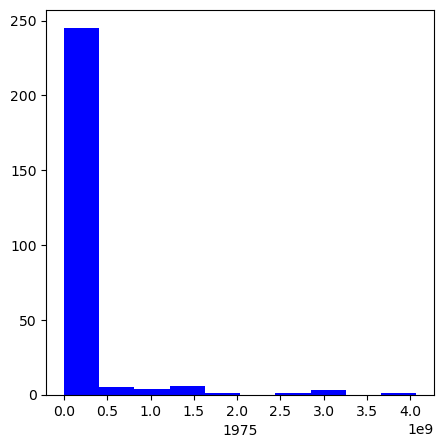

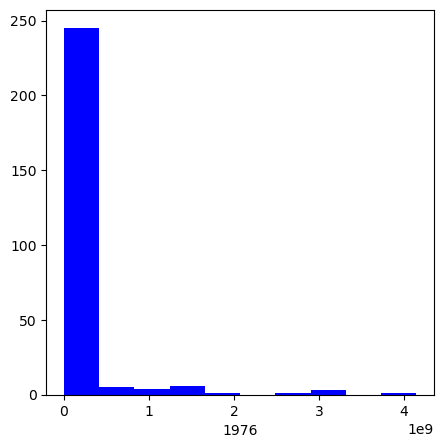

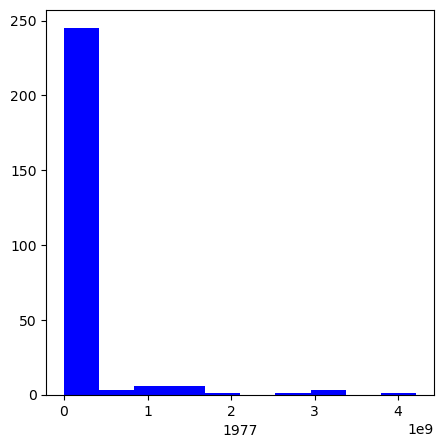

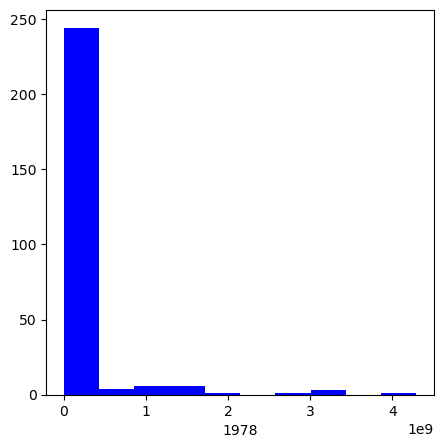

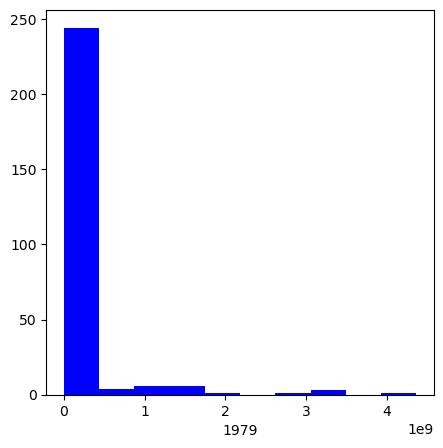

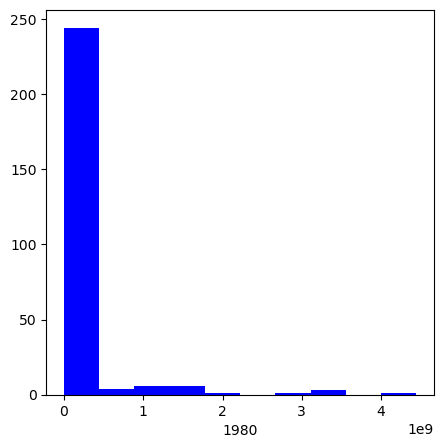

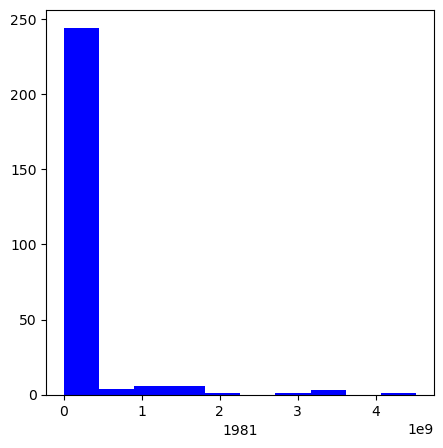

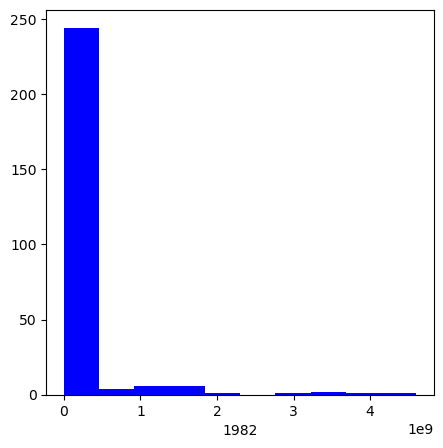

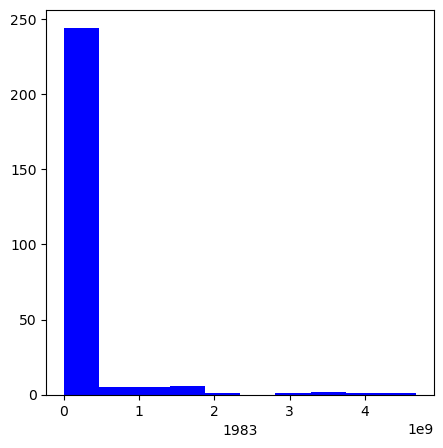

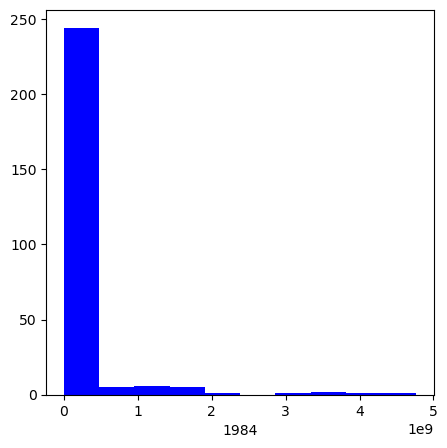

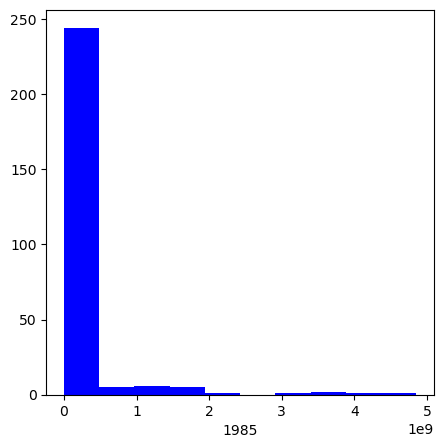

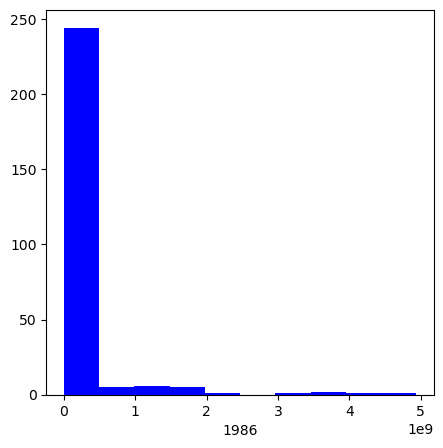

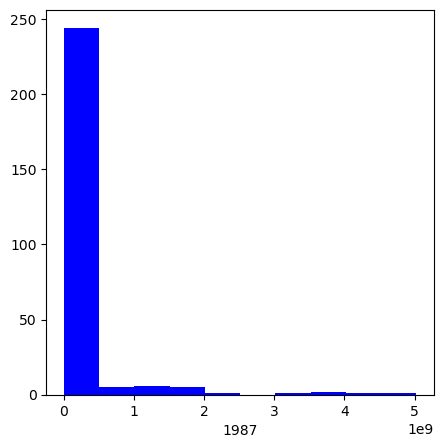

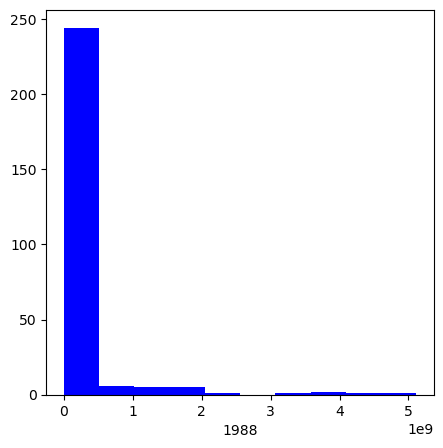

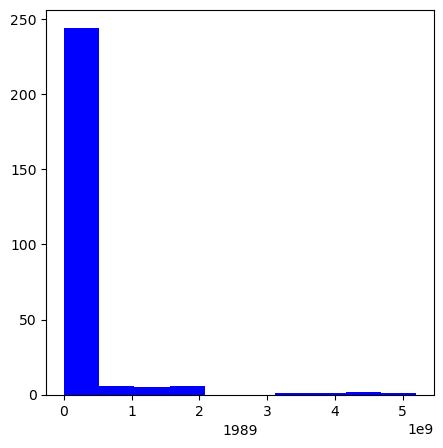

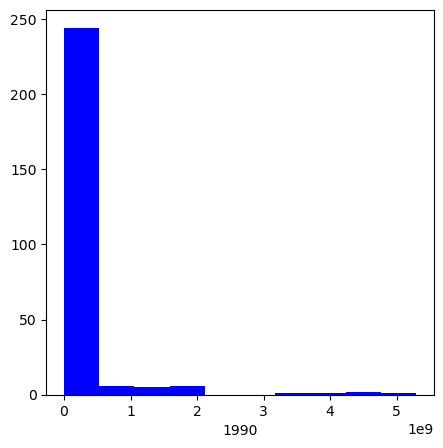

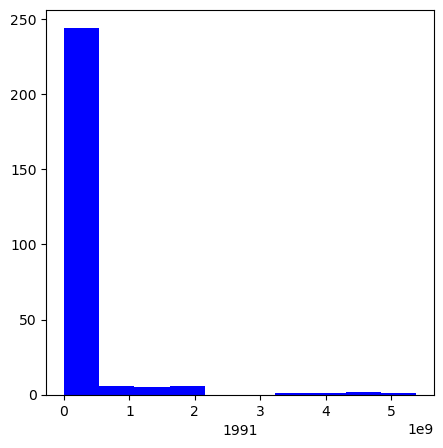

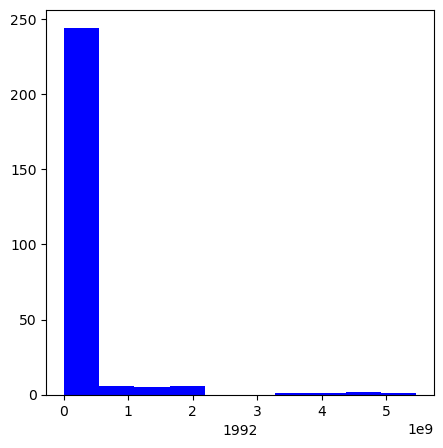

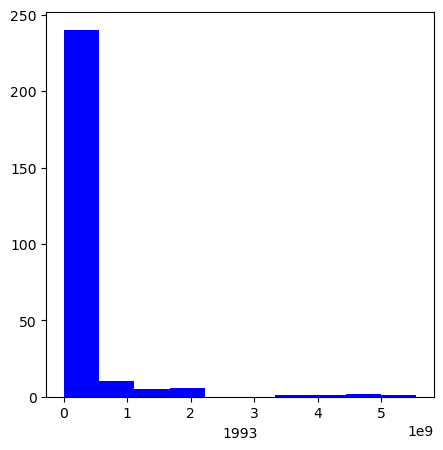

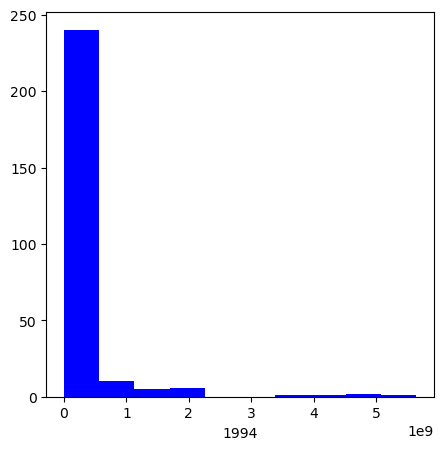

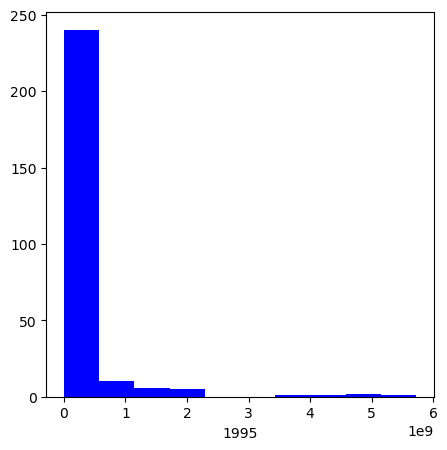

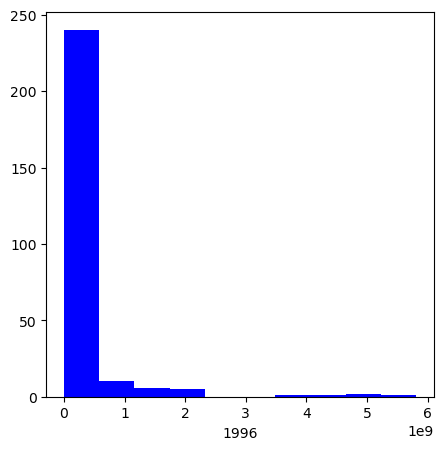

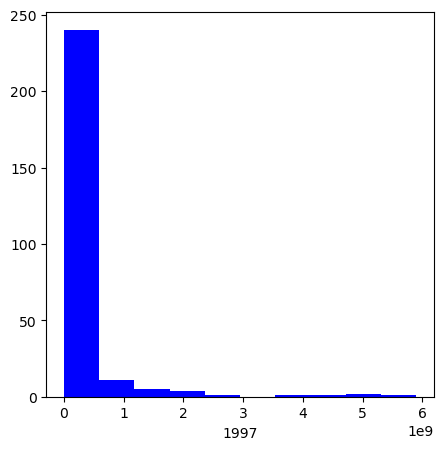

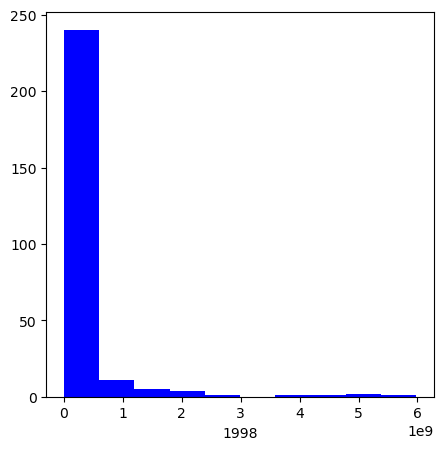

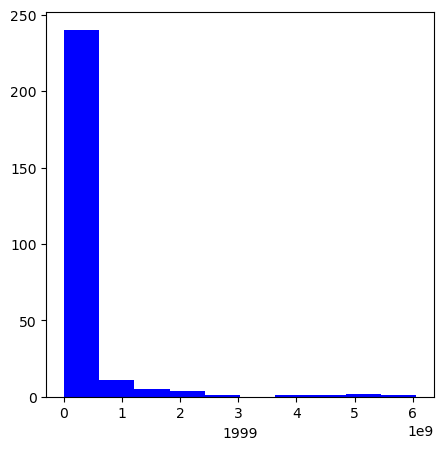

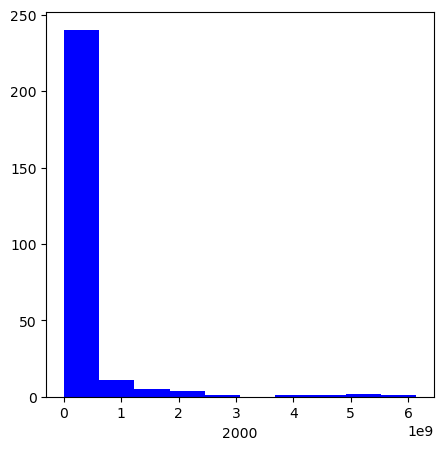

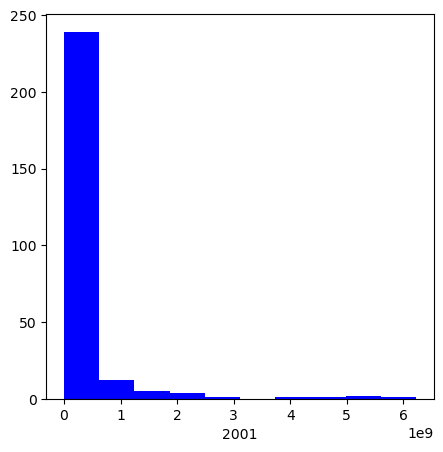

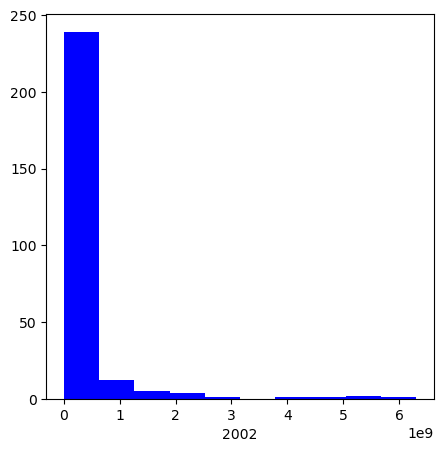

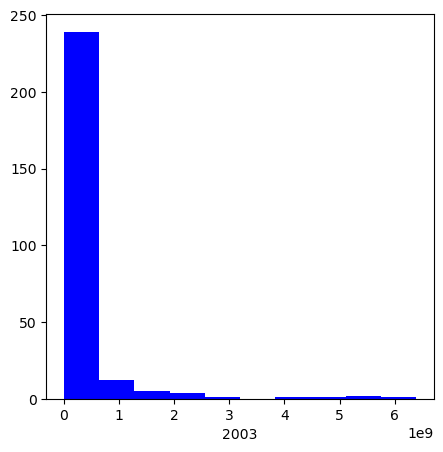

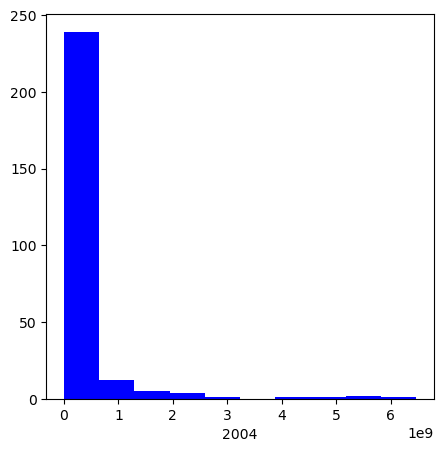

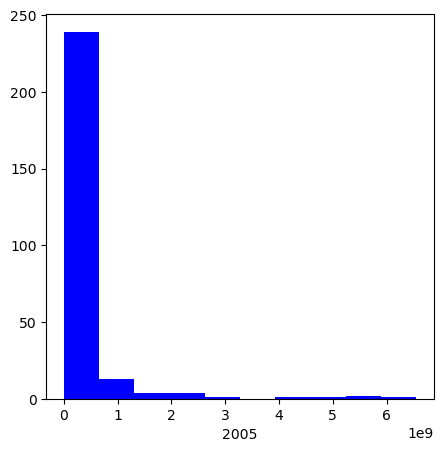

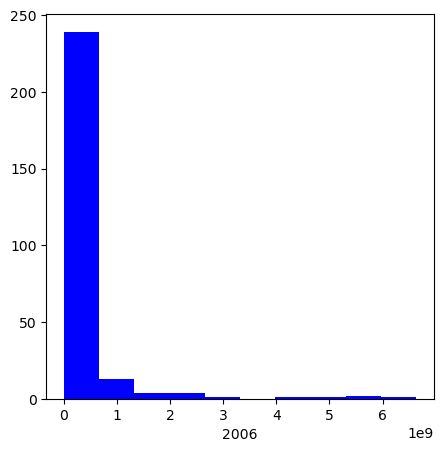

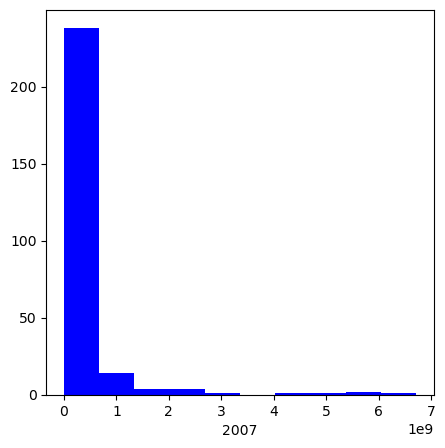

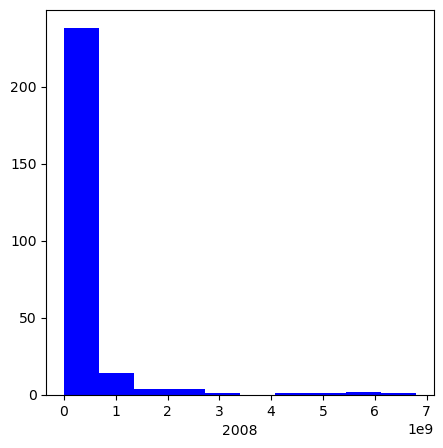

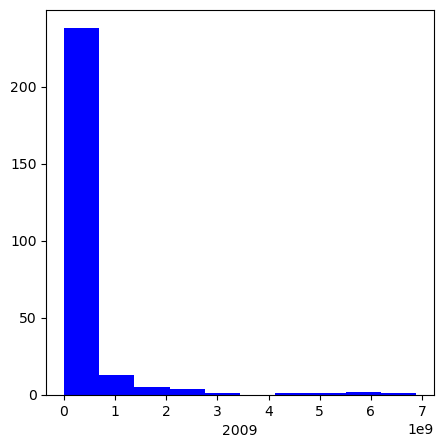

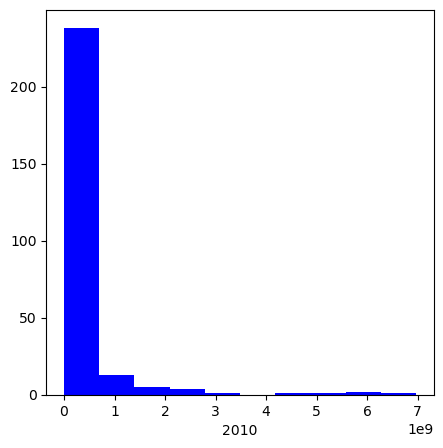

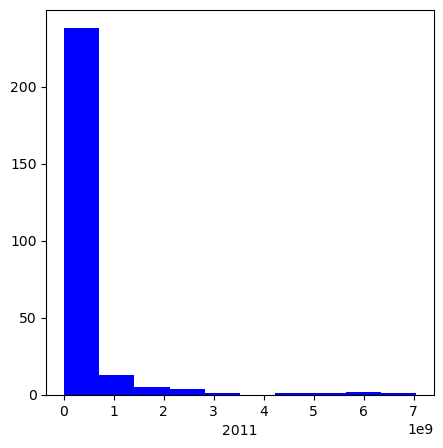

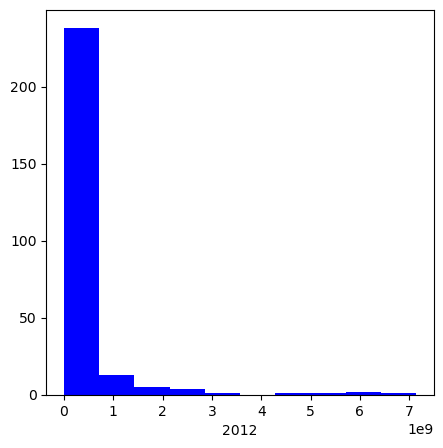

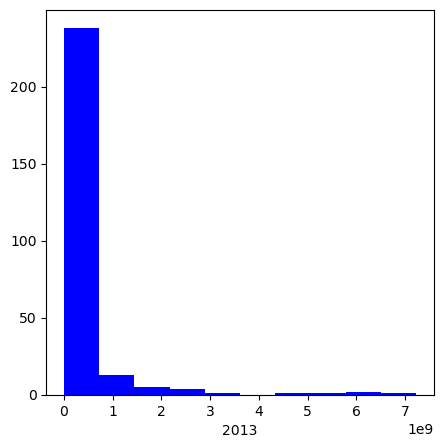

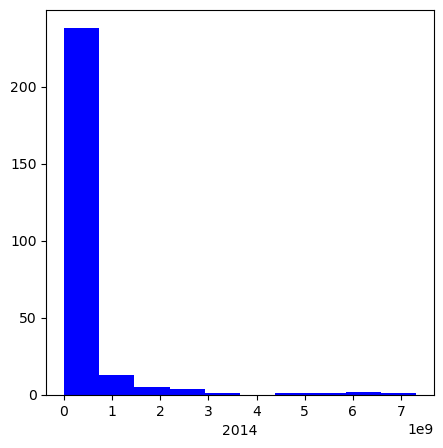

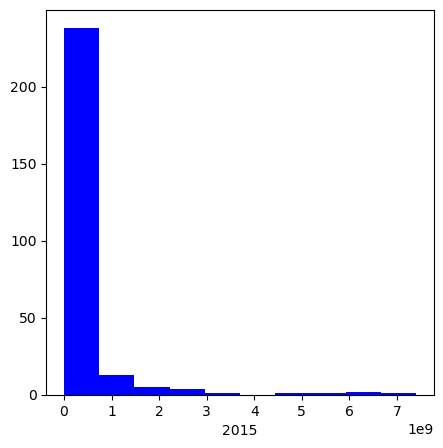

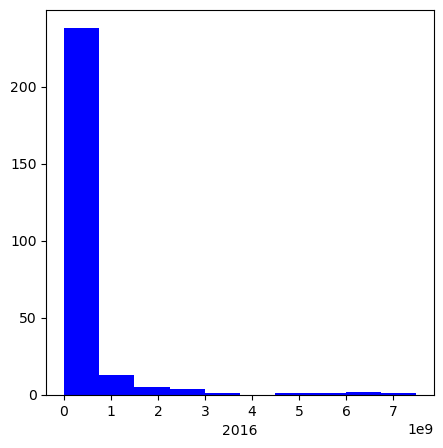

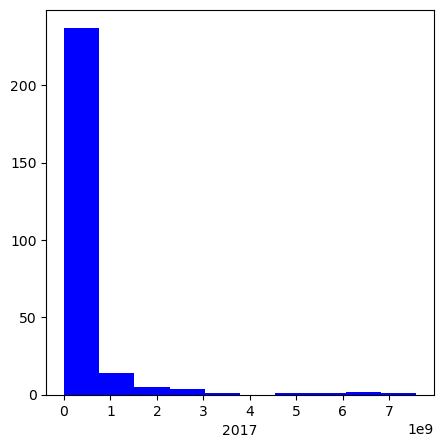

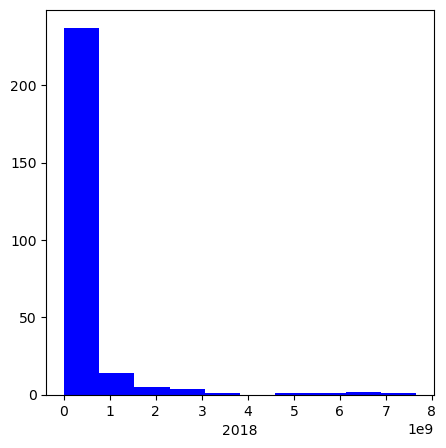

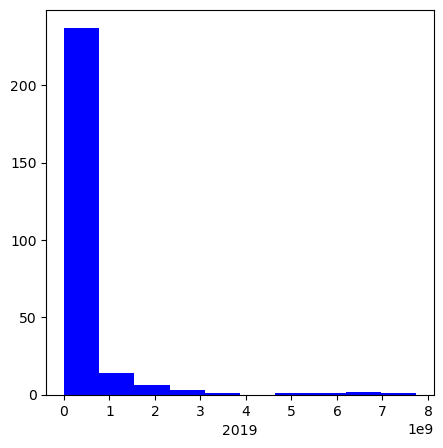

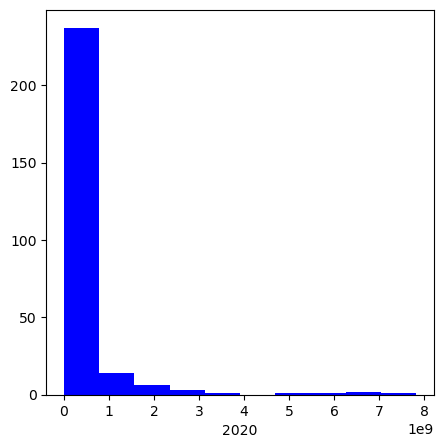

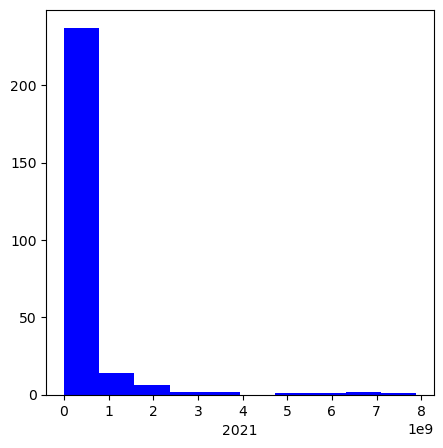

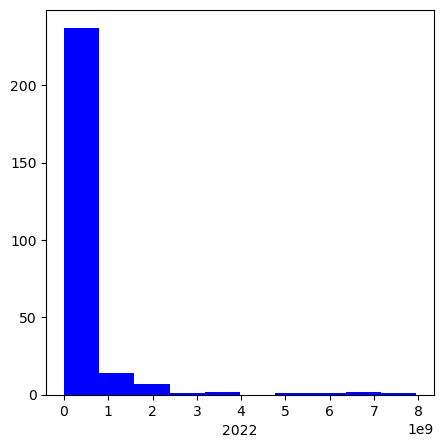

In [68]:
for i in cols:
    fig=plt.figure(figsize=(5,5))
    plt.hist(df2[i],color="blue",bins=10)
    plt.xlabel(i)
    plt.show()

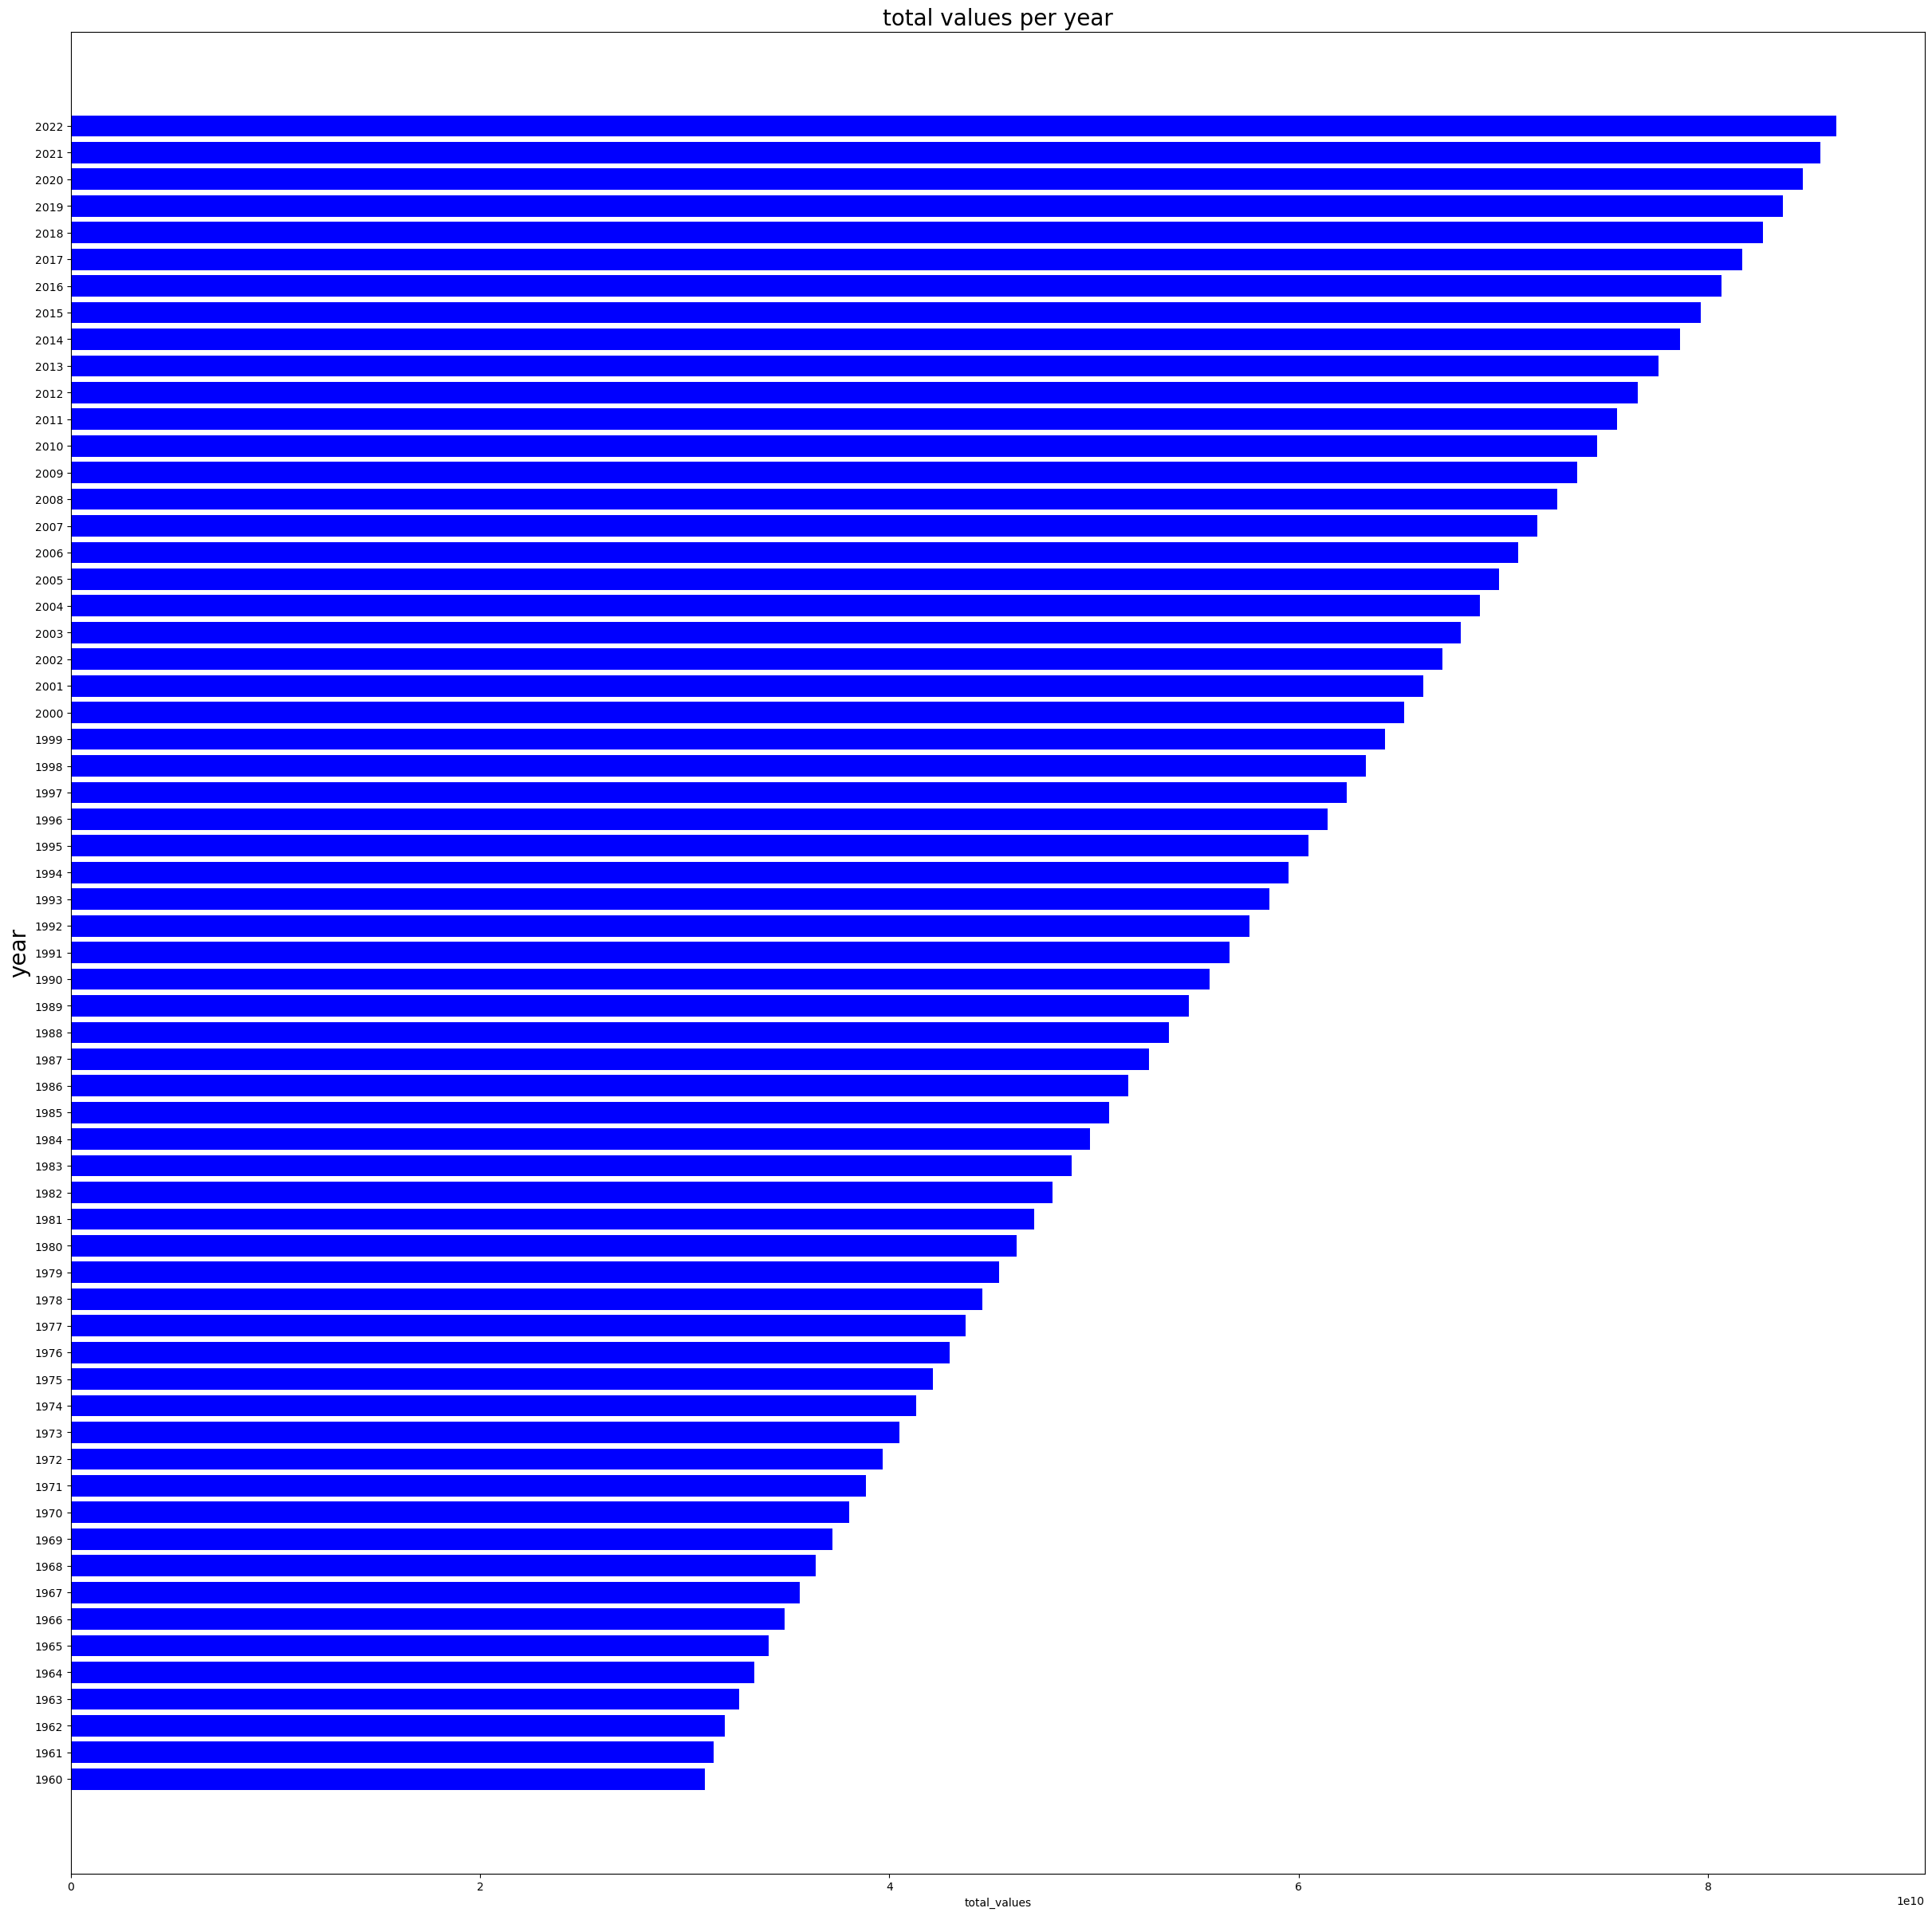

In [76]:
year=df2.columns[1:]
total_values=df2[year].sum()

plt.figure(figsize=(30,30))

plt.barh(year,total_values,color="blue")

plt.xlabel("total_values")
plt.ylabel("year",size=20)
plt.title("total values per year",size=20)
plt.show()

In [78]:
country_by_1960=df2.sort_values(by='1960').head(20)
country_by_1960

Country Name     1960     1961     1962     1963  \
223                          Sweden   2646.0   2888.0   3171.0   3481.0   
146                Macao SAR, China   4135.0   4258.0   4388.0   4524.0   
178                           Nepal   4582.0   4753.0   4950.0   5198.0   
243                         Tunisia   5404.0   5436.0   5471.0   5503.0   
226                      Seychelles   5604.0   5625.0   5633.0   5634.0   
253  St. Vincent and the Grenadines   7850.0   7885.0   7902.0   7919.0   
52                   Cayman Islands   8473.0   8626.0   8799.0   8985.0   
163                        Mongolia   8702.0   8965.0   9252.0   9561.0   
6                           Andorra   9443.0  10216.0  11014.0  11839.0   
187                     Philippines   9446.0   9639.0   9851.0  10076.0   
154                          Mexico  15374.0  15867.0  16387.0  16947.0   
210                    Sierra Leone  15556.0  15895.0  16242.0  16583.0   
136                      Low income  16472.0  16834.0  17221.0  17625.0   
11                   American Samoa  20085.0  20626.0  21272.0  21949.0   
148                         Morocco  21797.0  21907.0  22106.0  22442.0   
84                        Gibraltar  21822.0  21907.0  22249.0  22796.0   
254                   Venezuela, RB  32500.0  34300.0  35000.0  39800.0   
91                        Greenland  32500.0  33700.0  35000.0  36400.0   
78                    Faroe Islands  34154.0  34572.0  34963.0  35385.0   
198       Post-demographic dividend  36385.0  40111.0  45123.0  50950.0   

        1964     1965     1966     1967     1968  ...        2013        2014  \
223   3811.0   4161.0   4531.0   4930.0   5354.0  ...   1118319.0   1125865.0   
146   4666.0   4832.0   5044.0   5294.0   5497.0  ...     35639.0     35261.0   
178   5484.0   5804.0   6021.0   6114.0   6288.0  ...     10694.0     10940.0   
243   5525.0   5548.0   5591.0   5657.0   5729.0  ...  76147624.0  77181884.0   
226   5642.0   5650.0   5652.0   5662.0   5668.0  ...  21495821.0  20072232.0   
253   7949.0   8018.0   8139.0   8337.0   8649.0  ...  29838021.0  30193258.0   
52    9172.0   9366.0   9566.0   9771.0   9981.0  ...     58212.0     59559.0   
163   9890.0  10229.0  10577.0  10720.0  10440.0  ...     52141.0     51856.0   
6    12690.0  13563.0  14546.0  15745.0  17079.0  ...     71367.0     71621.0   
187  10318.0  10563.0  10813.0  10992.0  11079.0  ...     17805.0     17796.0   
154  17537.0  18154.0  18794.0  19665.0  21001.0  ...     51352.0     50419.0   
210  16926.0  17273.0  17588.0  17907.0  18291.0  ...   6185642.0   6209526.0   
136  18058.0  18500.0  18957.0  19467.0  20011.0  ...     36806.0     37096.0   
11   22656.0  23391.0  24122.0  24848.0  25608.0  ...     52995.0     52217.0   
148  22766.0  23022.0  23198.0  23281.0  23481.0  ...     35425.0     36110.0   
84   23347.0  23910.0  24477.0  25047.0  25610.0  ...     32411.0     32452.0   
254  40800.0  43500.0  46200.0  49100.0  55700.0  ...     28657.0     28971.0   
91   37600.0  39200.0  40500.0  41900.0  43400.0  ...     56483.0     56295.0   
78   35841.0  36346.0  36825.0  37234.0  37630.0  ...     48418.0     48465.0   
198  57531.0  64843.0  73102.0  82517.0  93022.0  ...    288032.0    289873.0   

           2015        2016        2017        2018        2019        2020  \
223   1133936.0   1142524.0   1151390.0   1160428.0   1169613.0   1180655.0   
146     35020.0     34811.0     34496.0     33852.0     33121.0     32553.0   
178     11185.0     11437.0     11682.0     11924.0     12132.0     12315.0   
243  78218479.0  79277962.0  80312698.0  81407204.0  82579440.0  83384680.0   
226  19205178.0  18964252.0  18983373.0  19333463.0  20098251.0  20772595.0   
253  30529716.0  30741464.0  30563433.0  29825653.0  28971683.0  28490453.0   
52      60911.0     62255.0     63581.0     64884.0     66134.0     67311.0   
163     51514.0     51133.0     50729.0     50304.0     49858.0     49587.0   
6       71746.0     72540.0     73

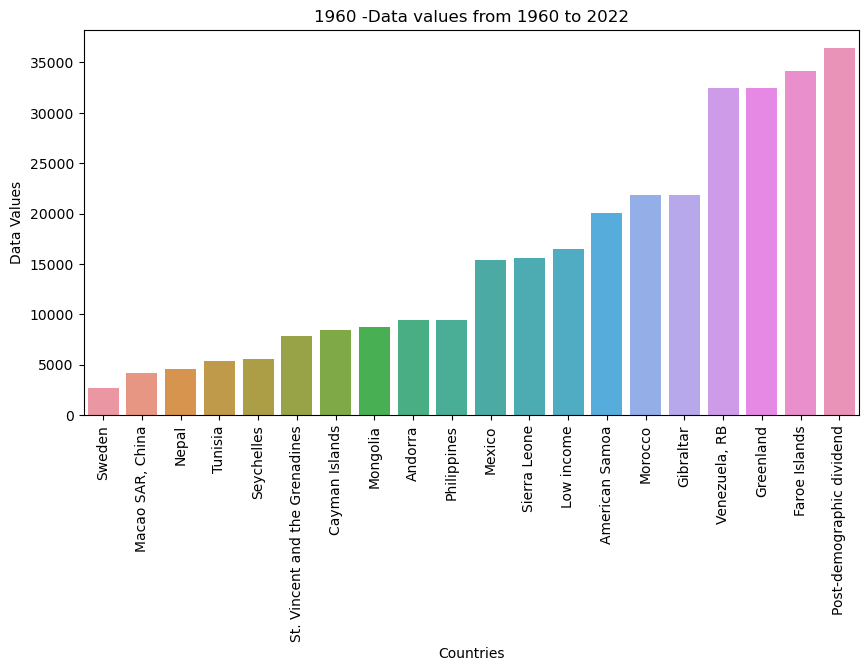

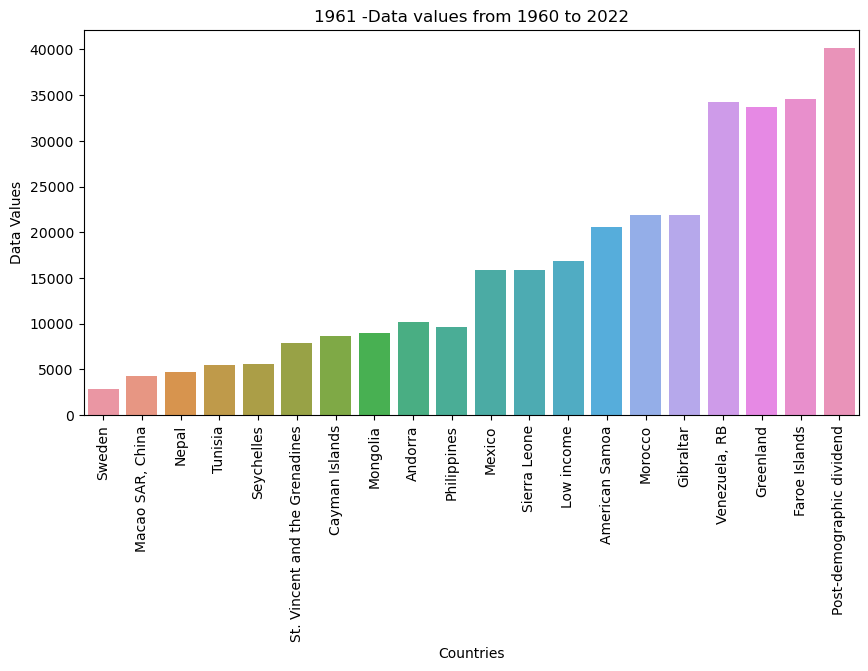

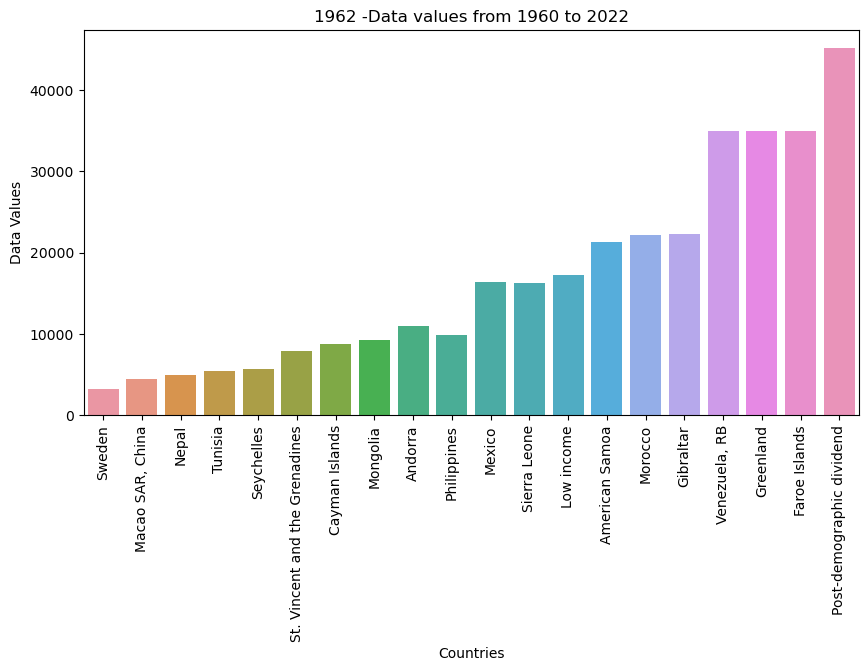

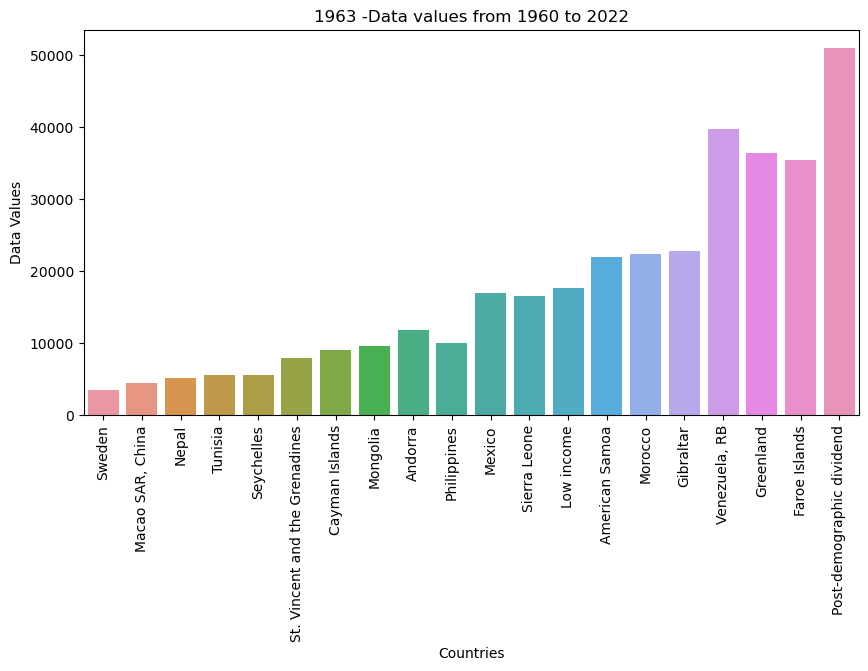

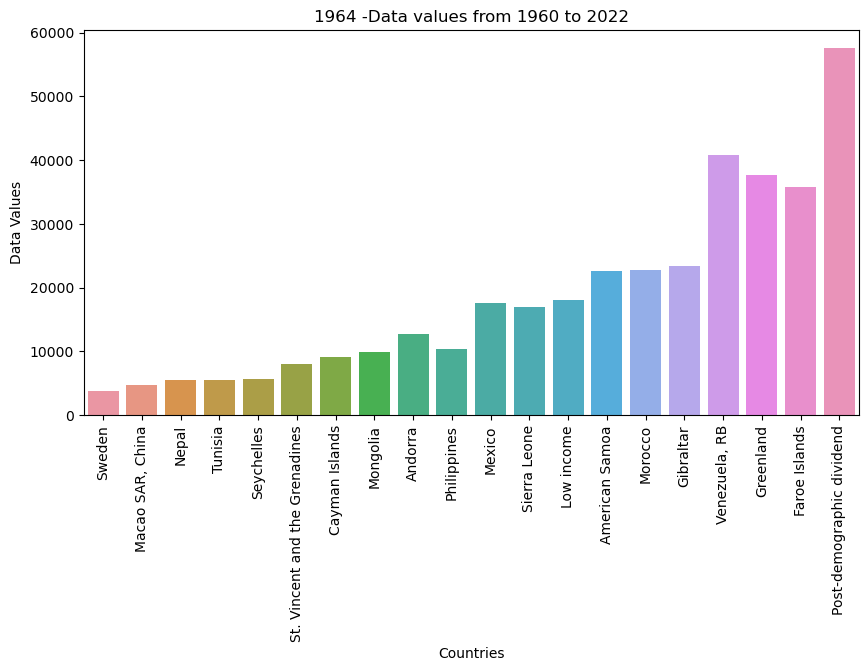

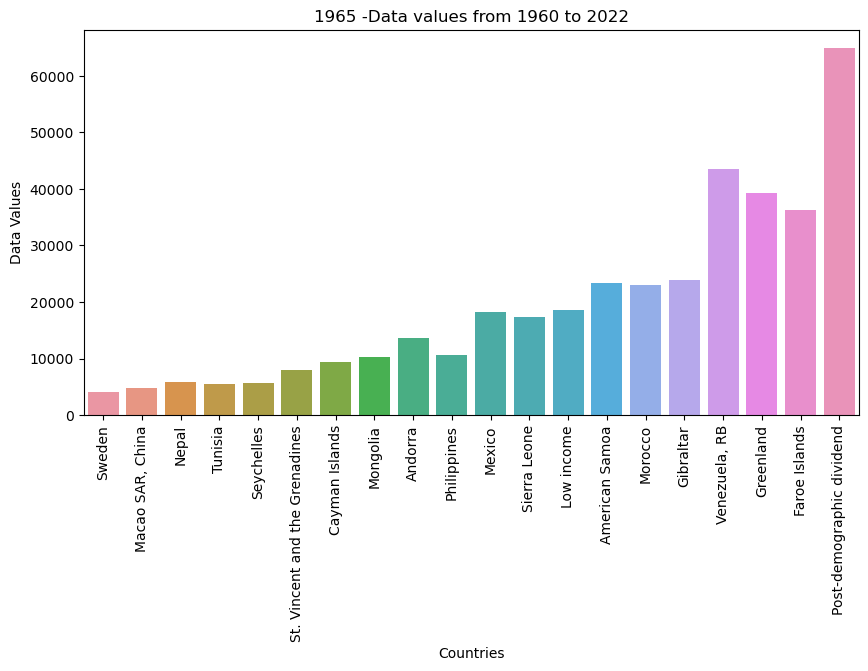

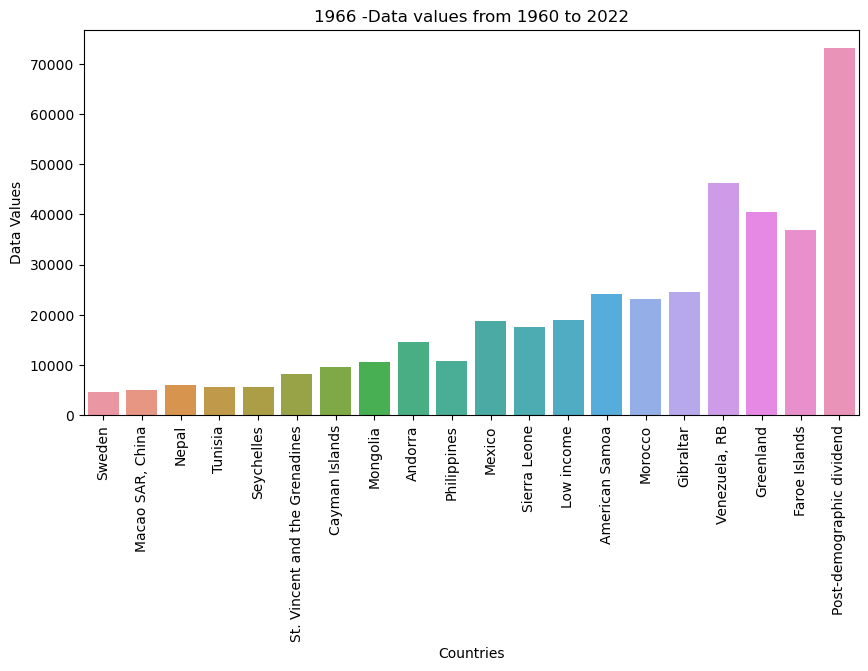

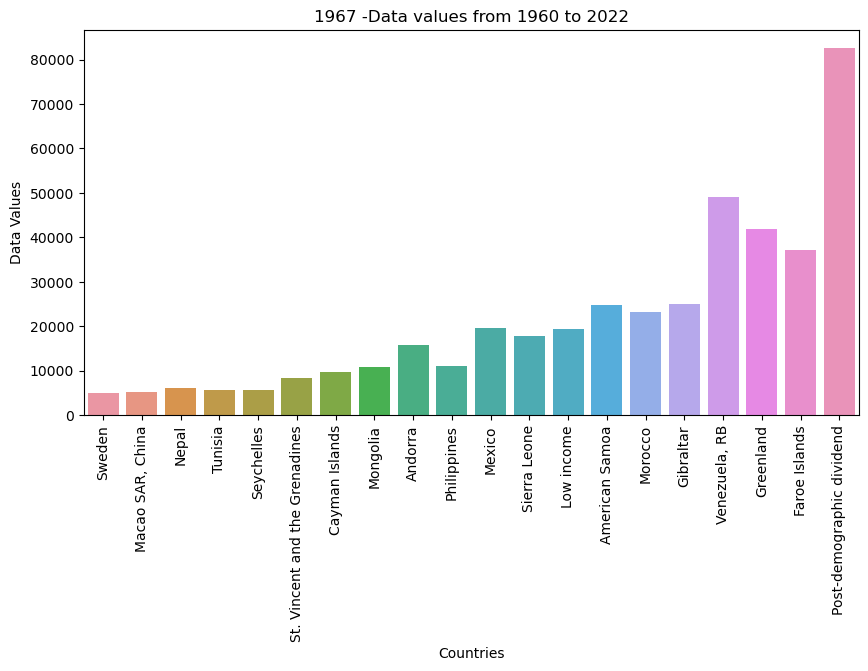

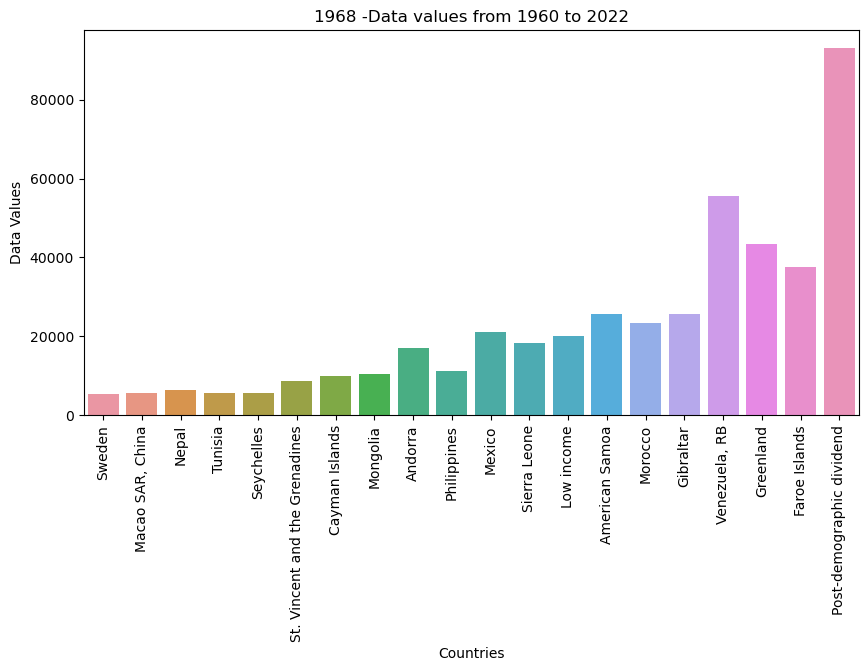

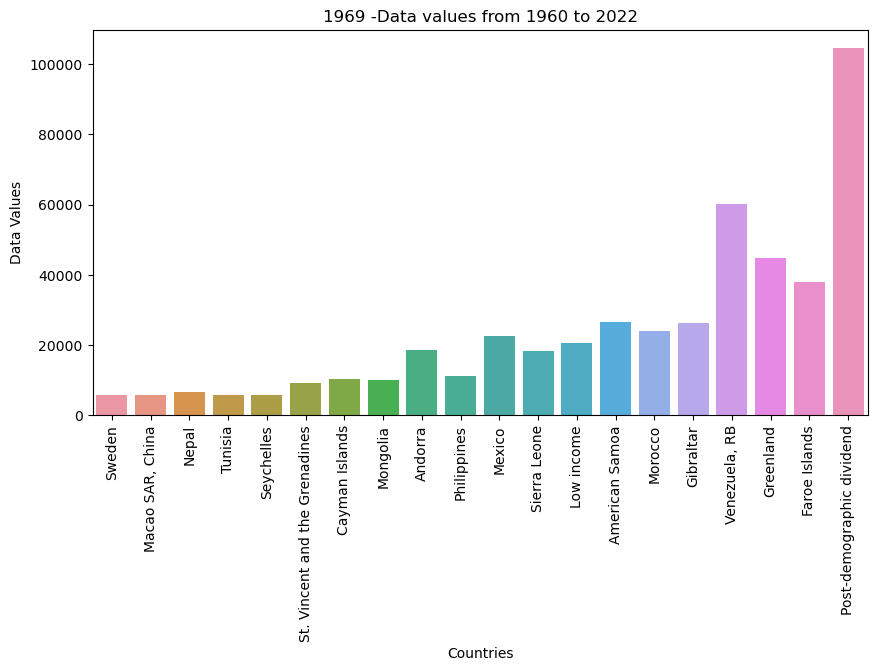

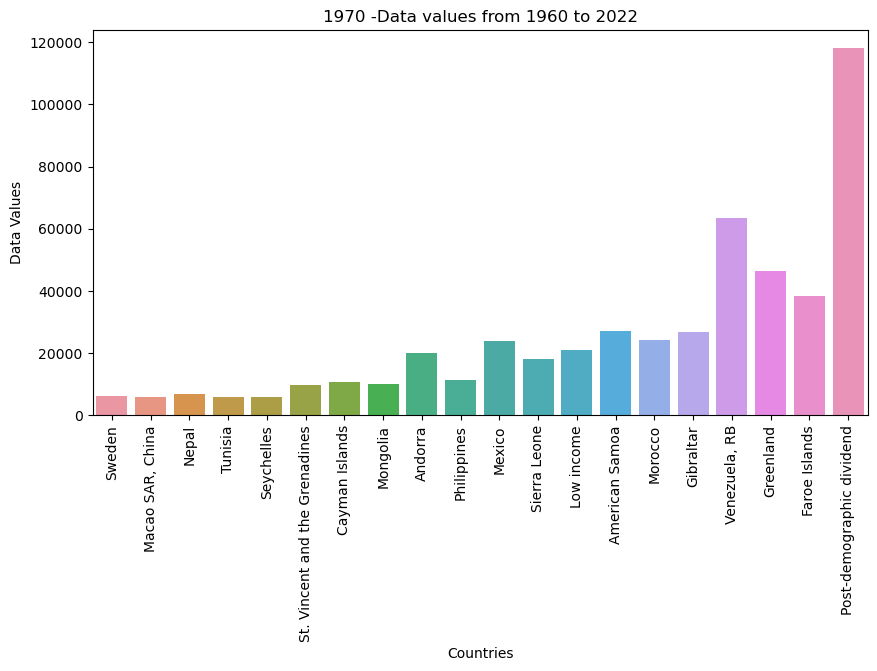

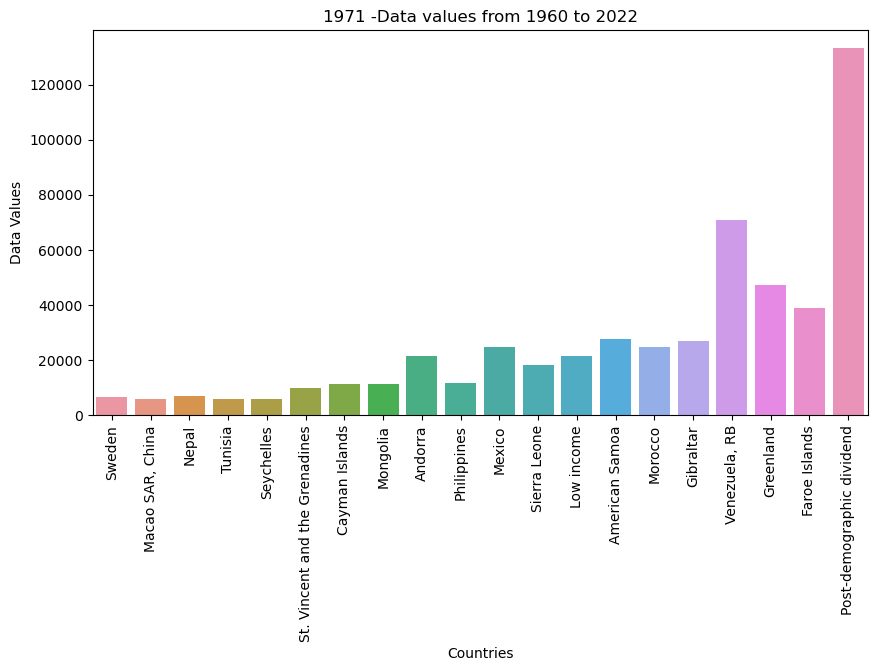

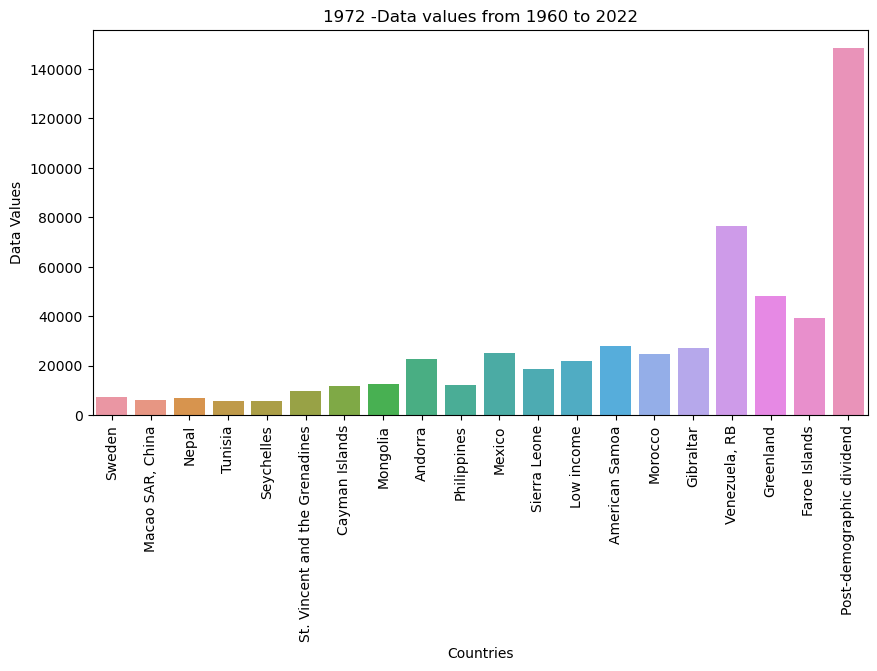

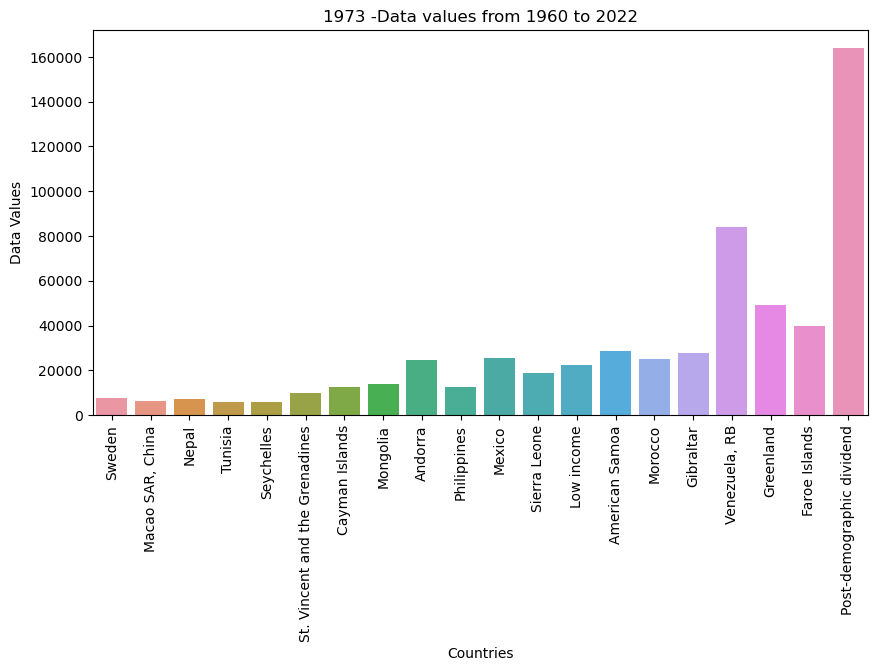

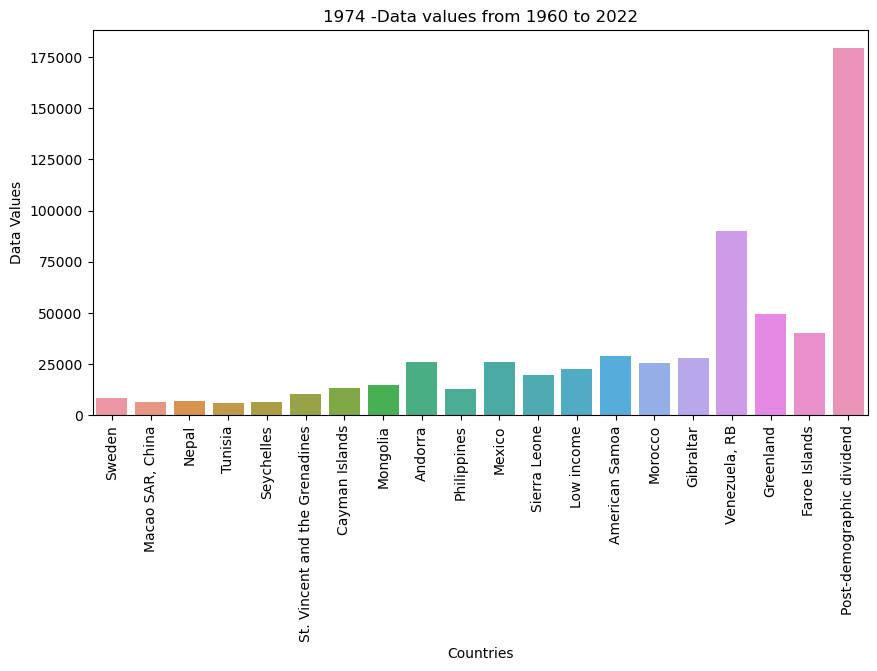

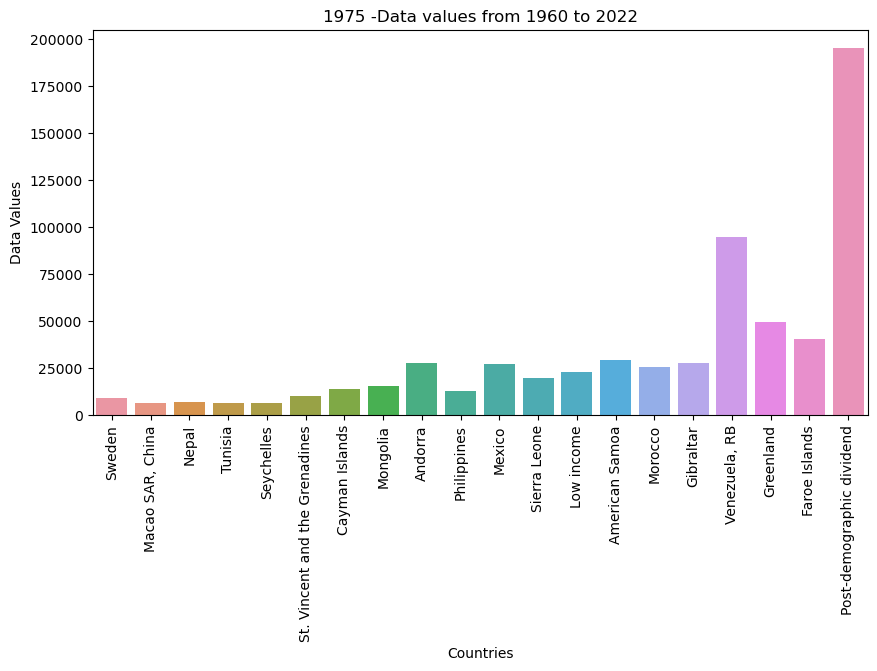

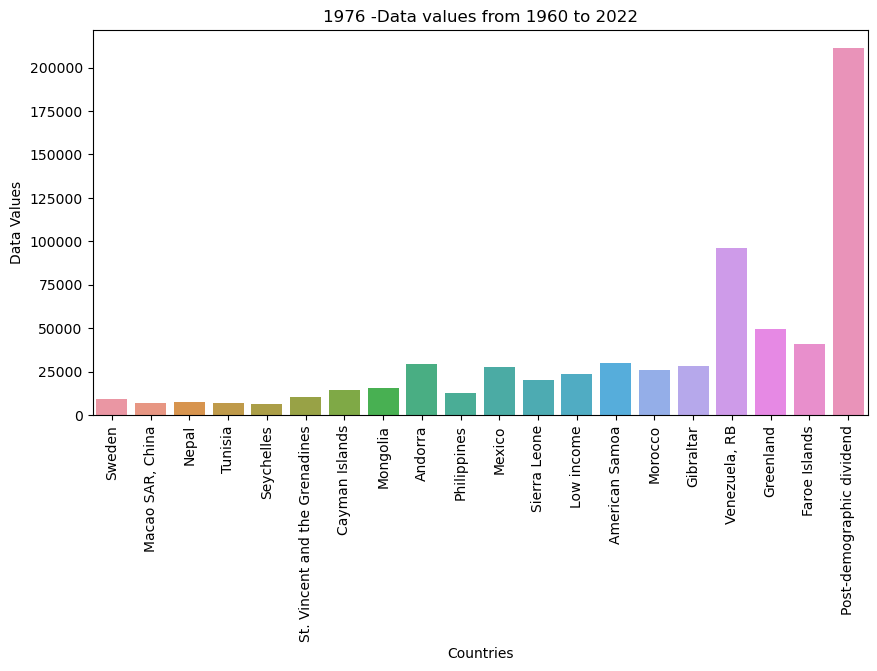

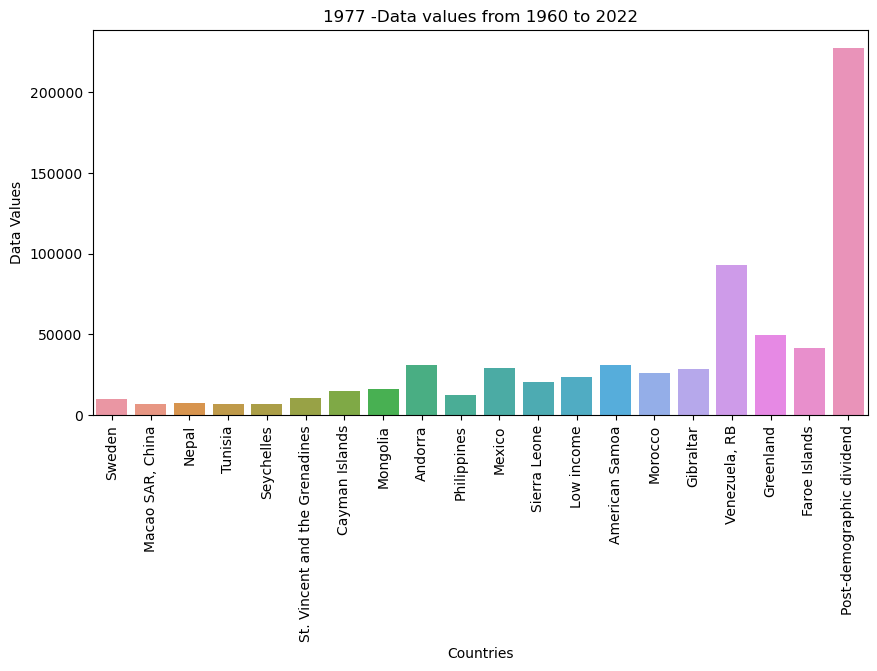

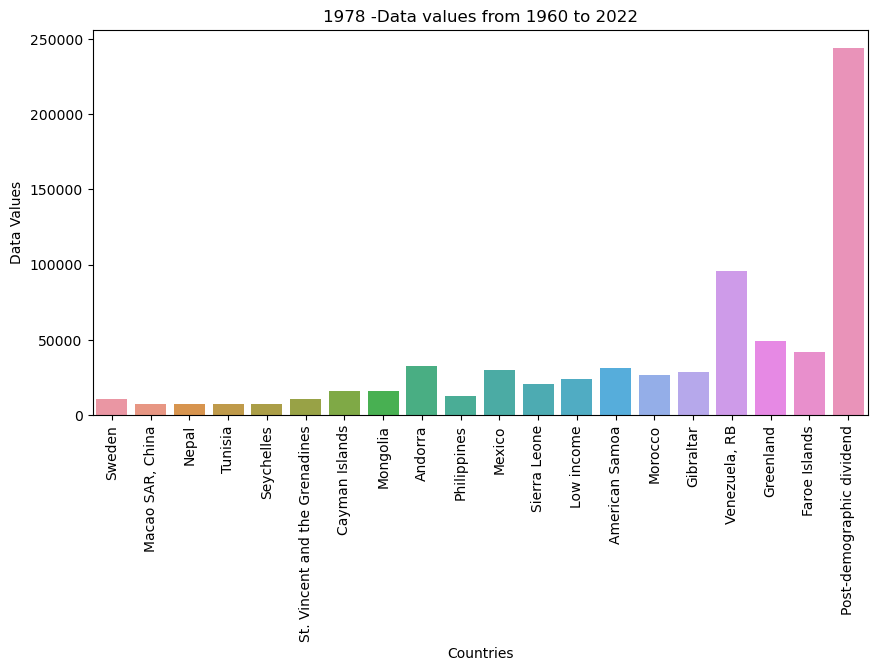

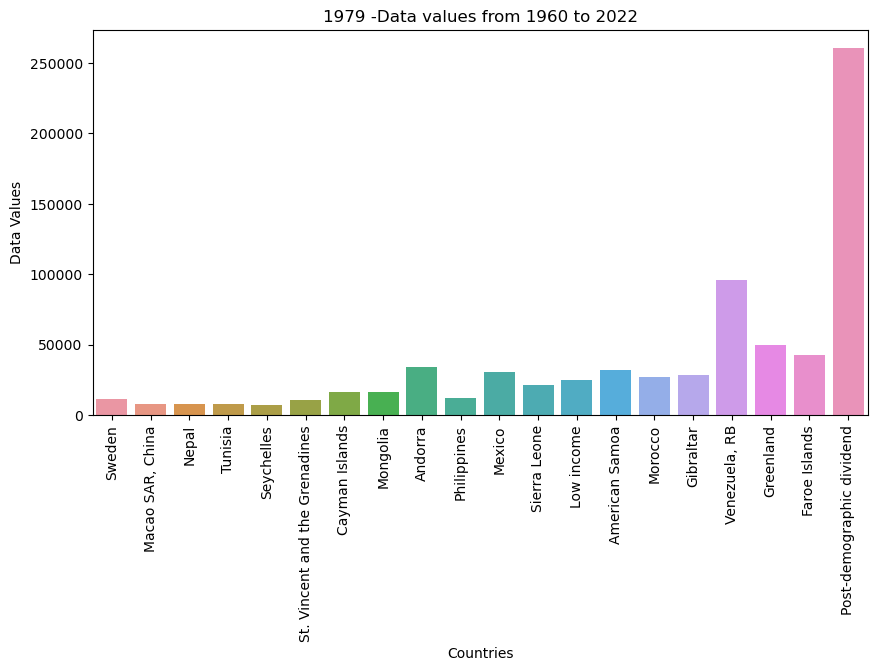

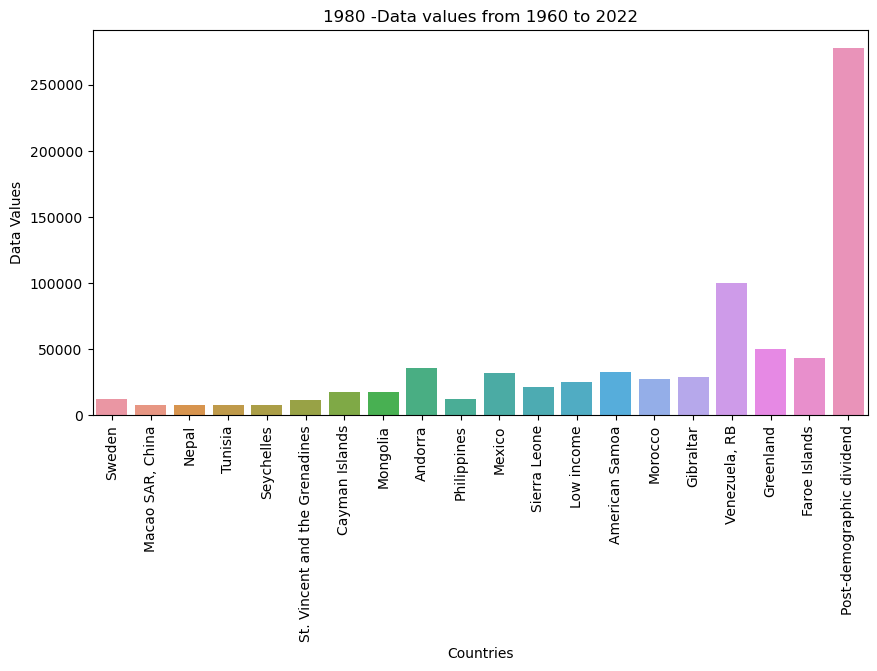

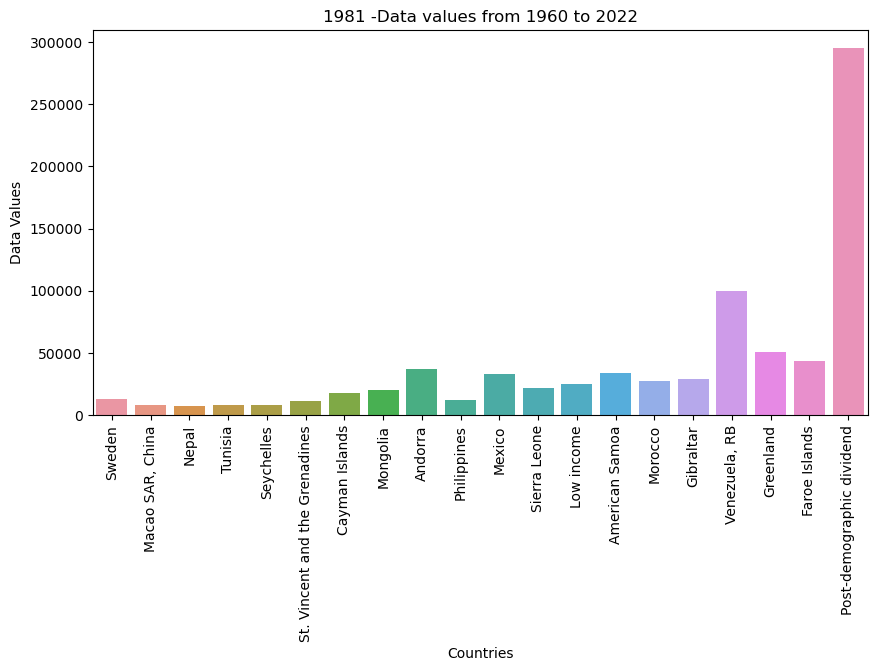

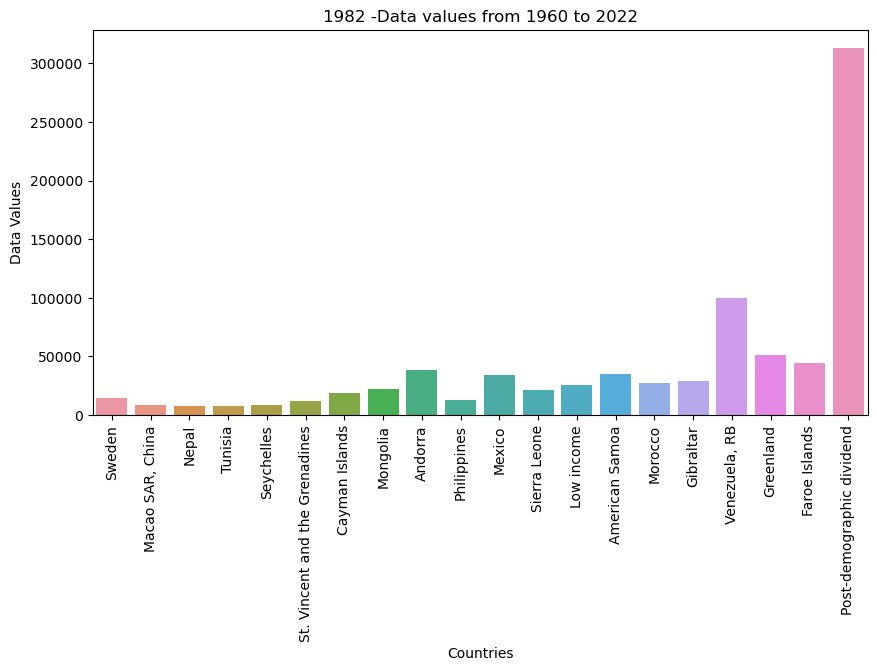

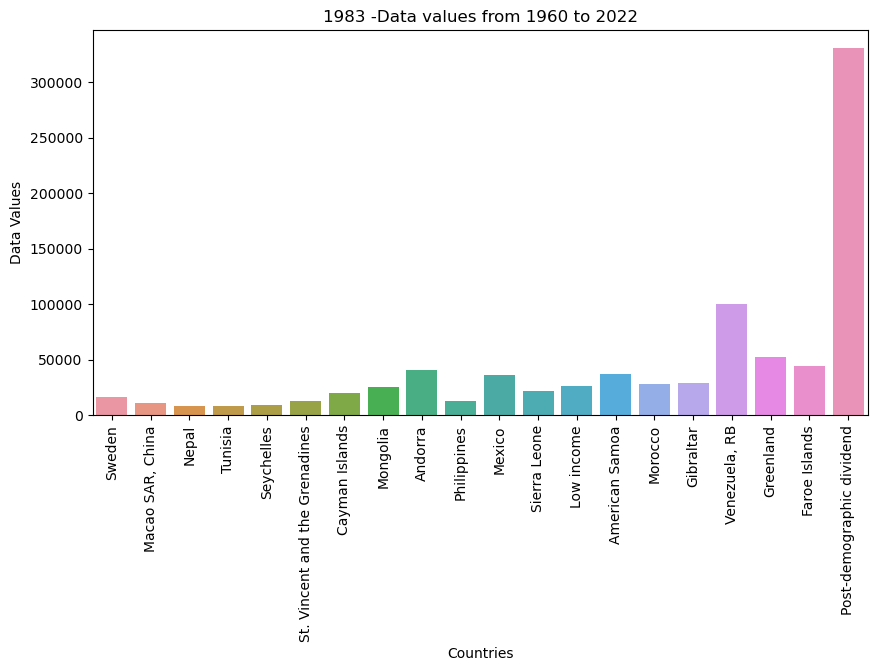

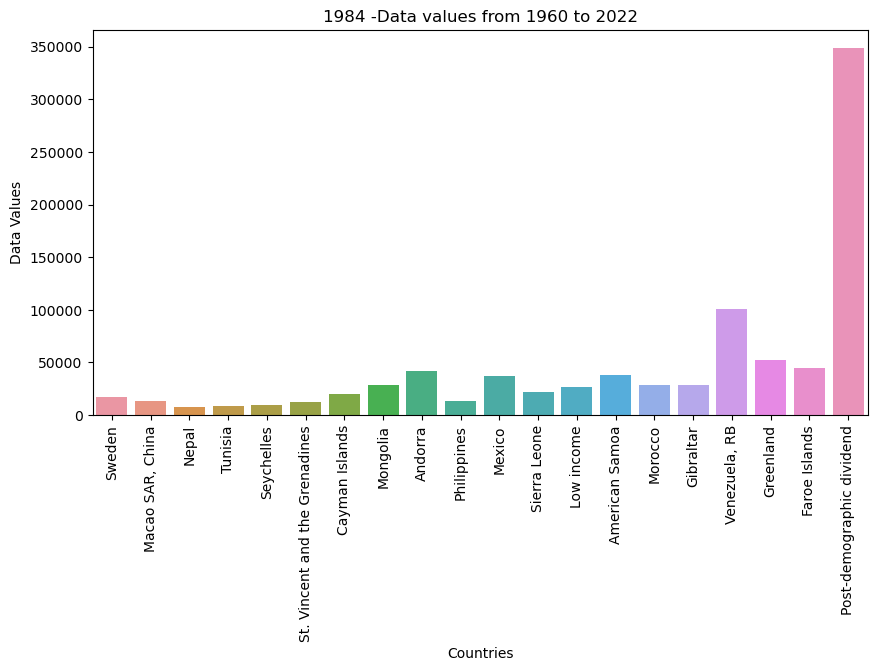

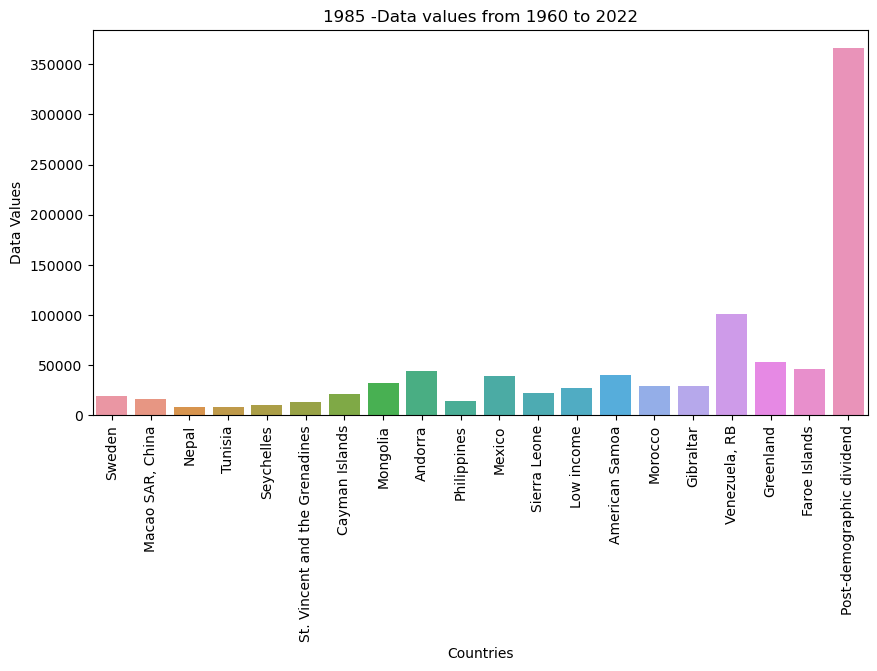

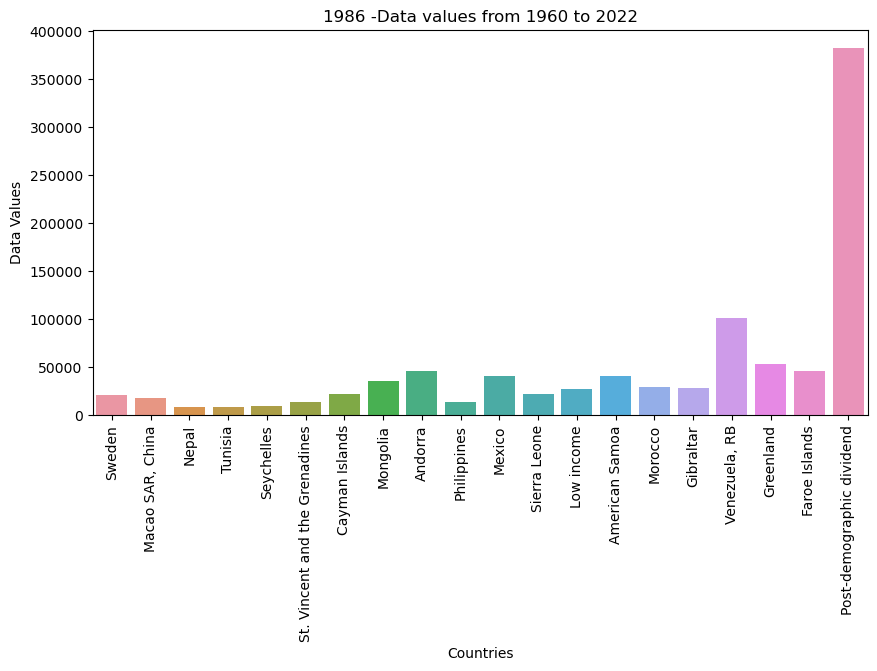

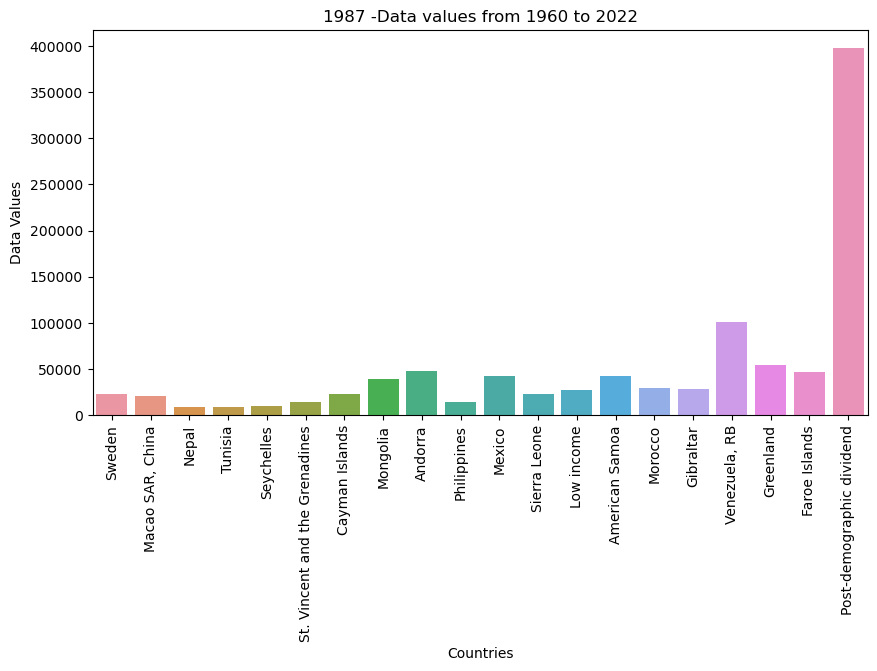

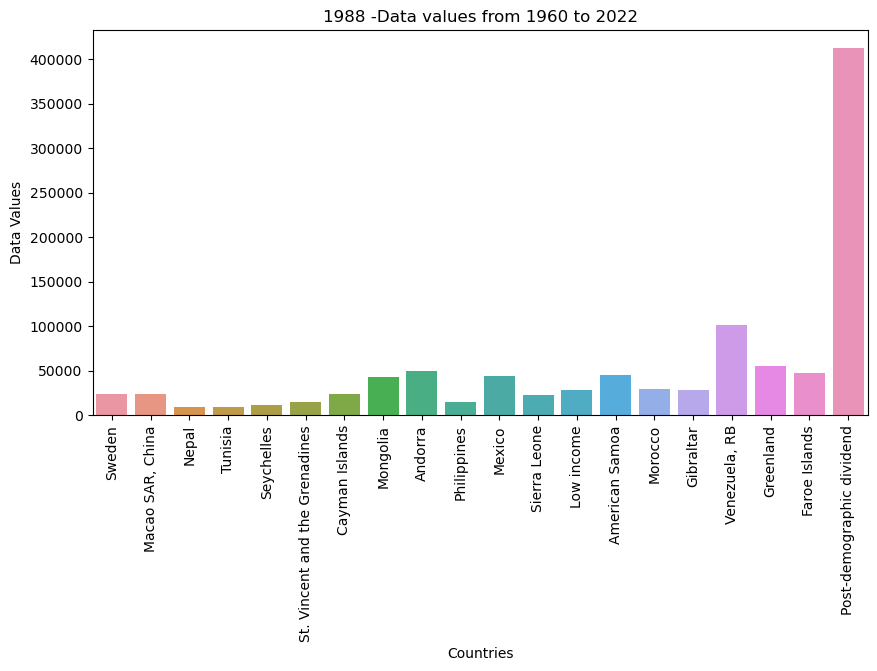

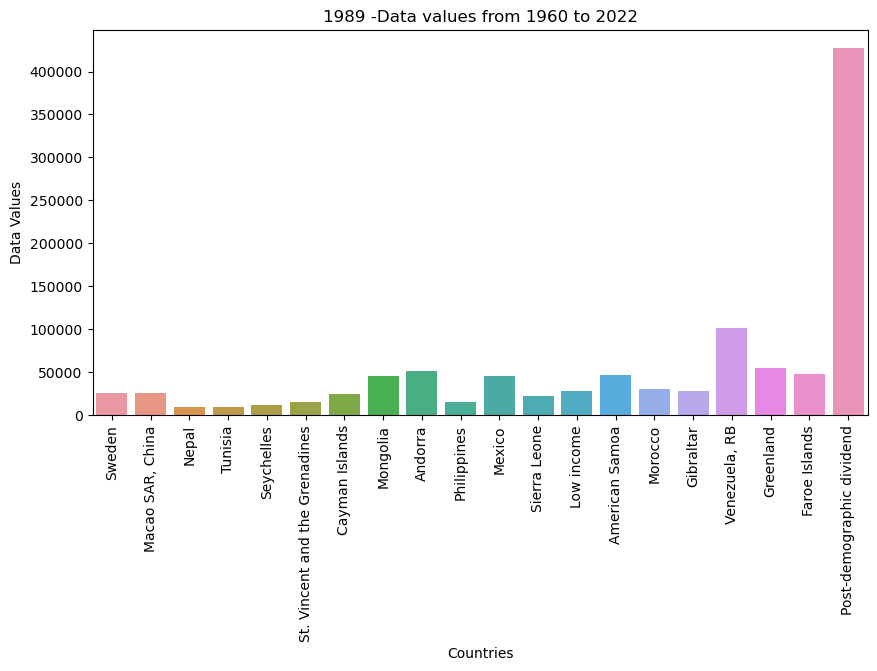

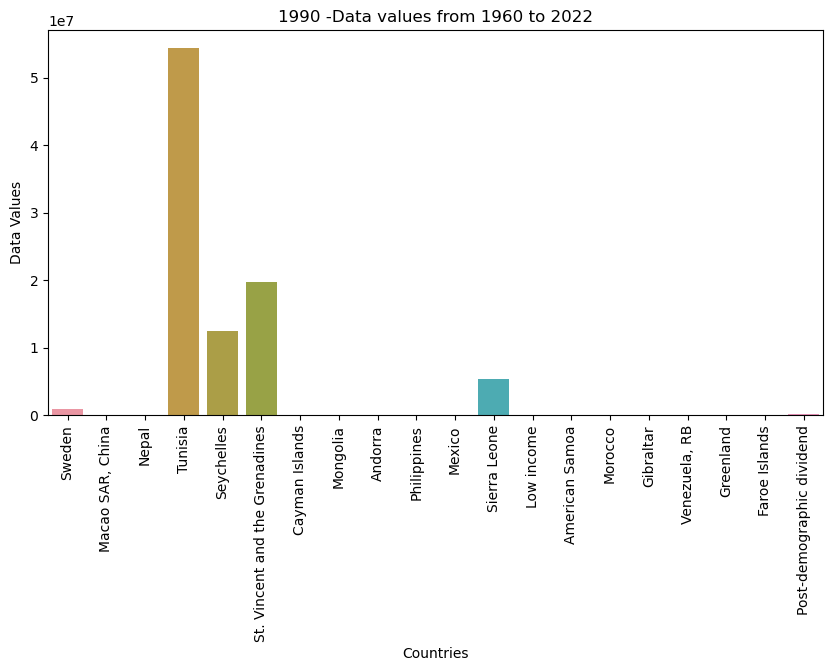

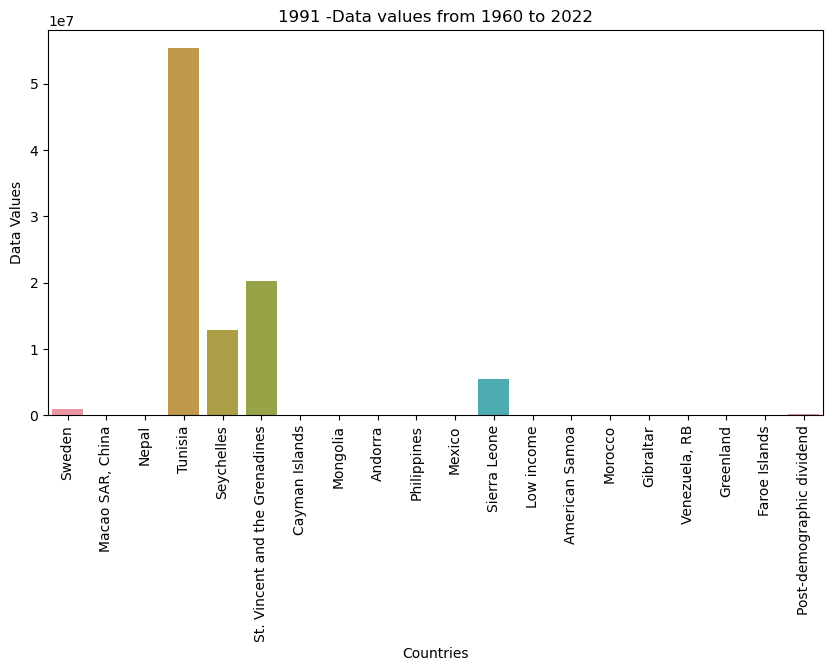

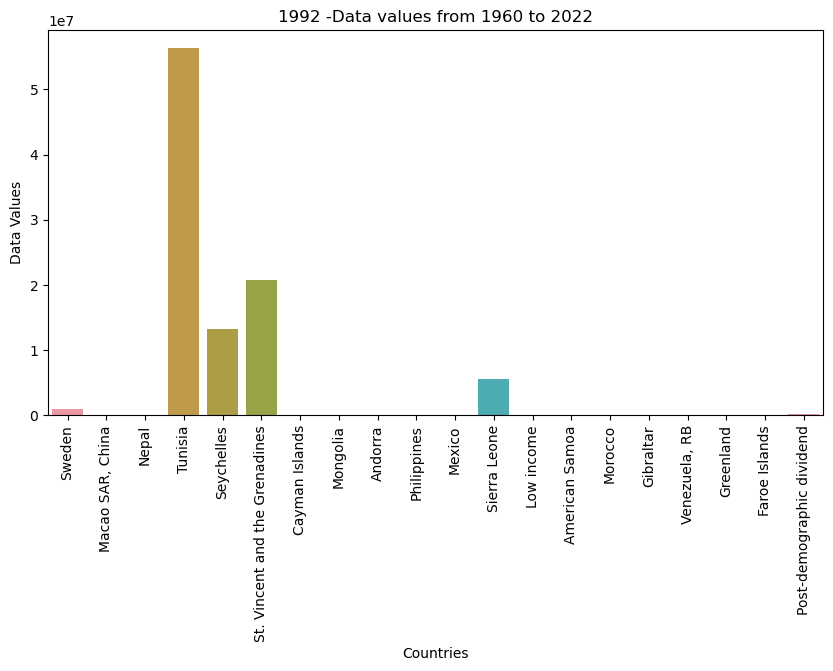

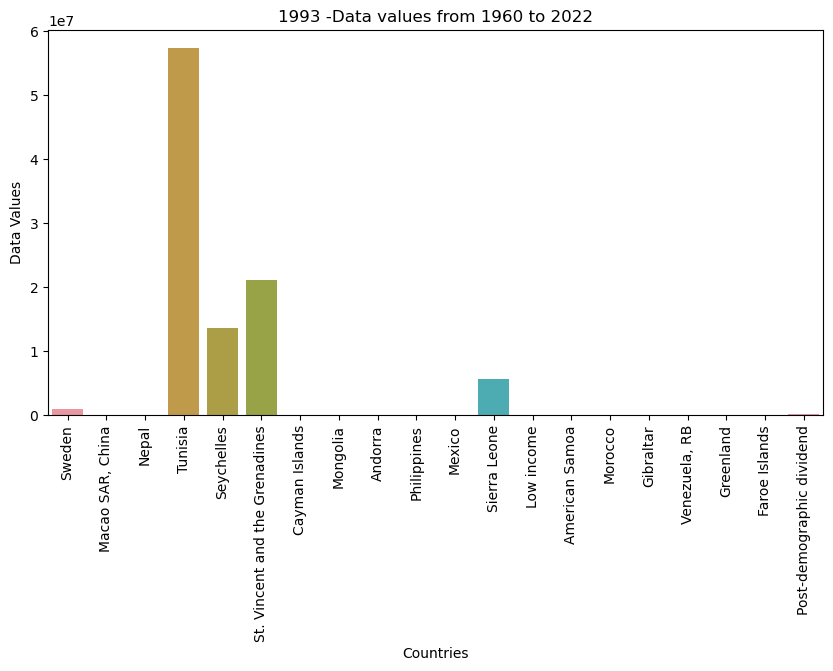

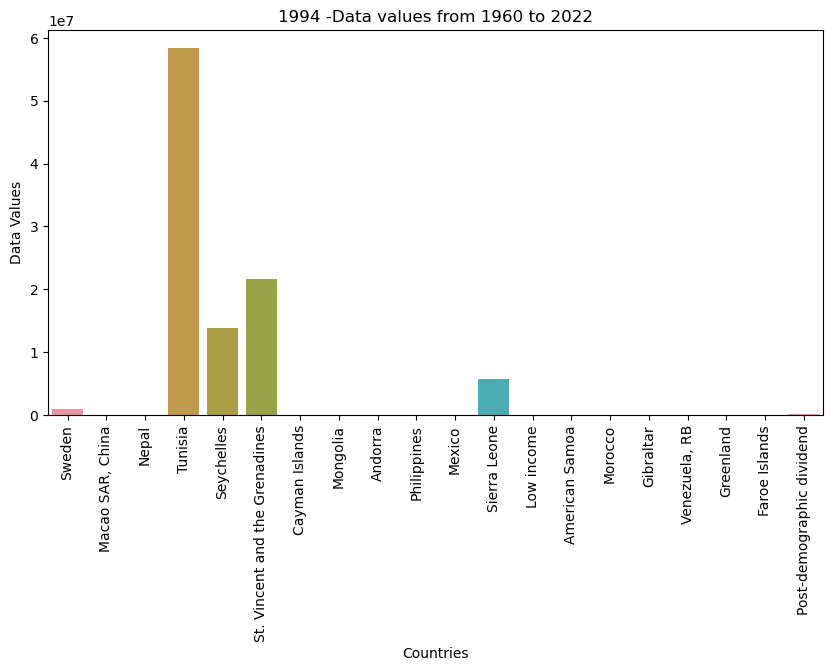

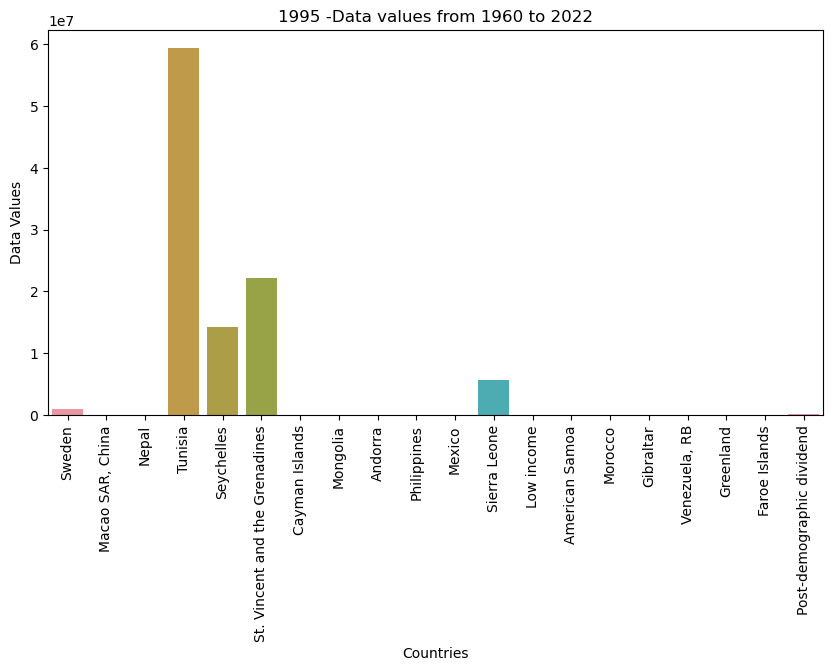

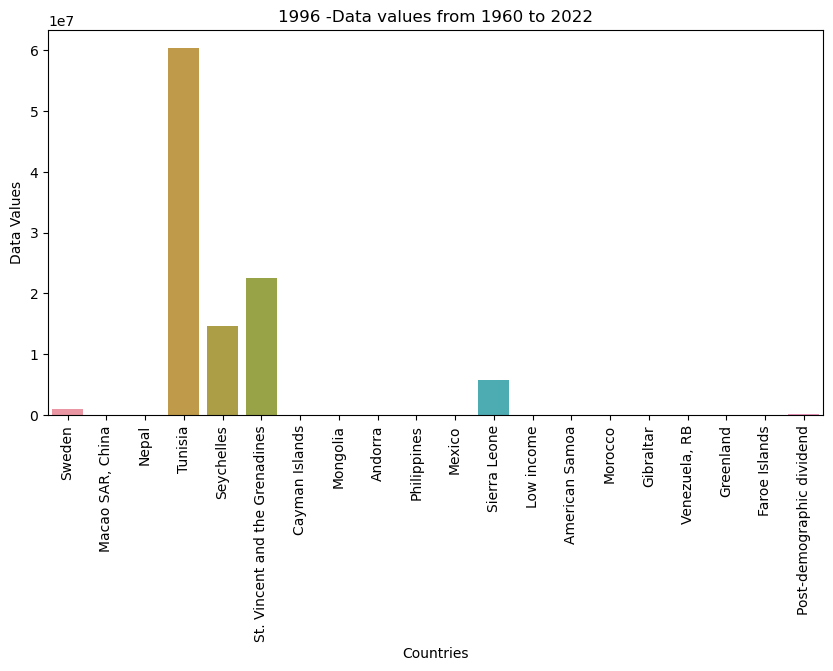

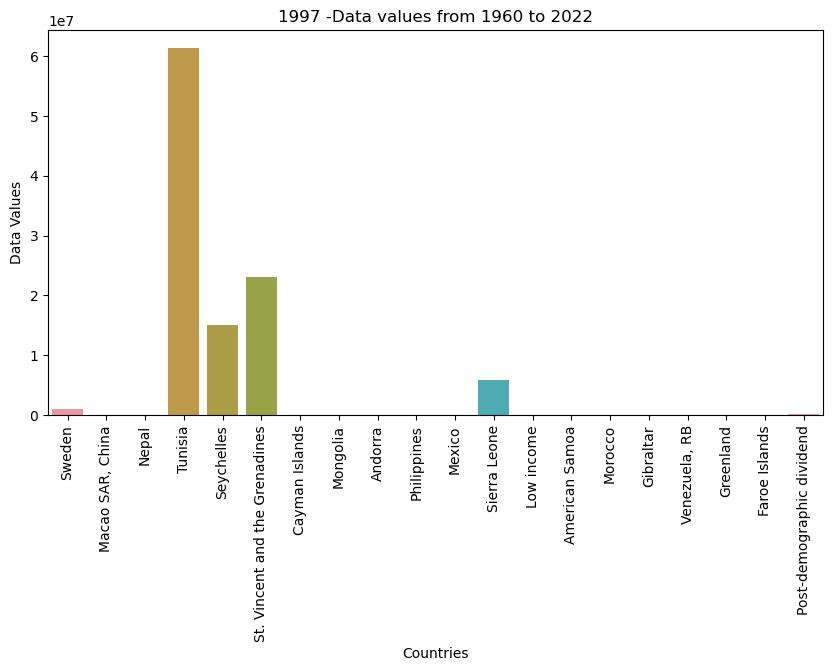

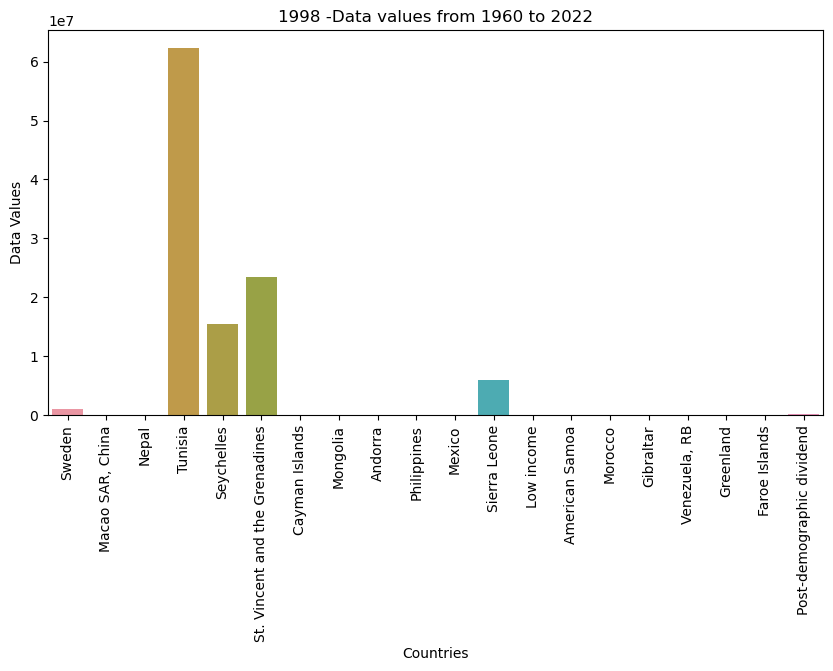

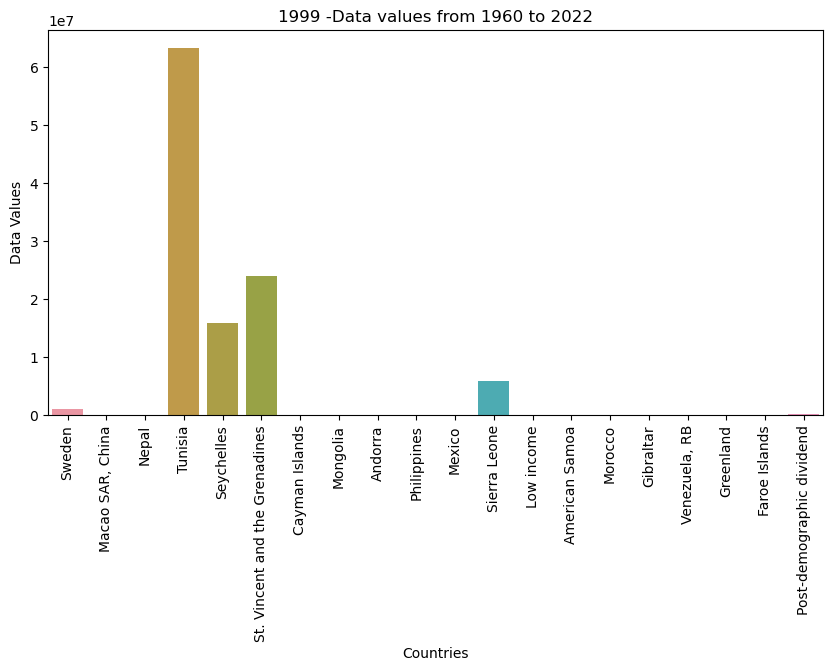

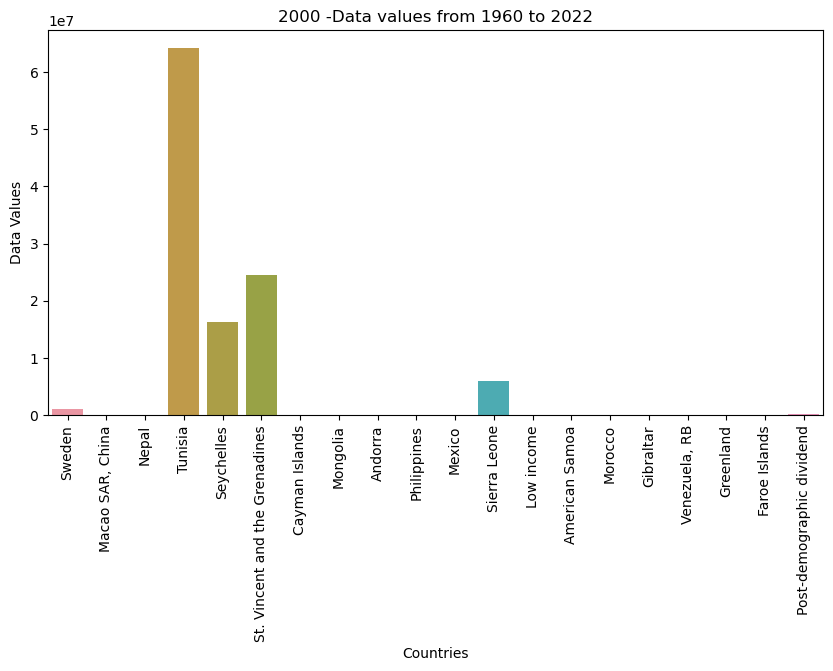

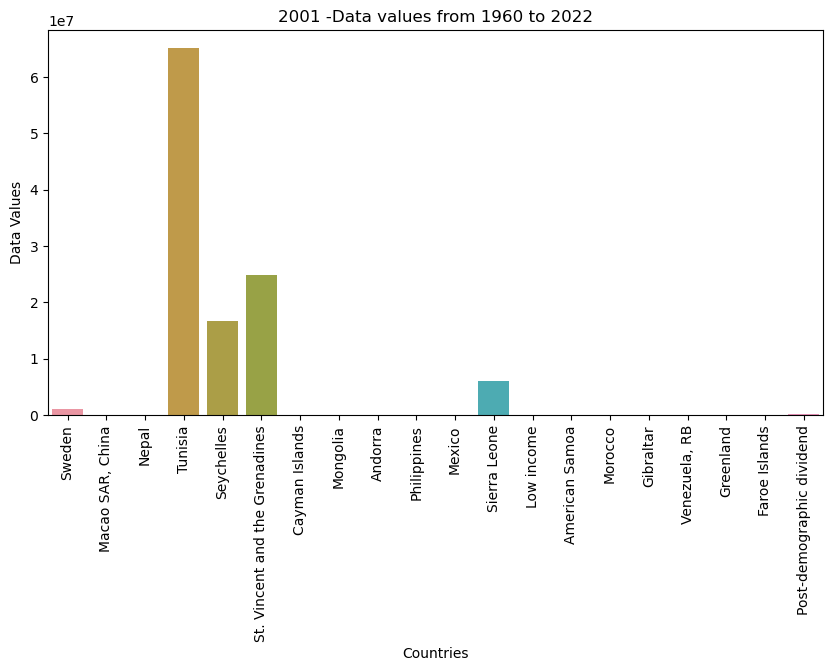

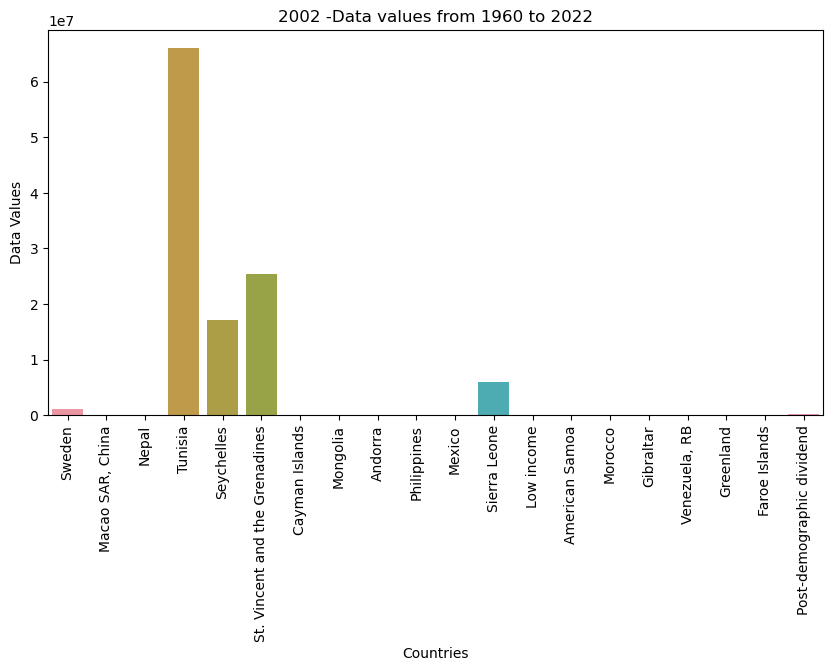

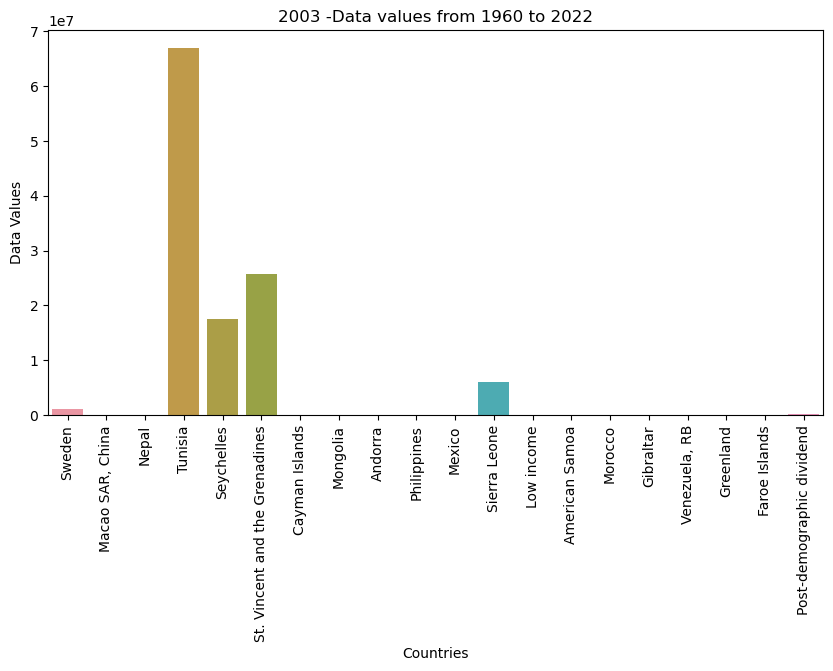

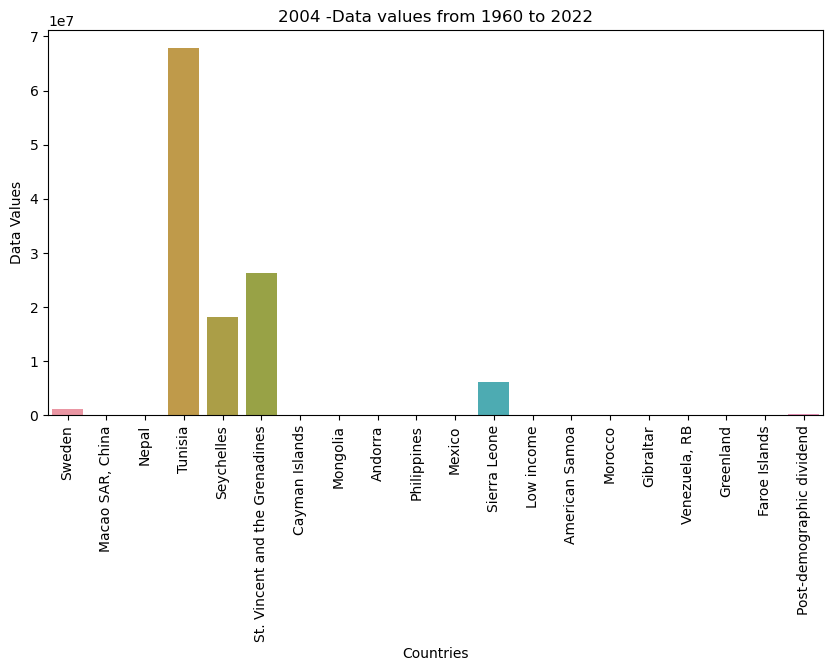

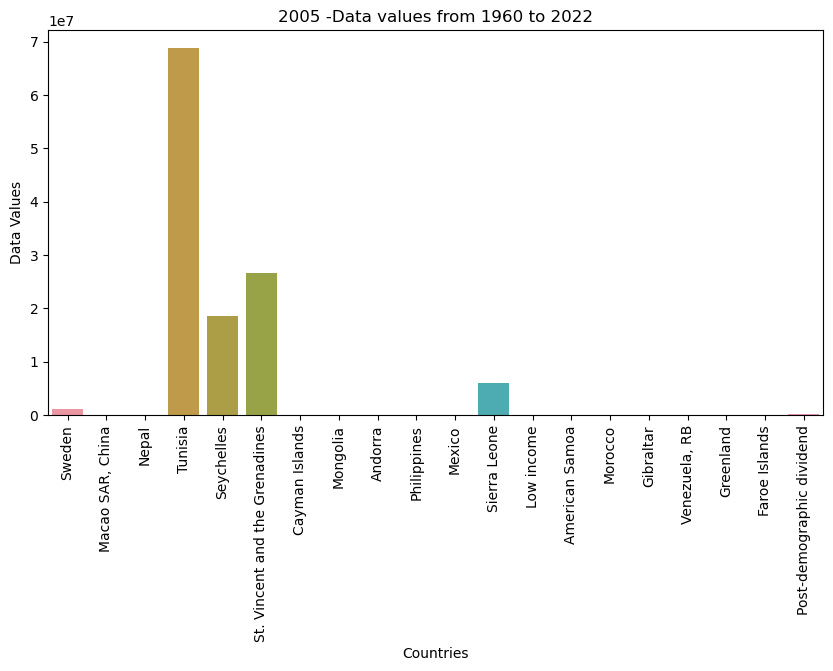

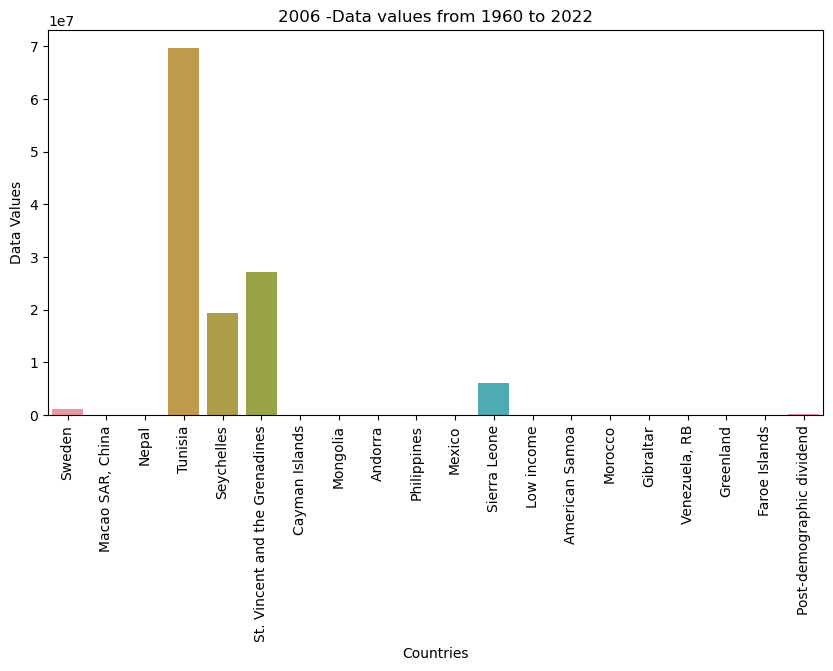

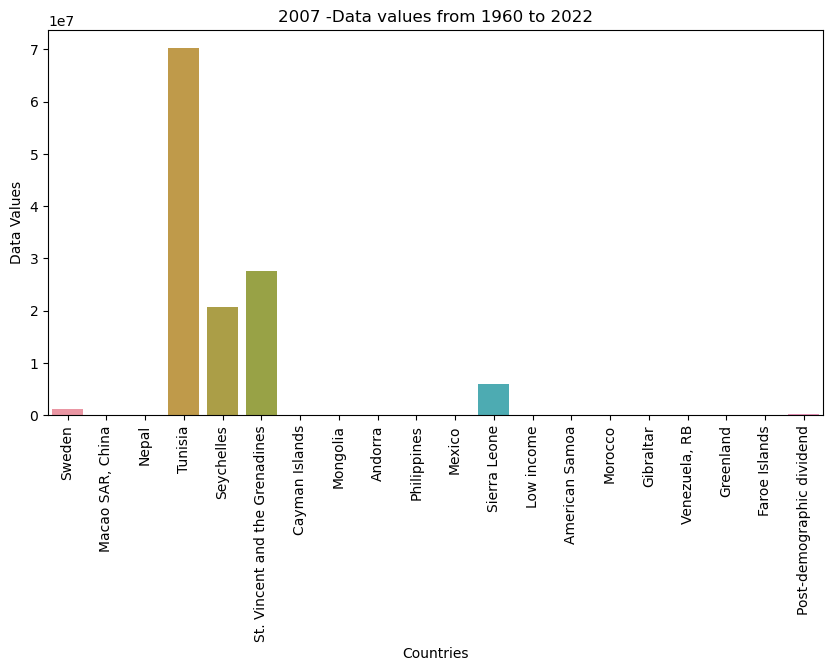

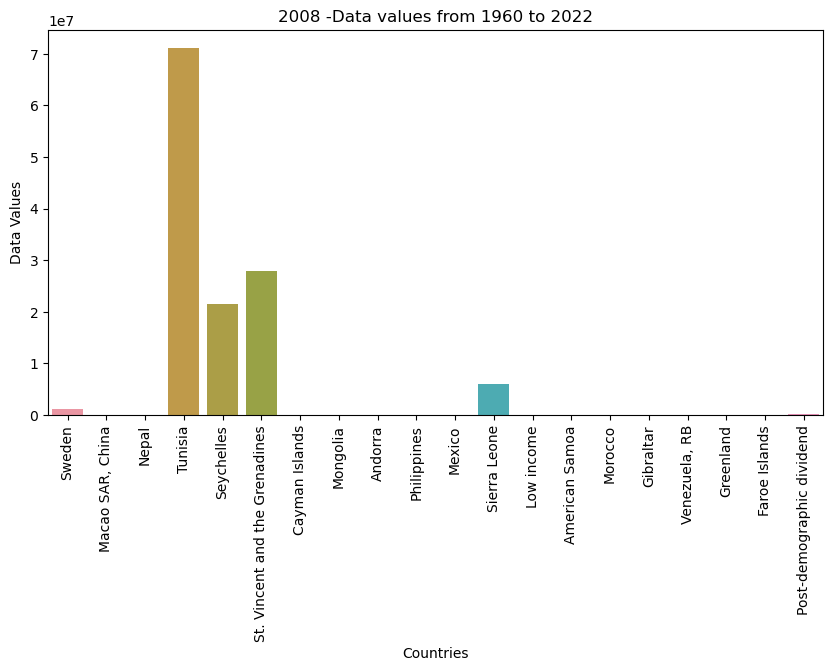

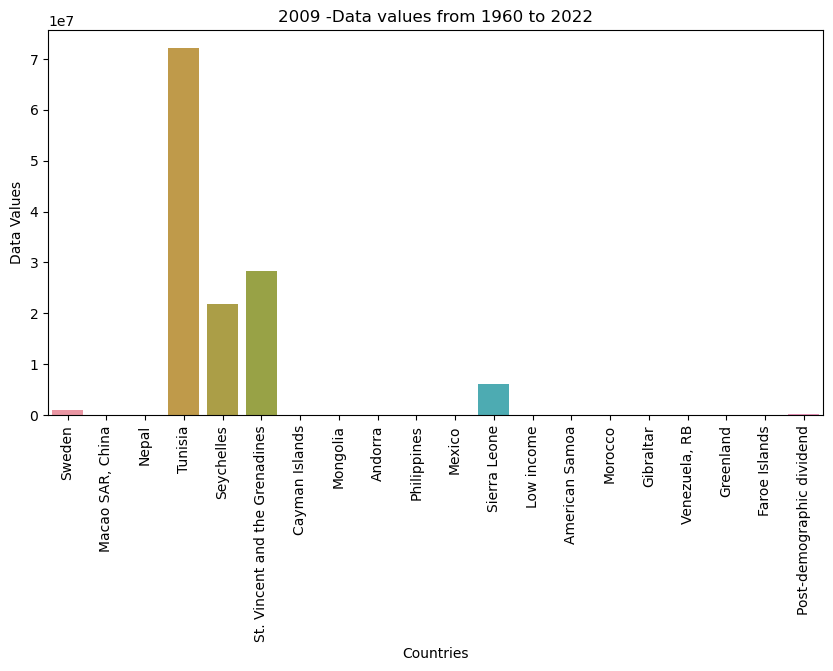

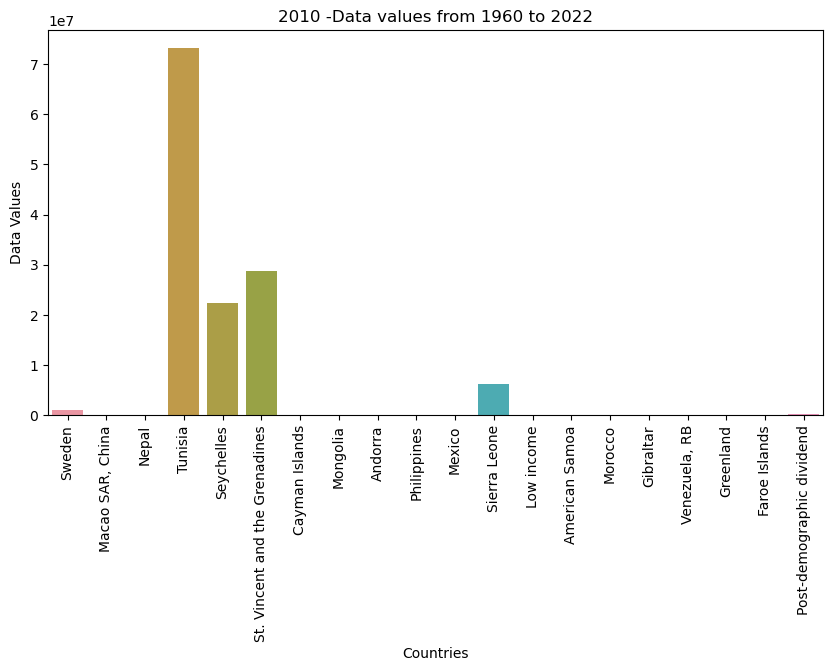

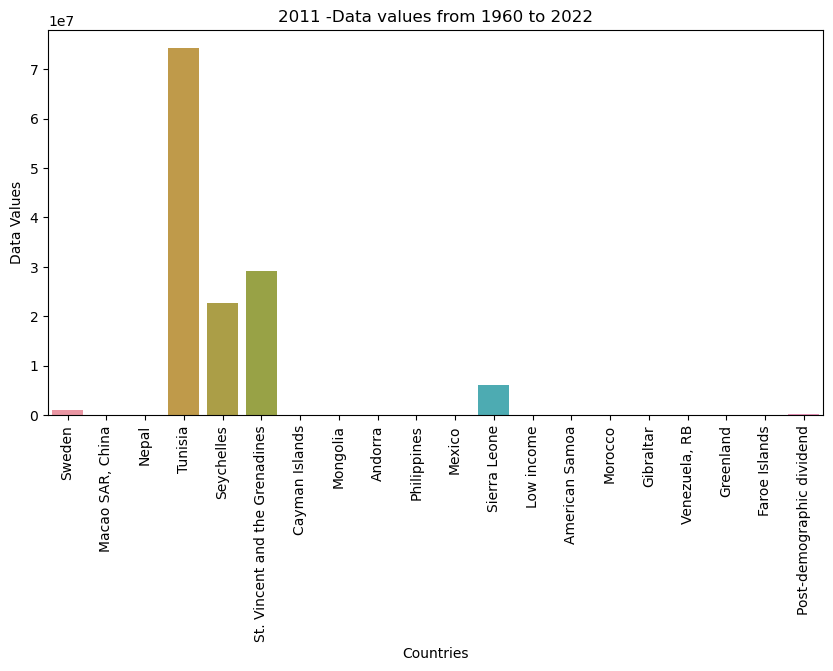

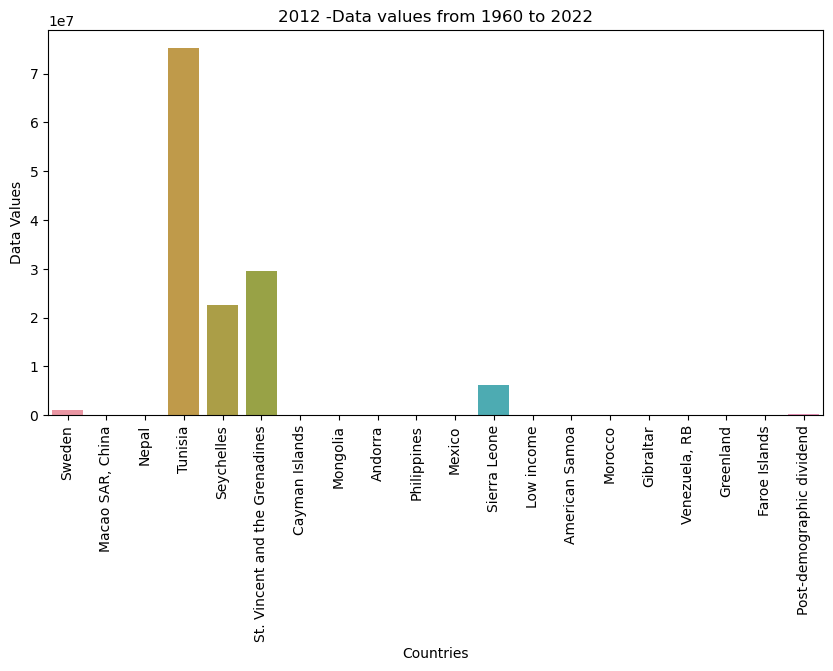

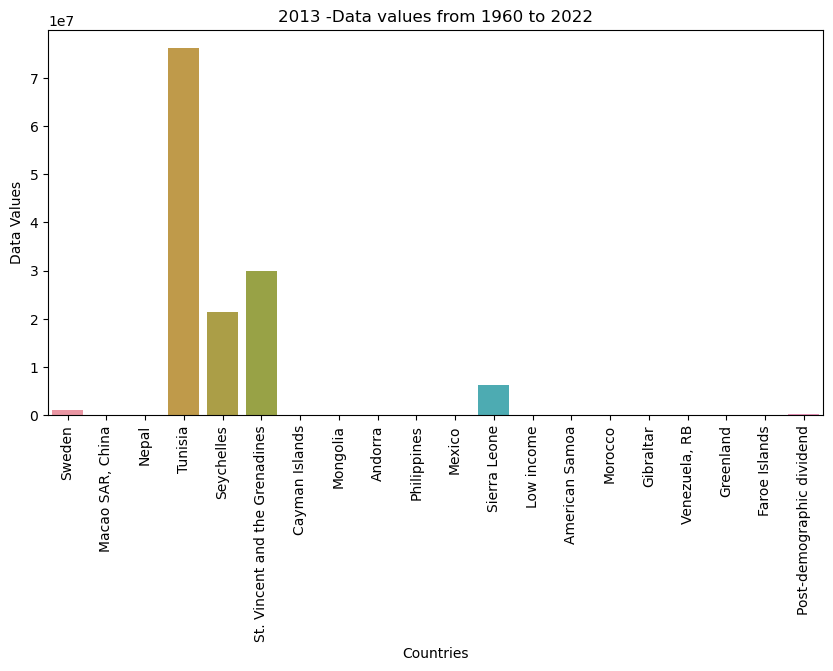

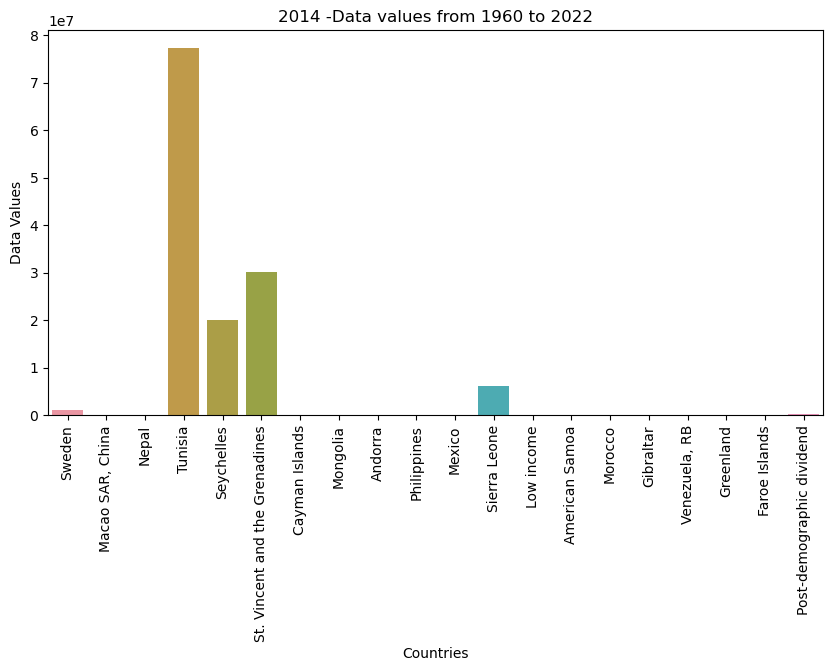

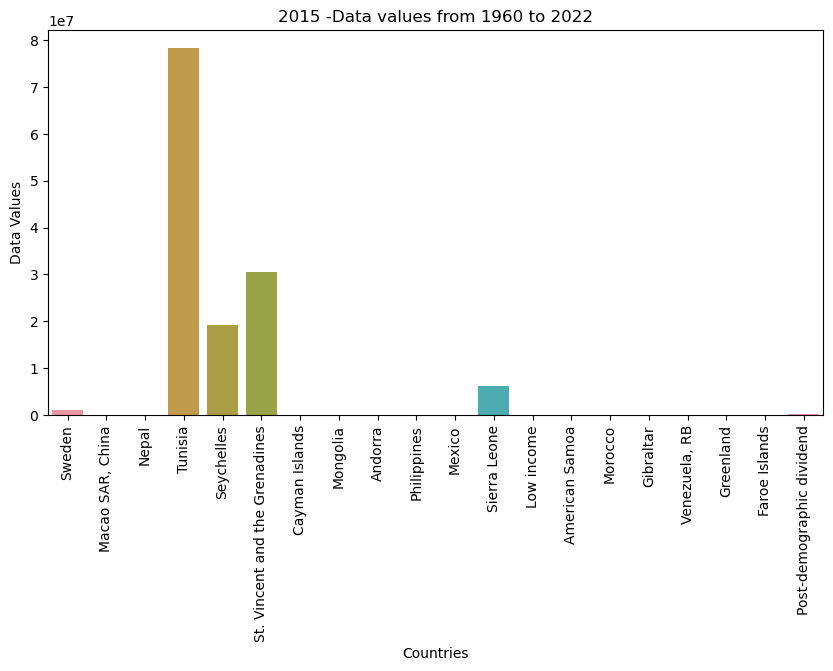

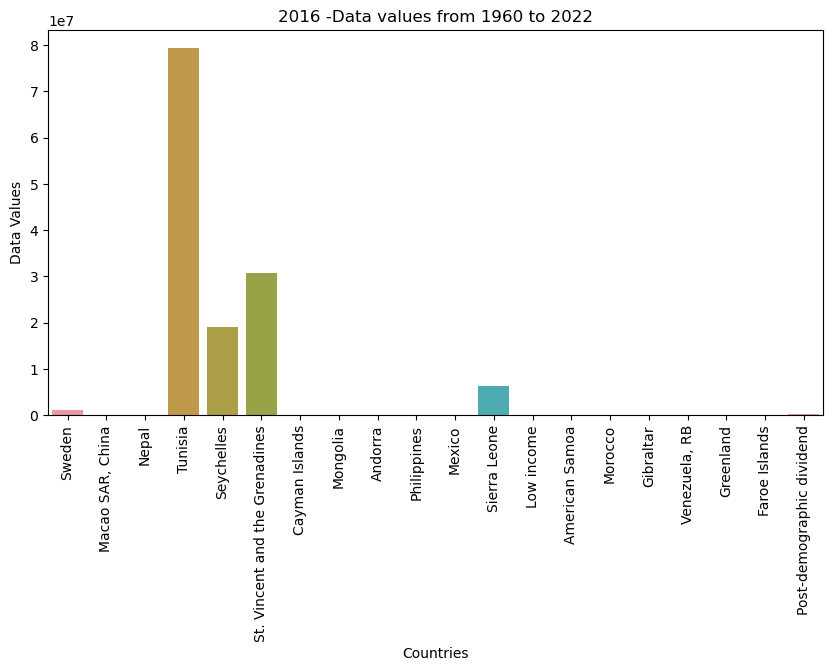

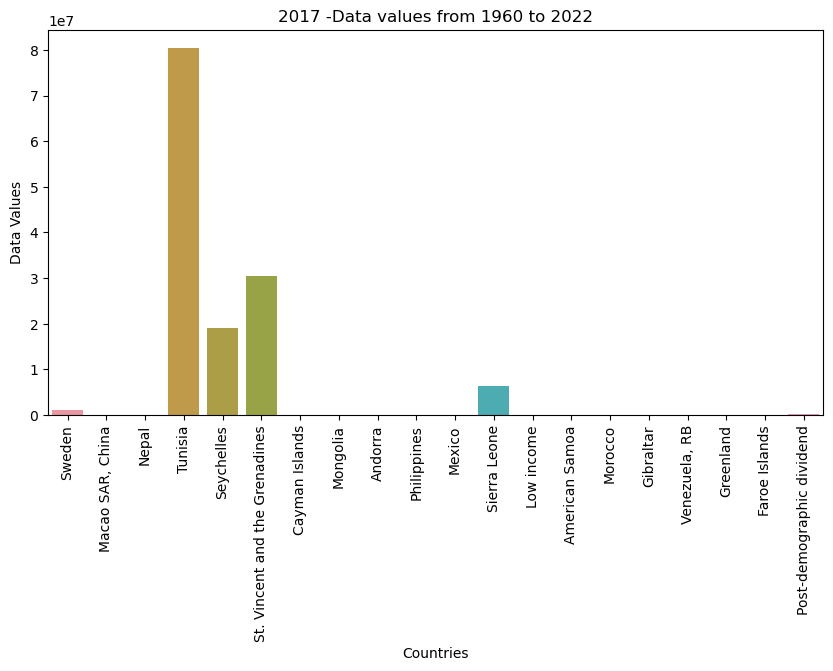

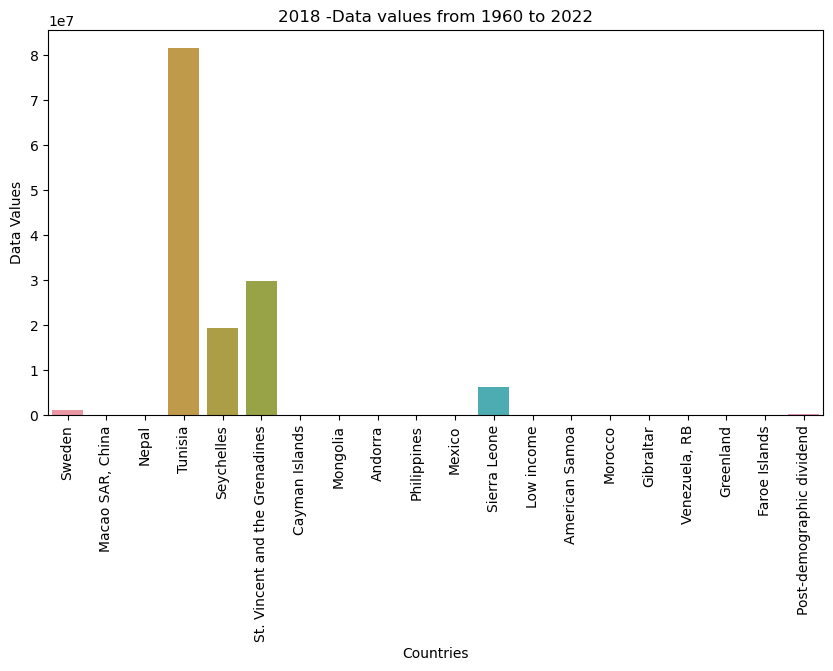

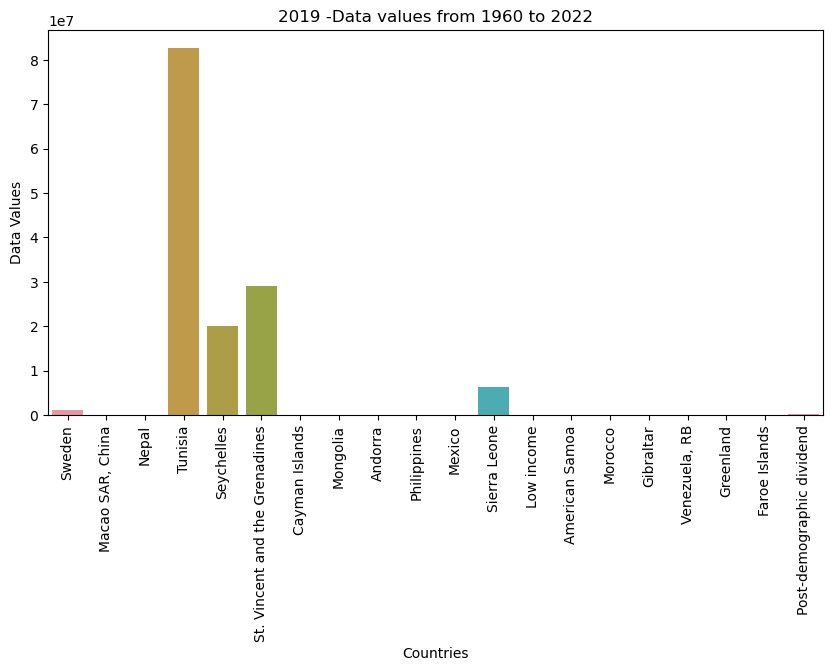

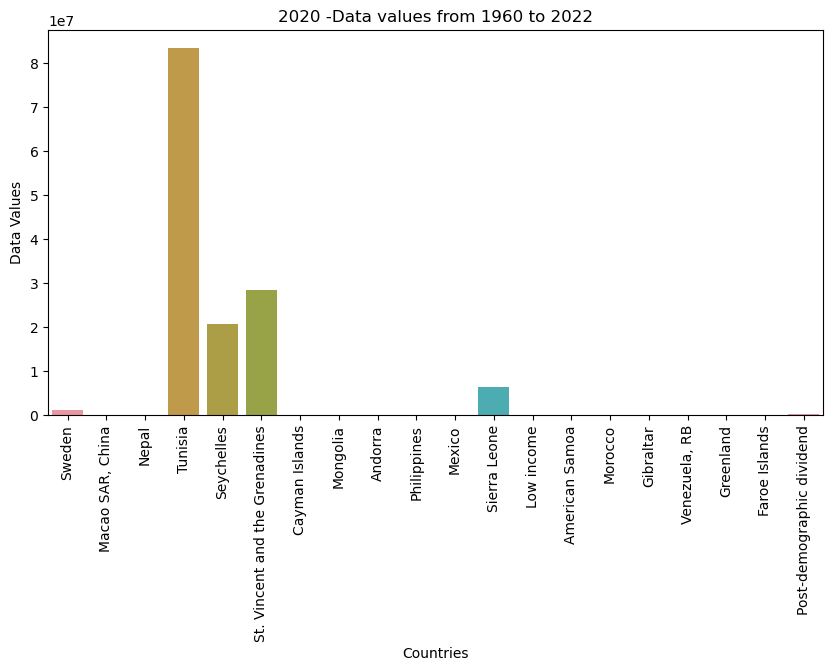

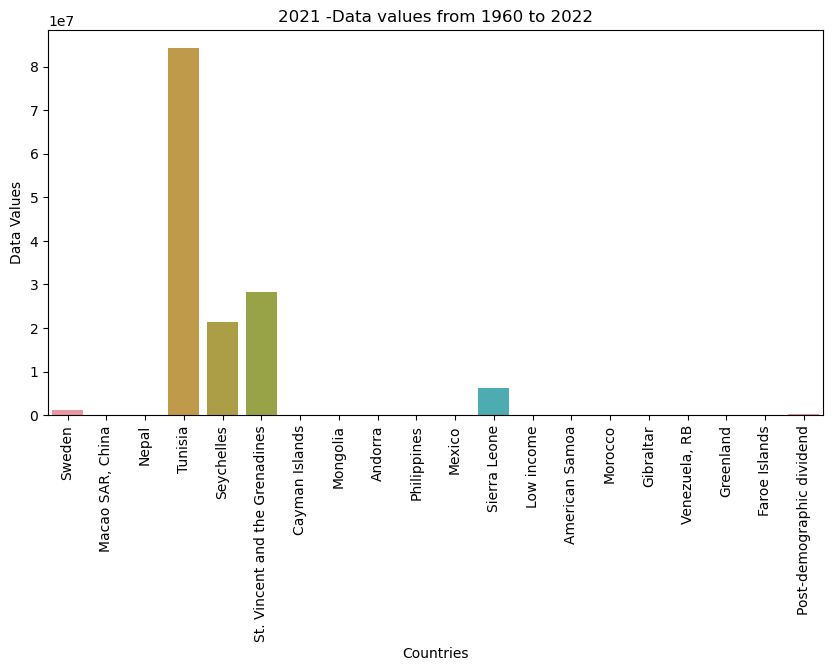

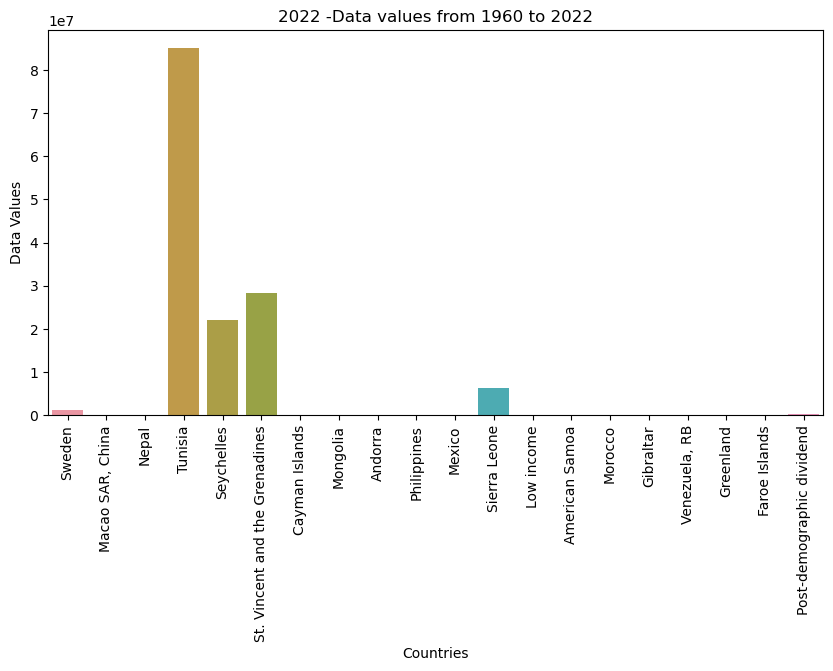

In [81]:
country_by_1960_t=country_by_1960.set_index('Country Name').T
for country_name,data_values in country_by_1960_t.iterrows():
    fig=plt.figure(figsize=(10,5))
    sns.barplot(x=data_values.index, y=data_values.values)
    plt.xlabel('Countries')
    plt.ylabel('Data Values')
    plt.title(f'{country_name} -Data values from 1960 to 2022')
    plt.xticks(rotation=90)
    plt.show()

In [82]:
country_by_2022=df2.sort_values(by='2022').head(20)
country_by_2022

Country Name        1960        1961        1962        1963  \
244               Turkiye  10042458.0  10337891.0  10644622.0  10960161.0   
178                 Nepal      4582.0      4753.0      4950.0      5198.0   
187           Philippines      9446.0      9639.0      9851.0     10076.0   
254         Venezuela, RB     32500.0     34300.0     35000.0     39800.0   
146      Macao SAR, China      4135.0      4258.0      4388.0      4524.0   
84              Gibraltar     21822.0     21907.0     22249.0     22796.0   
211           El Salvador   2870732.0   2945662.0   3022827.0   3102170.0   
148               Morocco     21797.0     21907.0     22106.0     22442.0   
136            Low income     16472.0     16834.0     17221.0     17625.0   
154                Mexico     15374.0     15867.0     16387.0     16947.0   
224              Eswatini     41700.0     42889.0     44042.0     45176.0   
11         American Samoa     20085.0     20626.0     21272.0     21949.0   
227  Syrian Arab Republic   3028688.0   3087657.0   3148242.0   3210296.0   
124              Kiribati     56660.0     56247.0     55404.0     54391.0   
163              Mongolia      8702.0      8965.0      9252.0      9561.0   
78          Faroe Islands     34154.0     34572.0     34963.0     35385.0   
91              Greenland     32500.0     33700.0     35000.0     36400.0   
27                Bermuda     44400.0     45500.0     46600.0     47700.0   
52         Cayman Islands      8473.0      8626.0      8799.0      8985.0   
57               Dominica     59379.0     60395.0     61224.0     62031.0   

           1964        1965        1966        1967        1968  ...     2013  \
244  11289556.0  11630603.0  11981932.0  12346286.0  12739965.0  ...  10918.0   
178      5484.0      5804.0      6021.0      6114.0      6288.0  ...  10694.0   
187     10318.0     10563.0     10813.0     10992.0     11079.0  ...  17805.0   
254     40800.0     43500.0     46200.0     49100.0     55700.0  ...  28657.0   
146      4666.0      4832.0      5044.0      5294.0      5497.0  ...  35639.0   
84      23347.0     23910.0     24477.0     25047.0     25610.0  ...  32411.0   
211   3183590.0   3267593.0   3353665.0   3441799.0   3532420.0  ...  33285.0   
148     22766.0     23022.0     23198.0     23281.0     23481.0  ...  35425.0   
136     18058.0     18500.0     18957.0     19467.0     20011.0  ...  36806.0   
154     17537.0     18154.0     18794.0     19665.0     21001.0  ...  51352.0   
224     46322.0     47500.0     48699.0     49911.0     51134.0  ...  36607.0   
11      22656.0     23391.0     24122.0     24848.0     25608.0  ...  52995.0   
227   3273419.0   3336338.0   3398664.0   3461664.0   3526770.0  ...  33594.0   
124     53255.0     52016.0     50683.0     49269.0     47772.0  ...  47767.0   
163      9890.0     10229.0     10577.0     10720.0     10440.0  ...  52141.0   
78      35841.0     36346.0     36825.0     37234.0     37630.0  ...  48418.0   
91      37600.0     39200.0     40500.0     41900.0     43400.0  ...  56483.0   
27      48900.0     50100.0     51000.0     52000.0     53000.0  ...  65001.0   
52       9172.0      9366.0      9566.0      9771.0      9981.0  ...  58212.0   
57      62843.0     63744.0     64728.0     65760.0     66865.0  ...  68819.0   

        2014     2015     2016     2017     2018     2019     2020     2021  \
244  10899.0  10877.0  10852.0  10828.0  10865.0  10956.0  11069.0  11204.0   
178  10940.0  11185.0  11437.0  11682.0  11924.0  12132.0  12315.0  12511.0   
187  17796.0  17794.0  17816.0  17837.0  17864.0  17916.0  17972.0  18024.0   
254  28971.0  29366.0  29739.0  30060.0  30335.0  30610.0  30910.0  31122.0   
146  35261.0  35020.0  34811.0  34496.0  33852.0  33121.0  32553.0  31948.0   
84   32452.0  32520.0  32565.0  32602.0  32648.0  32685.0  32709.0  32669.0   
211  33389.0  33570.0  33834.0  34056.0  34156.0  34178.0  34007.0  33745.0   
148  36110.0  36760.0  37071.0  37044.0  37029.0  37034.0  36

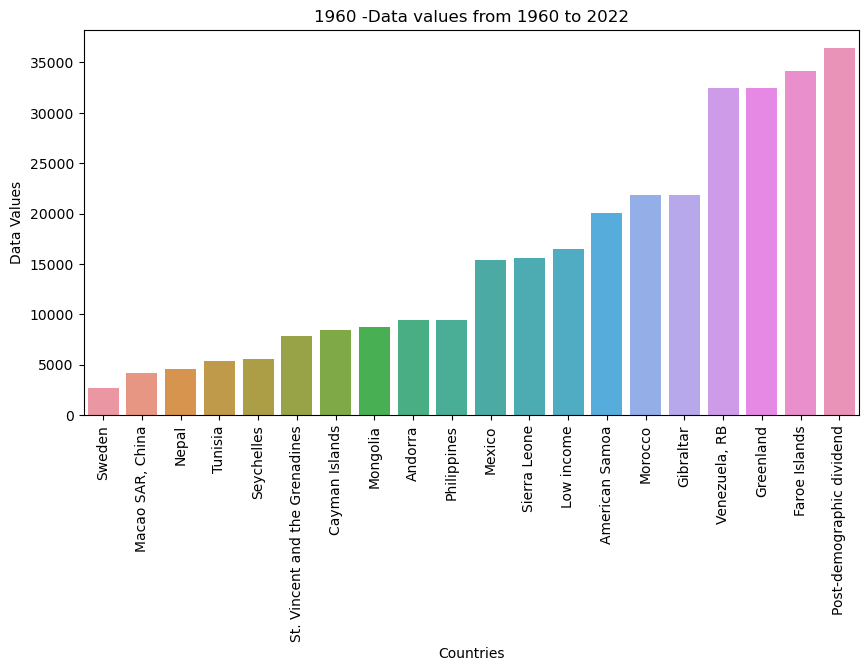

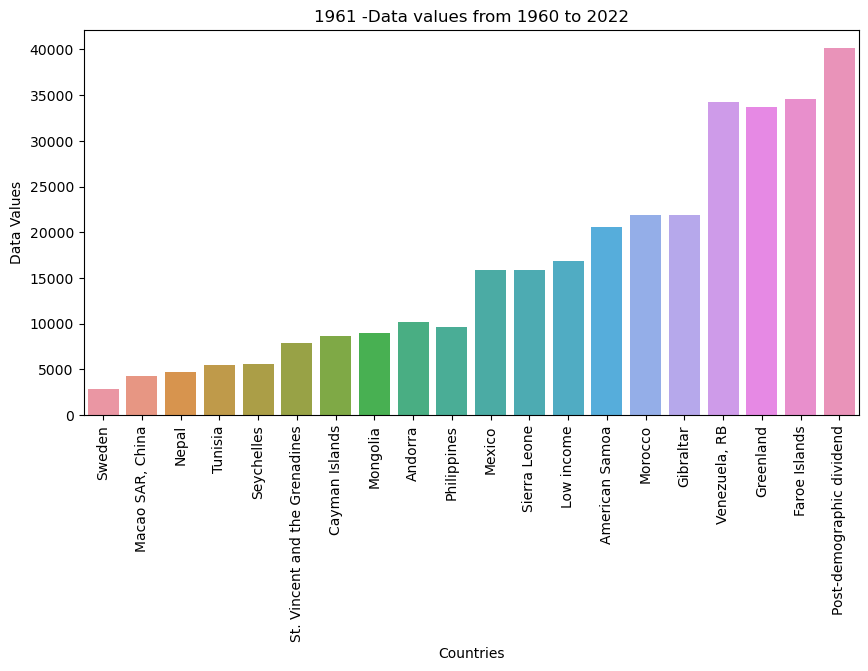

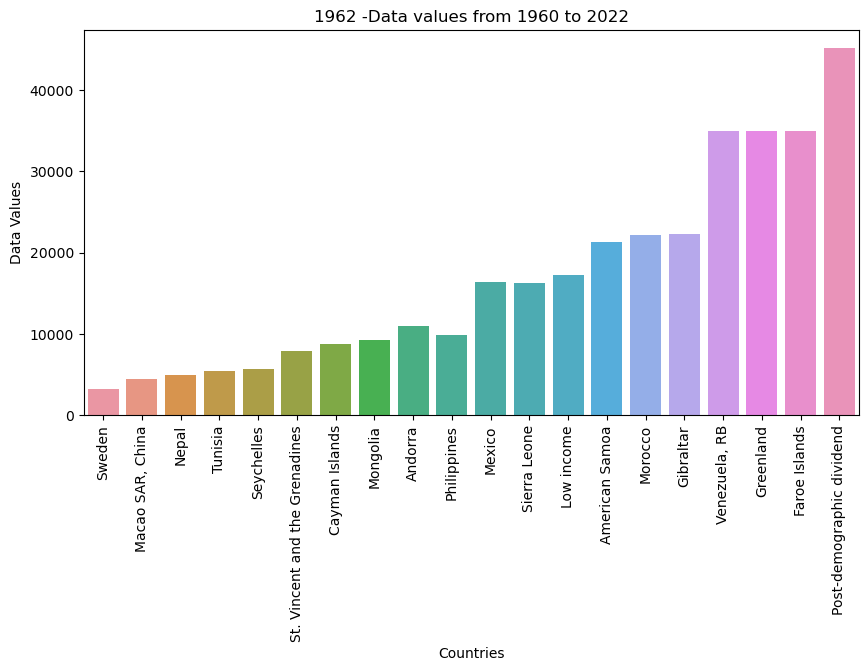

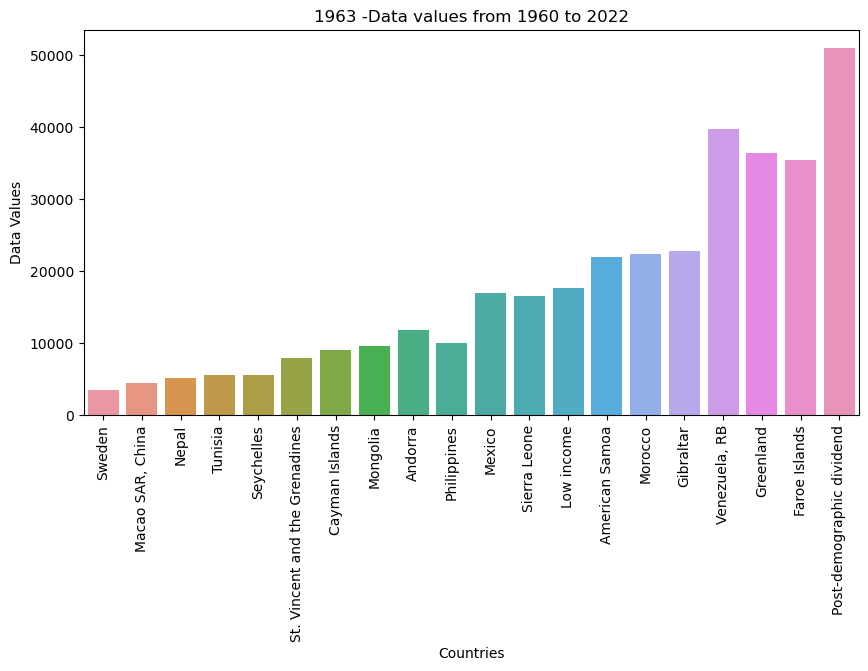

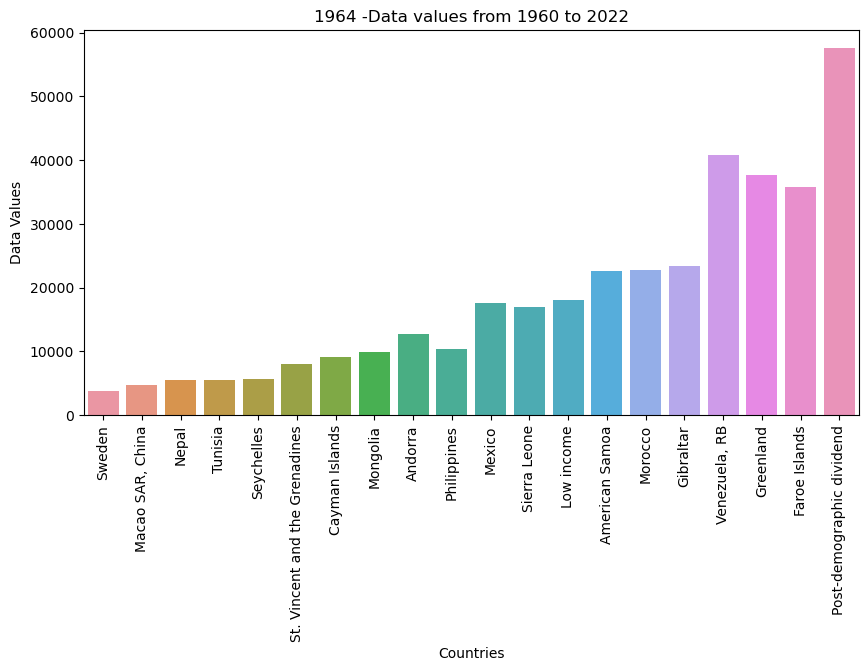

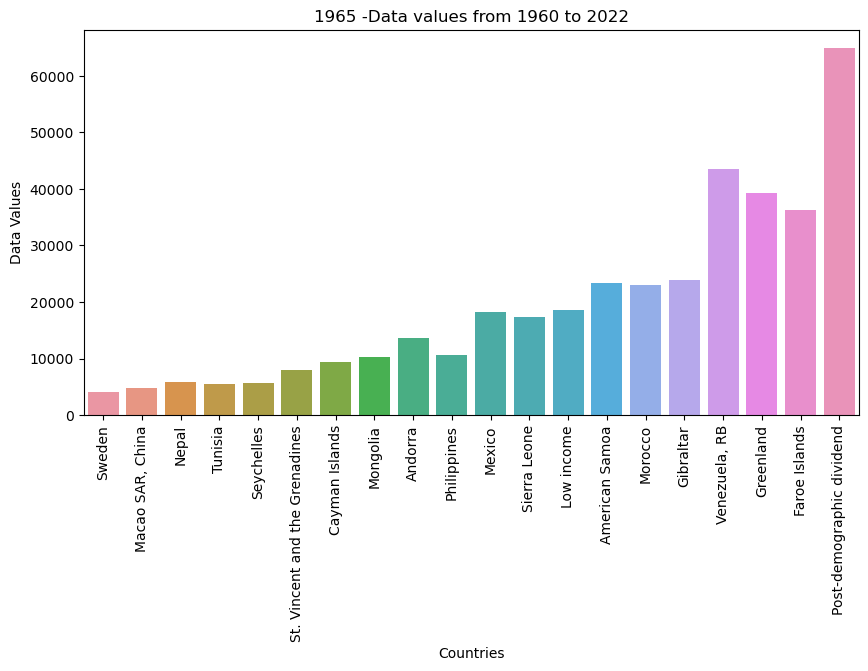

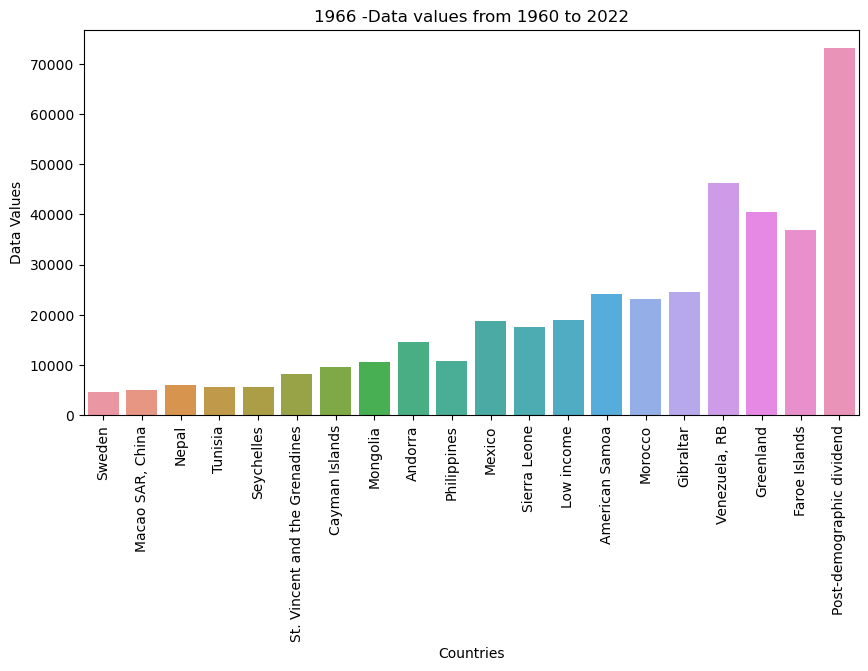

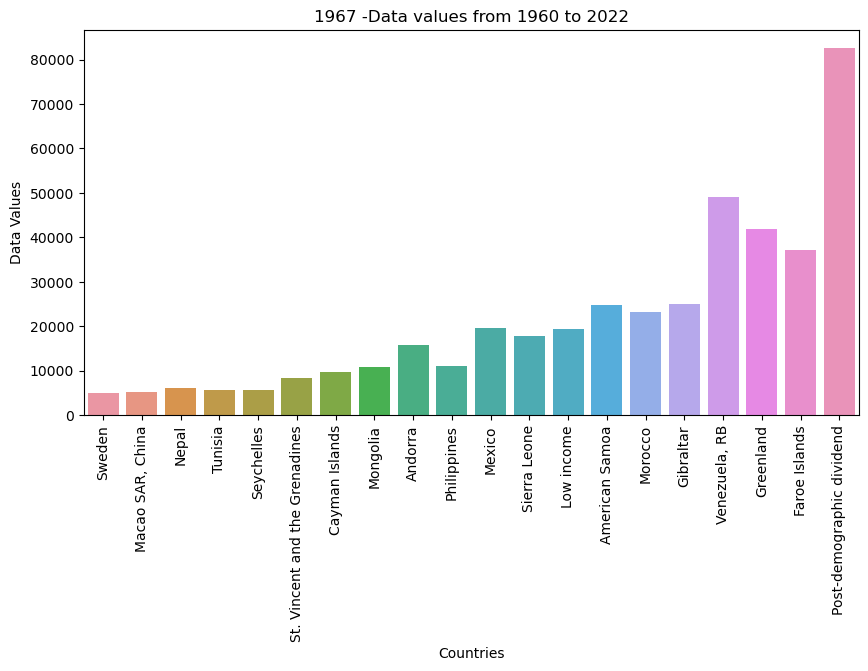

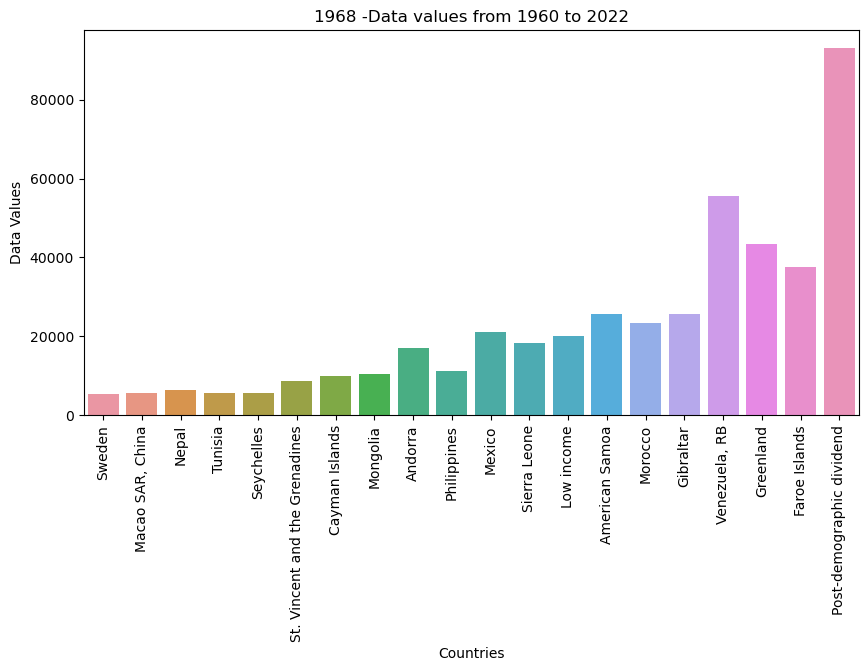

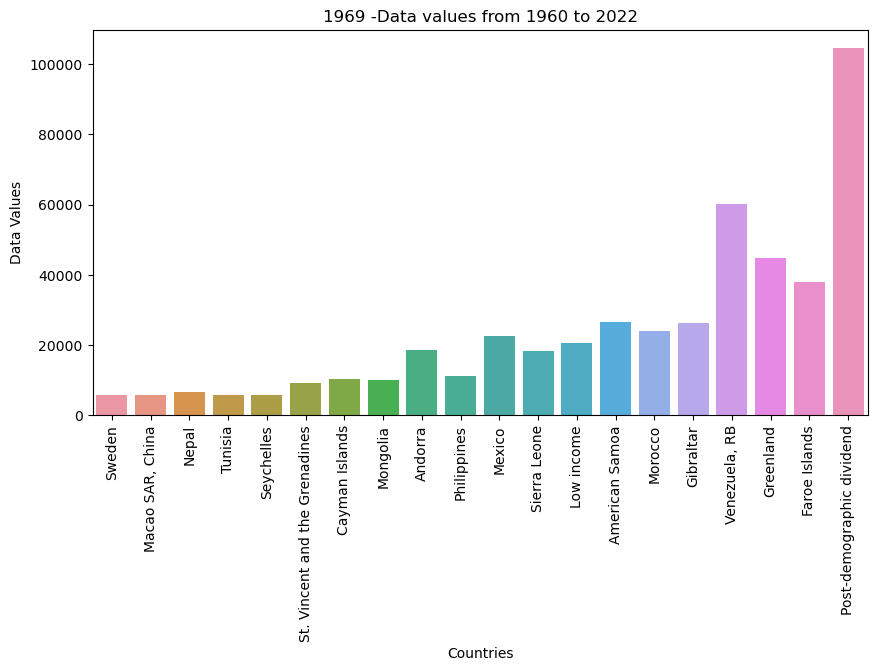

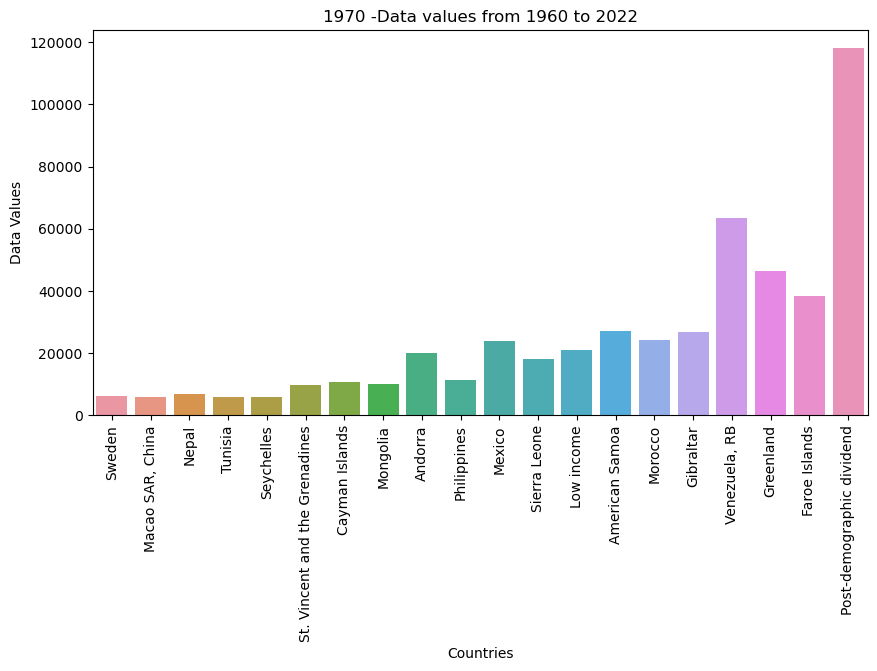

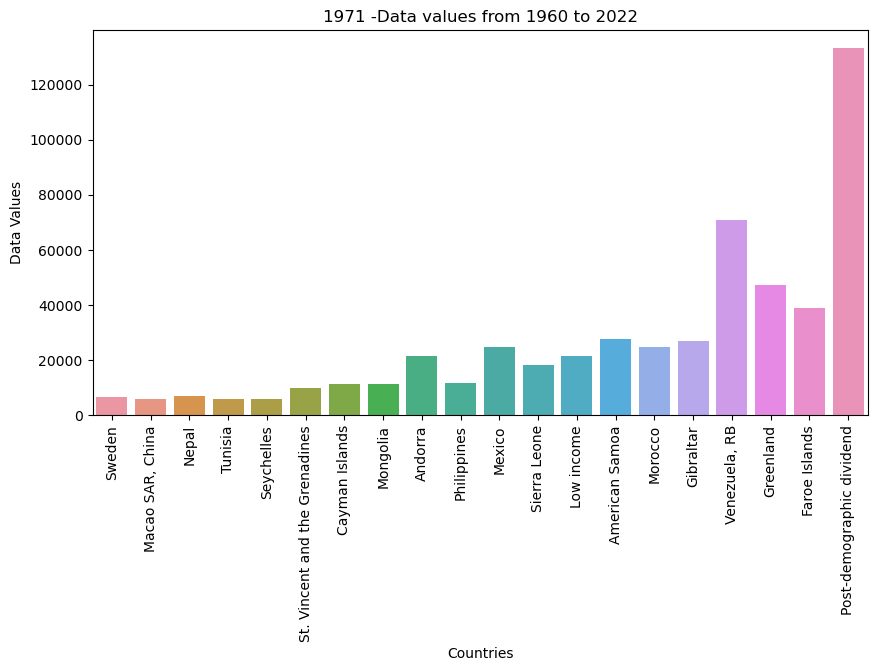

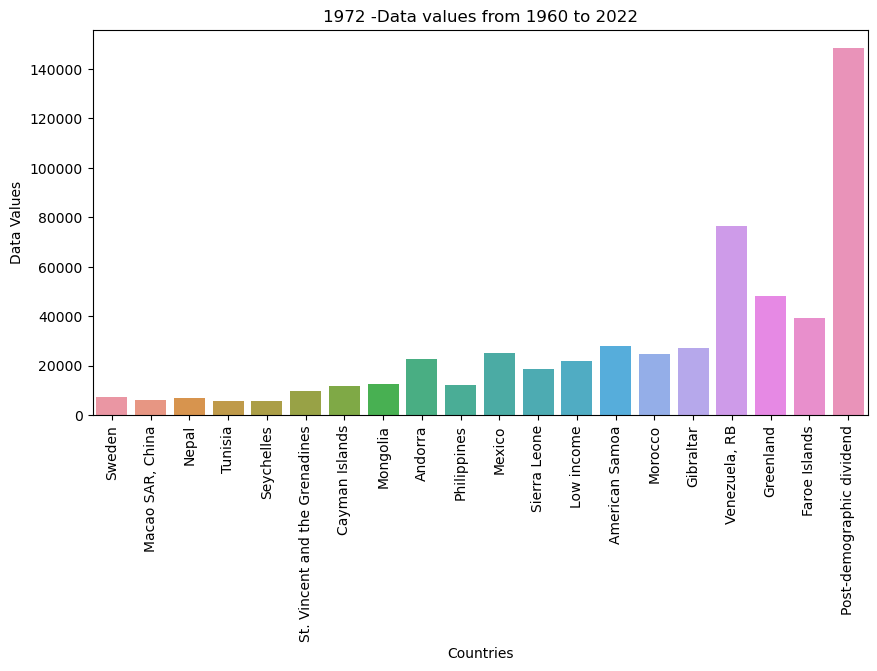

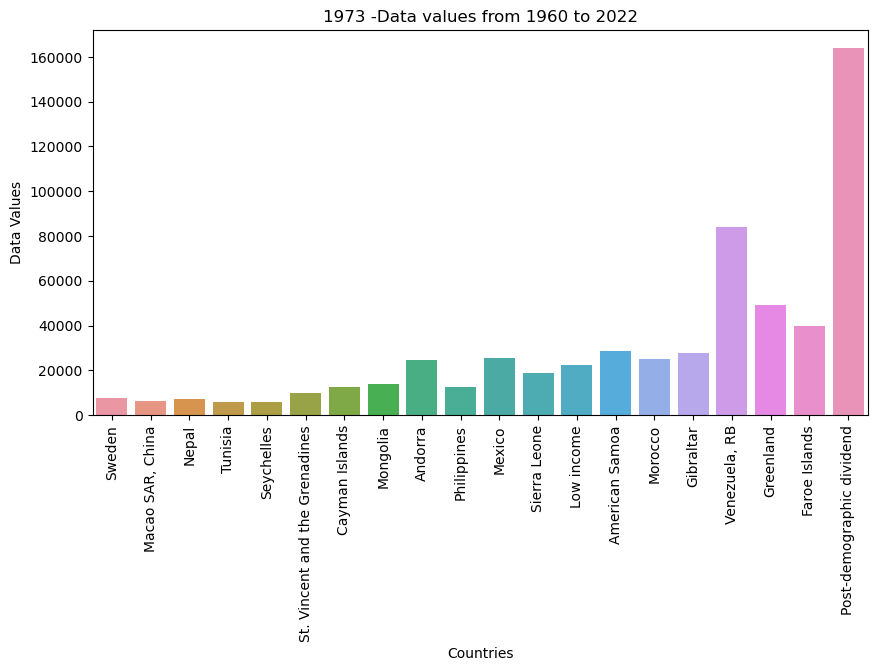

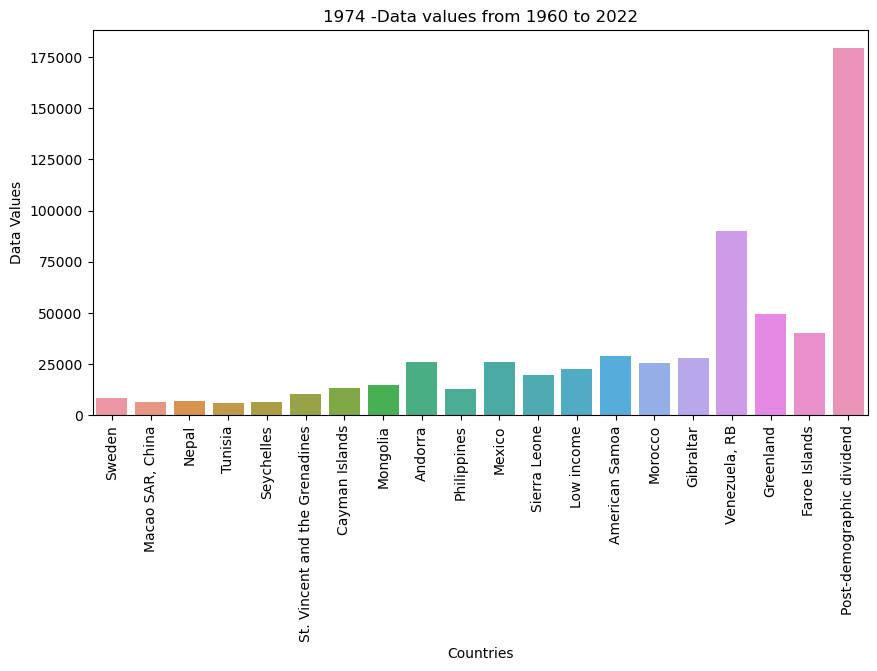

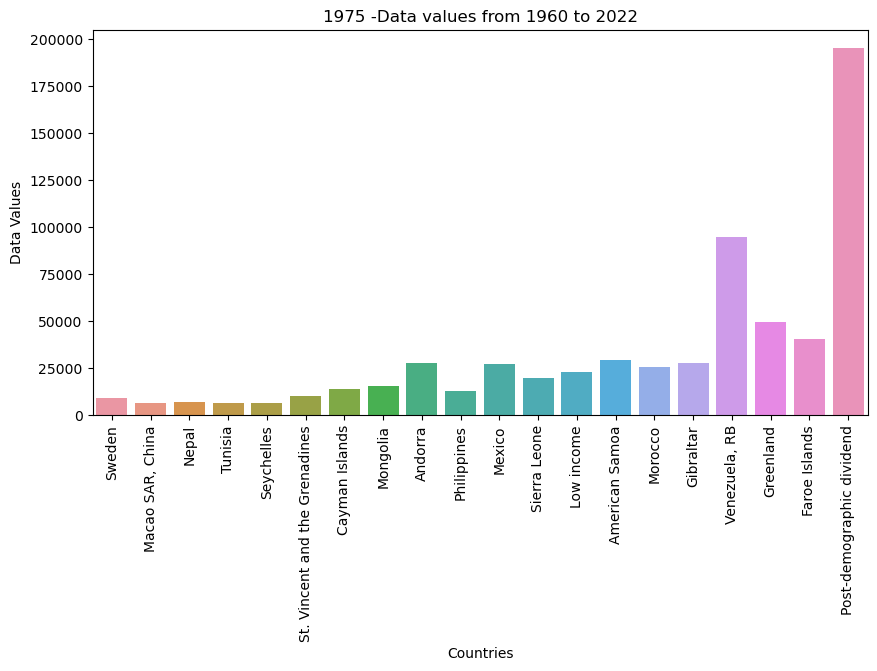

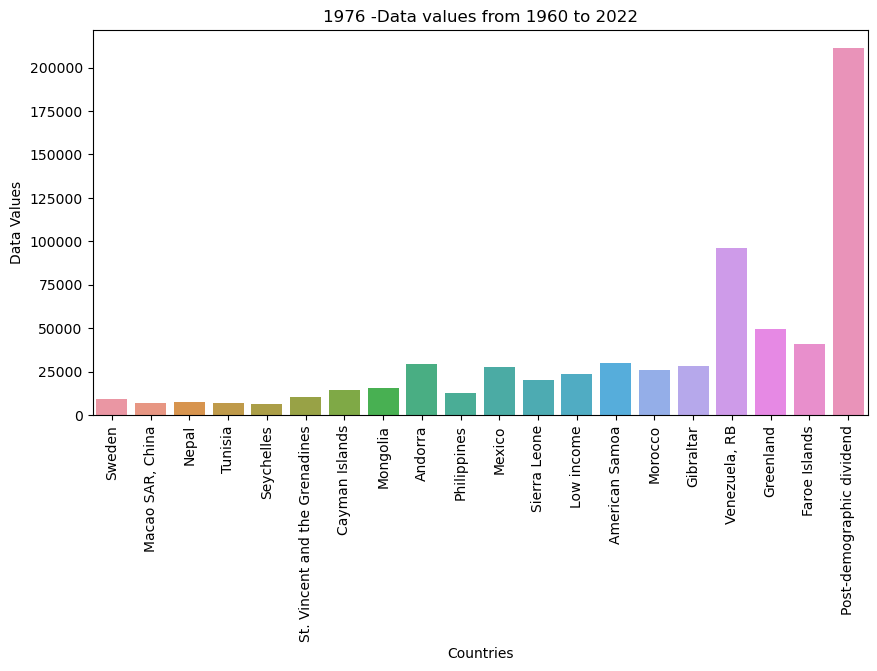

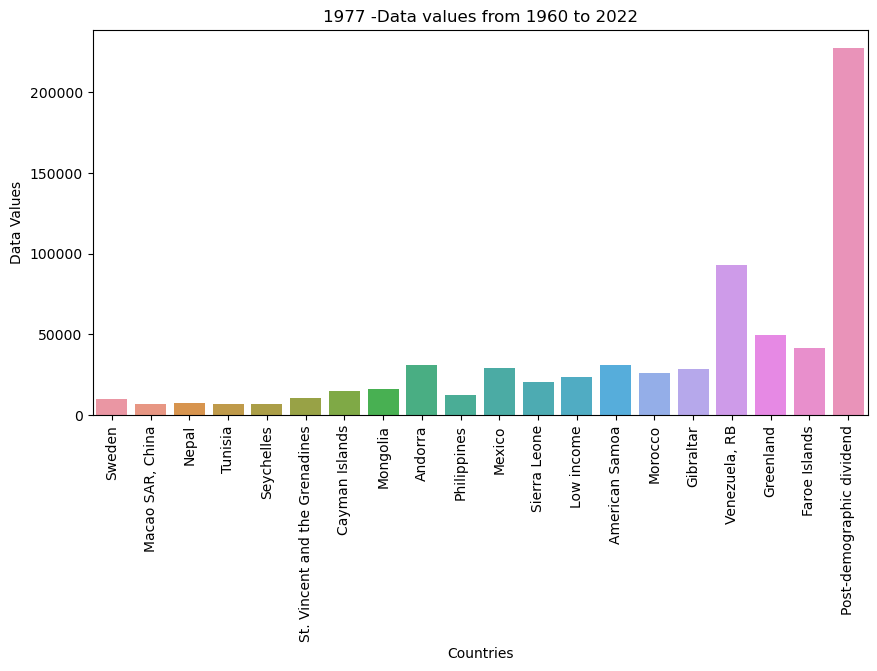

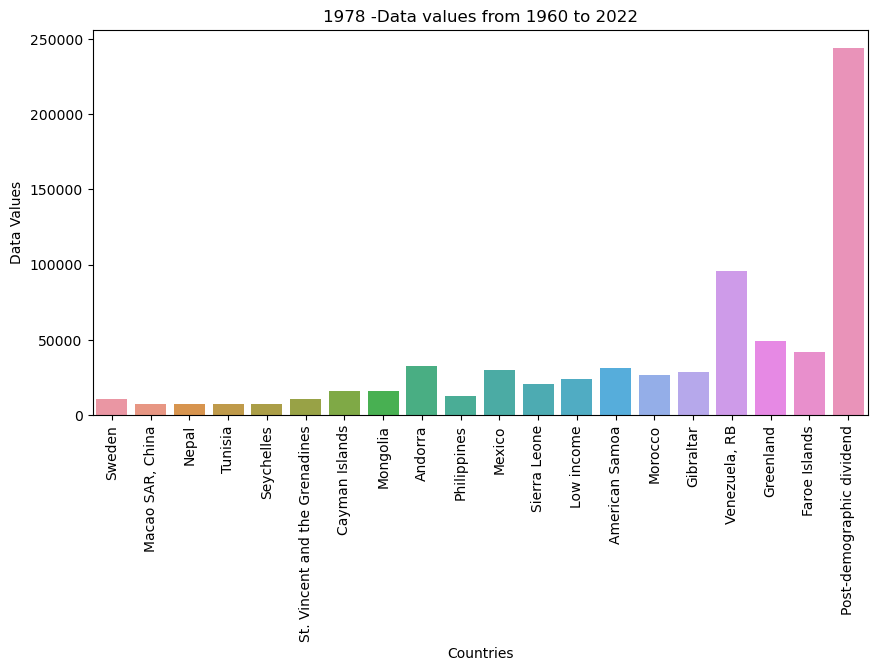

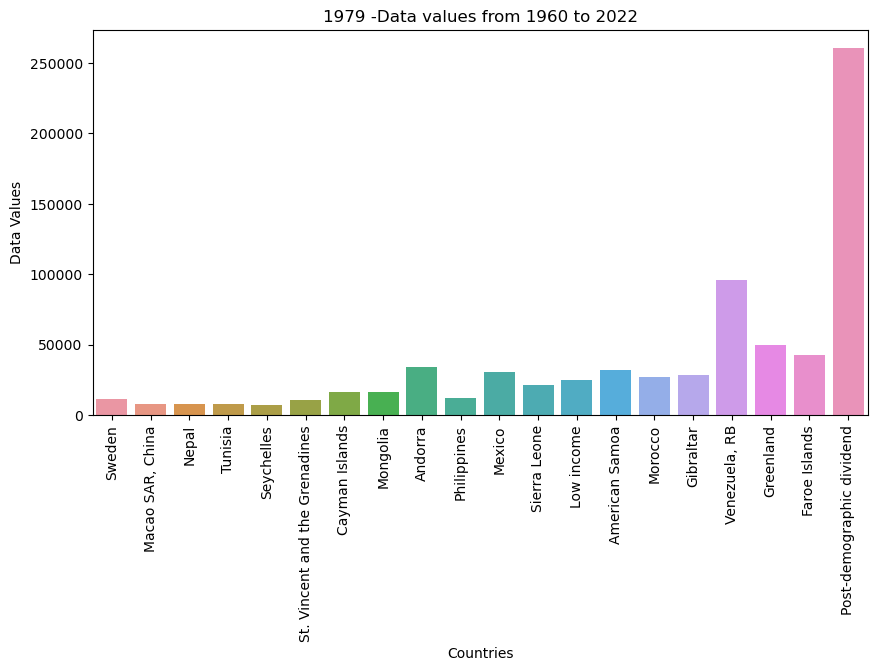

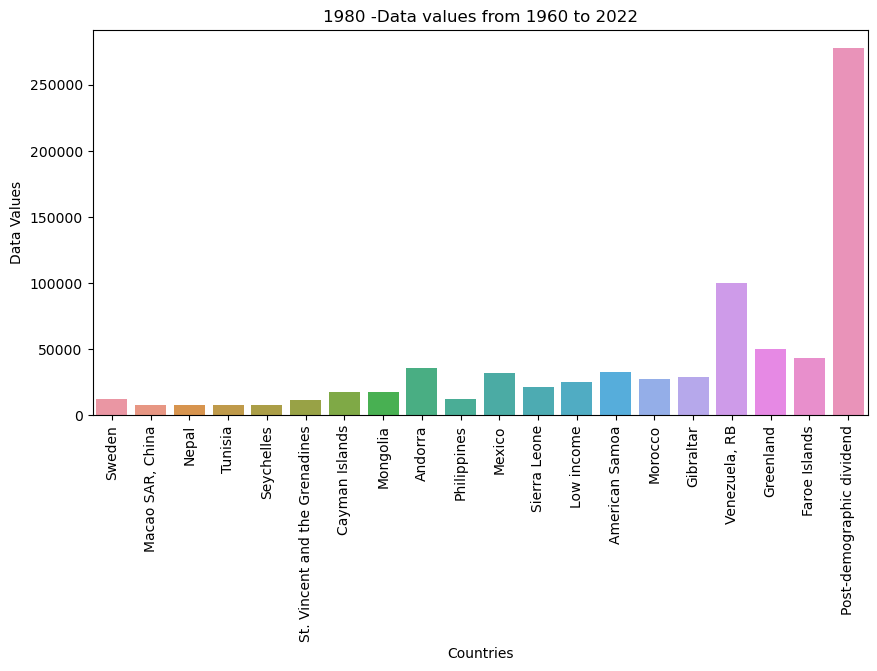

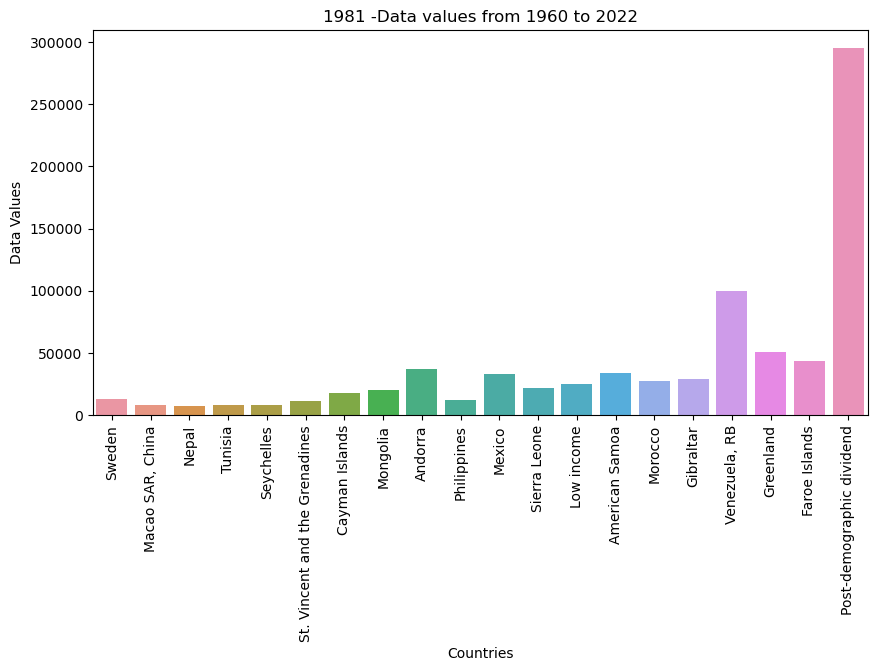

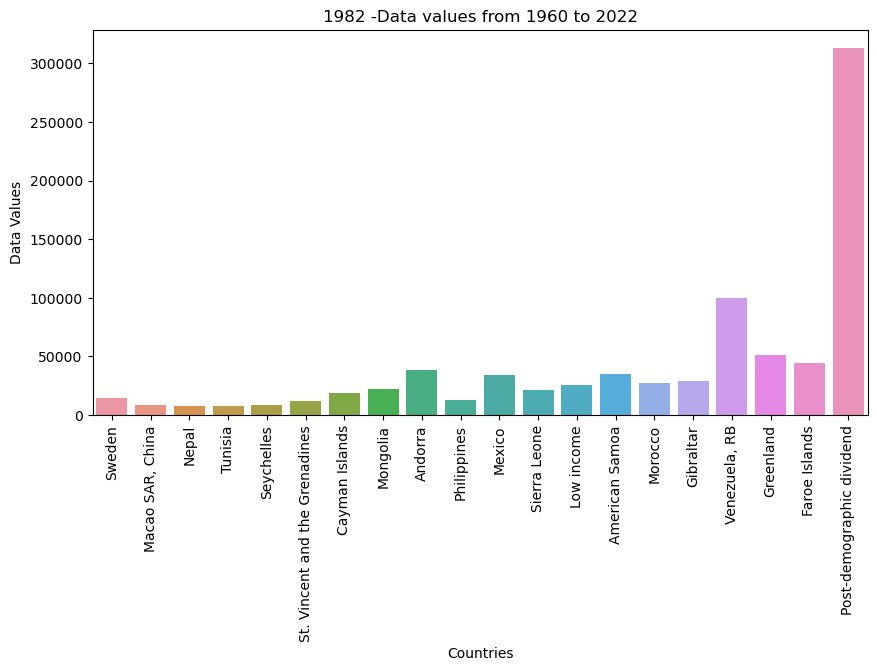

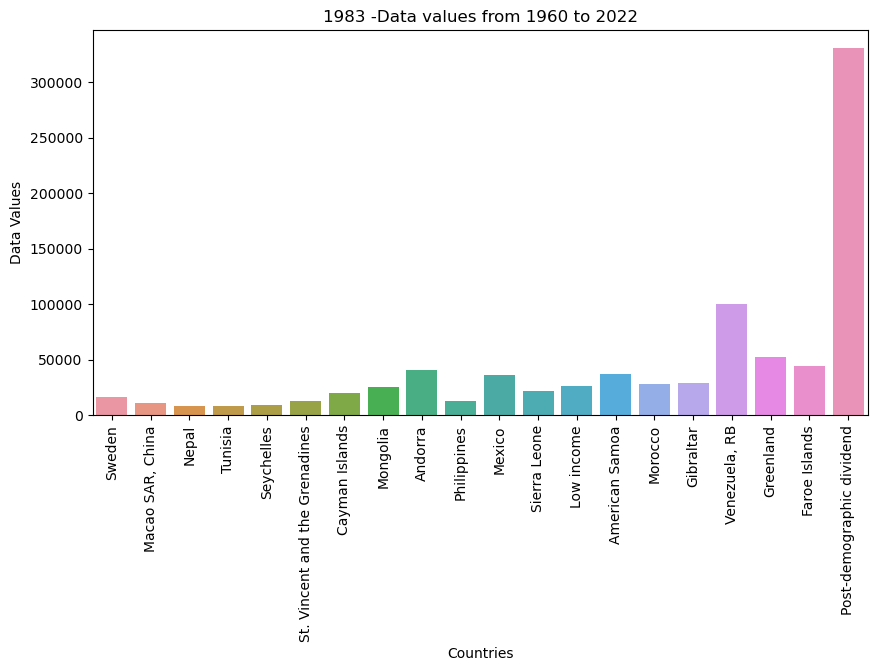

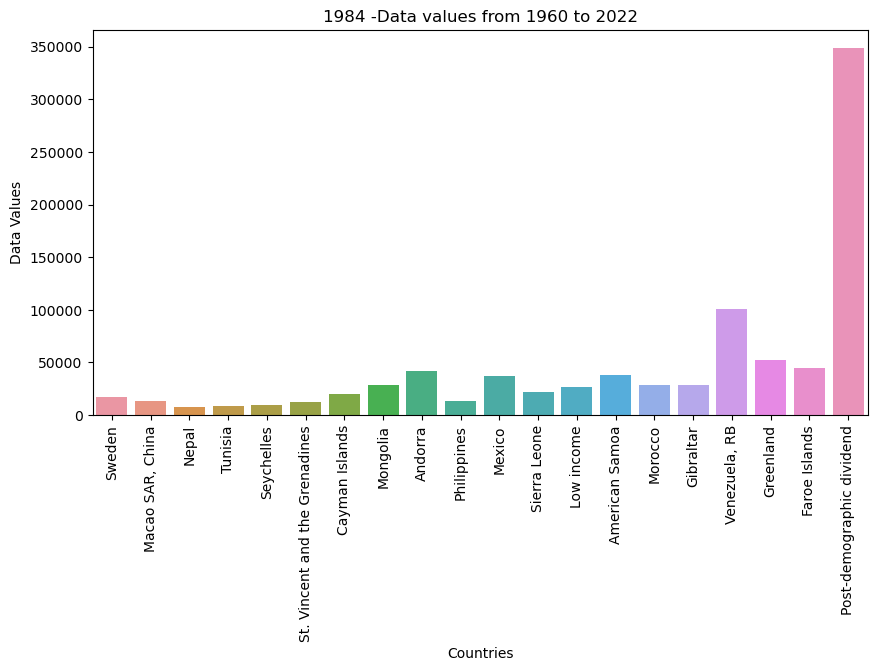

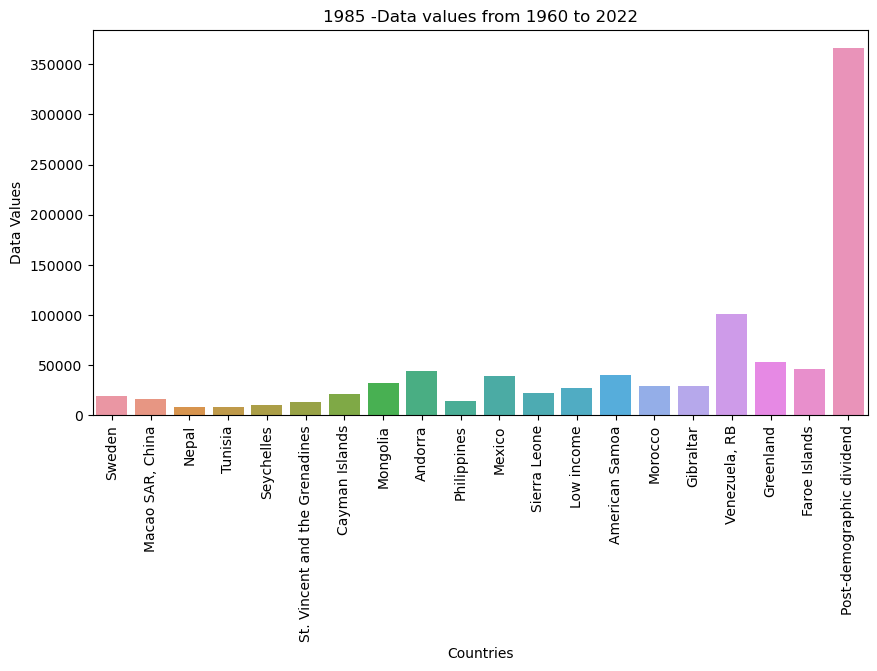

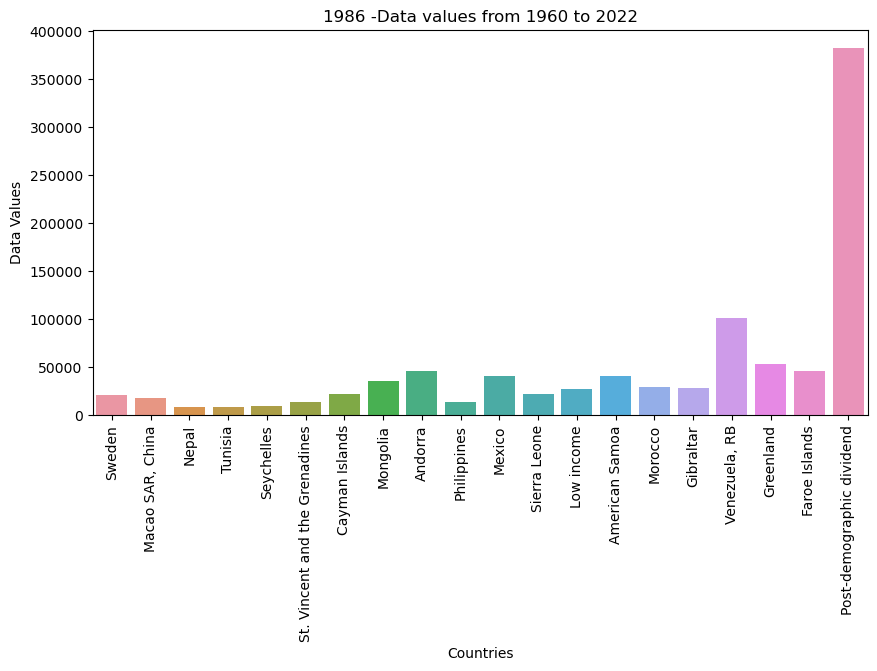

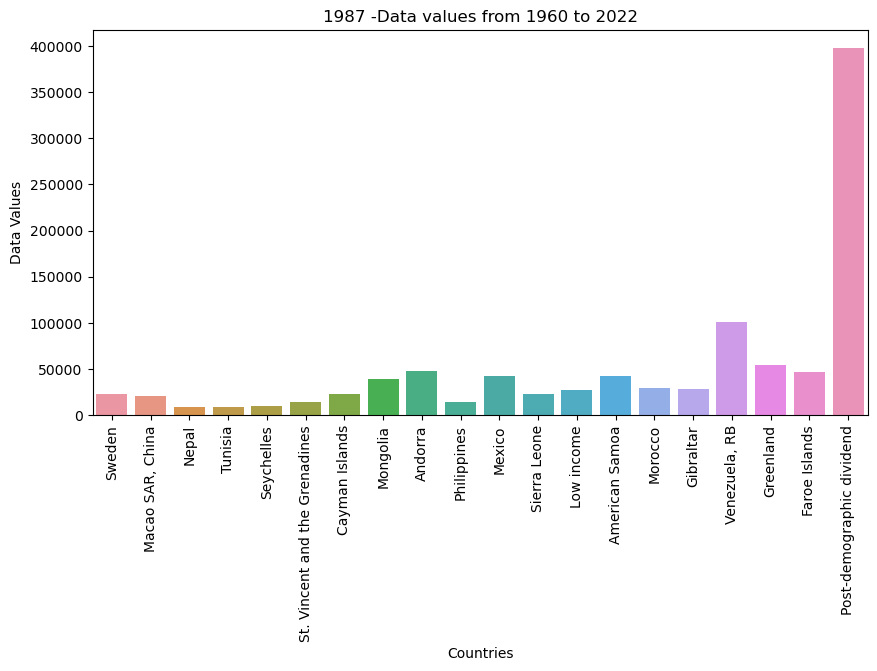

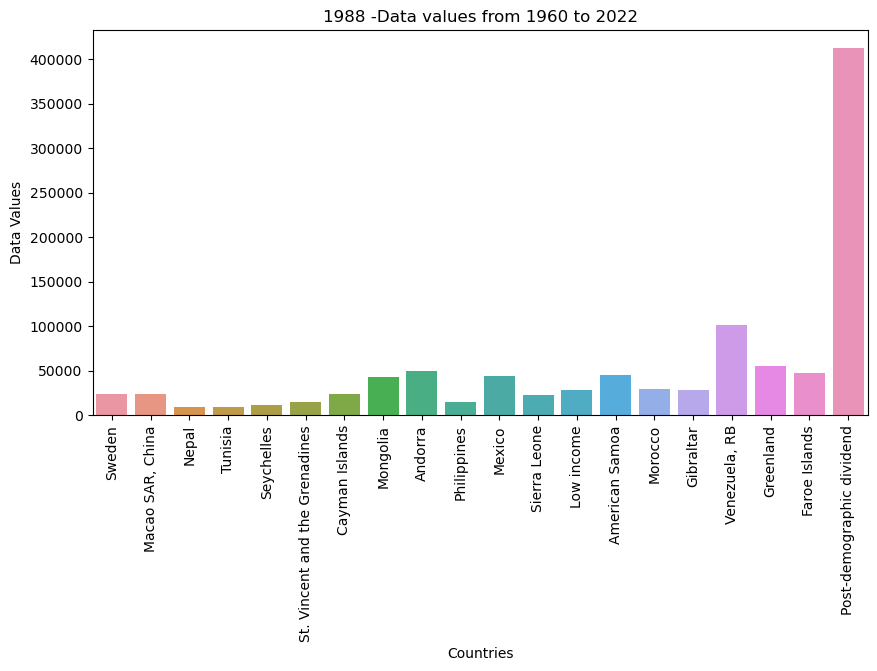

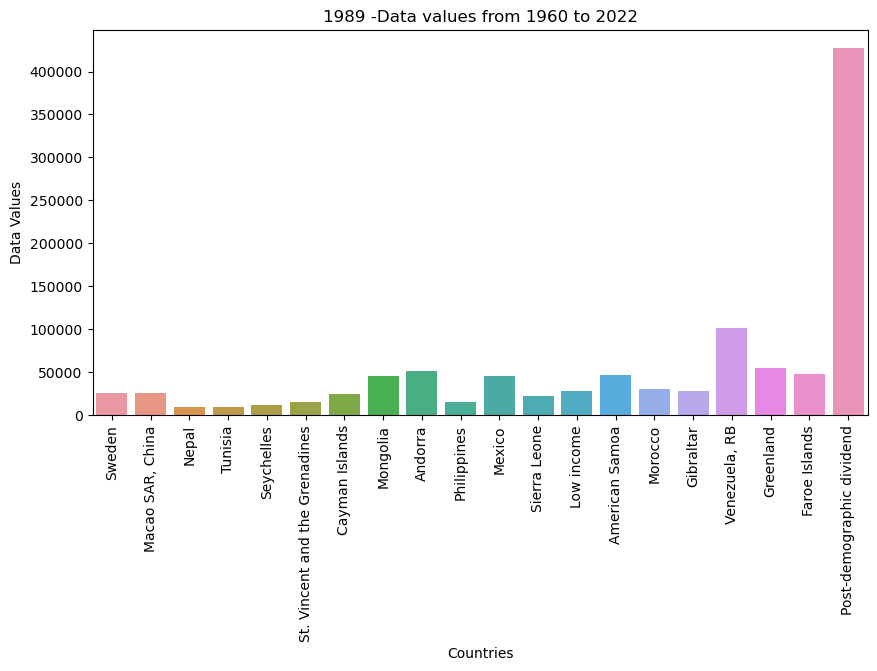

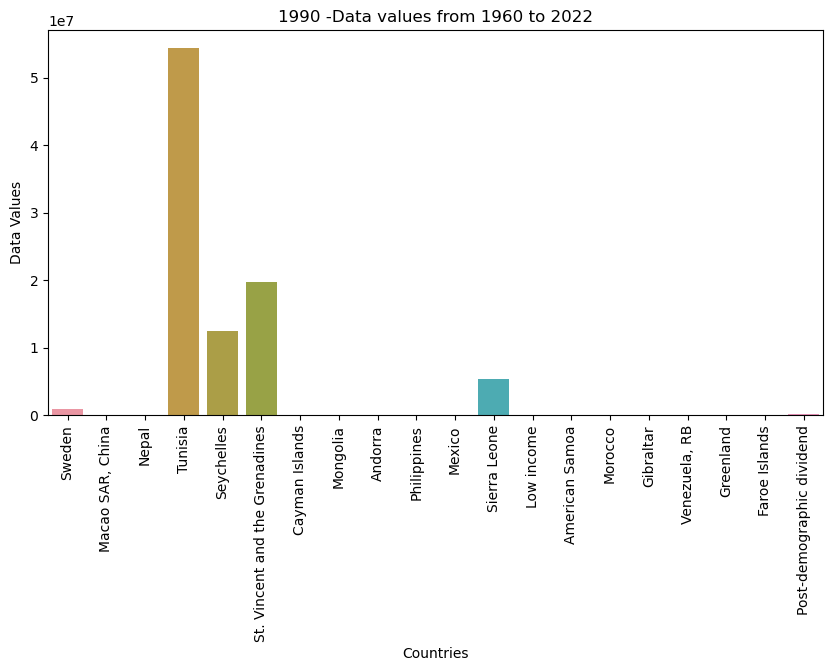

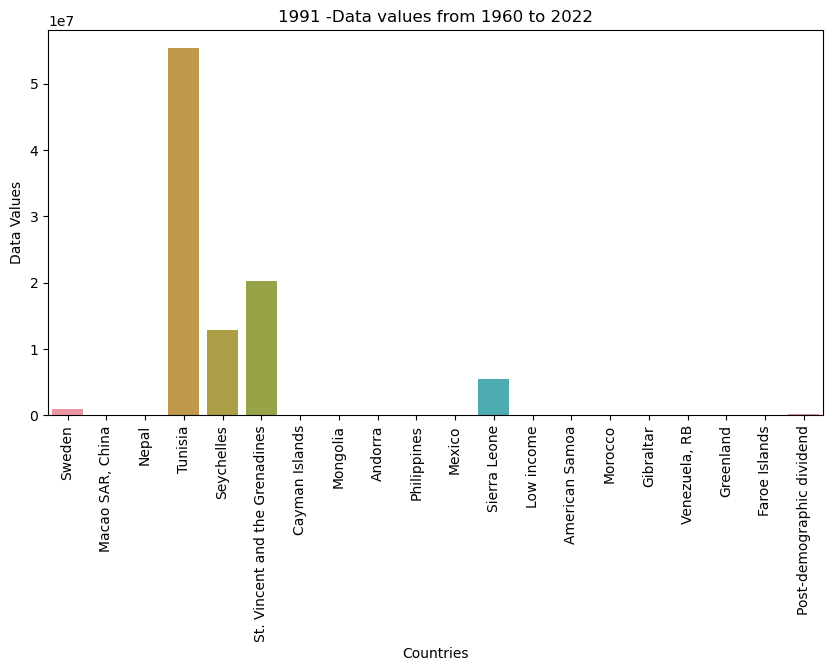

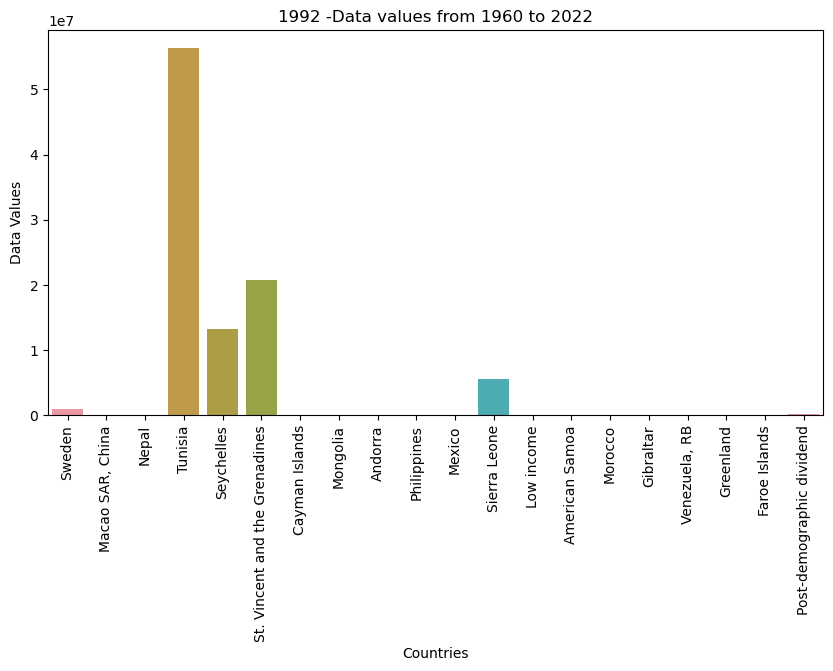

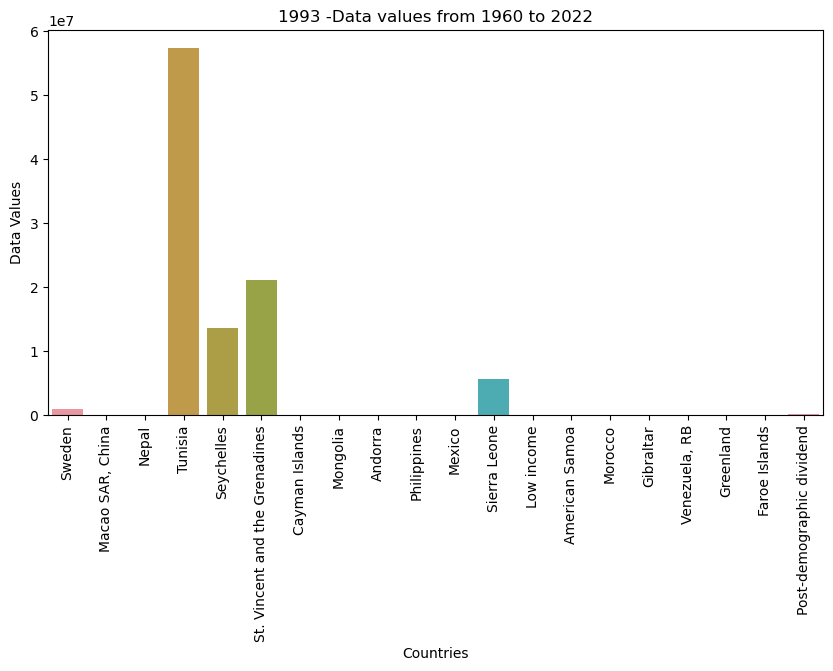

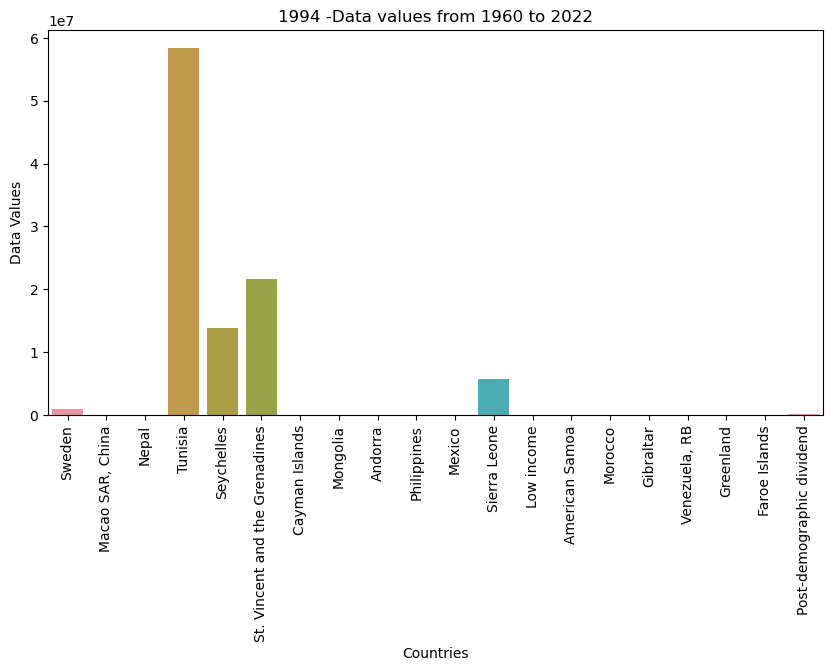

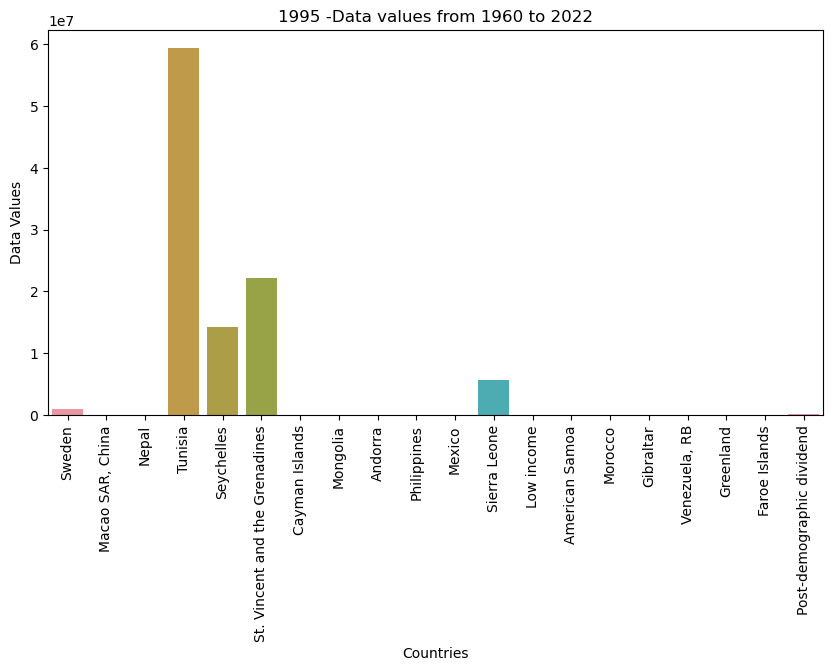

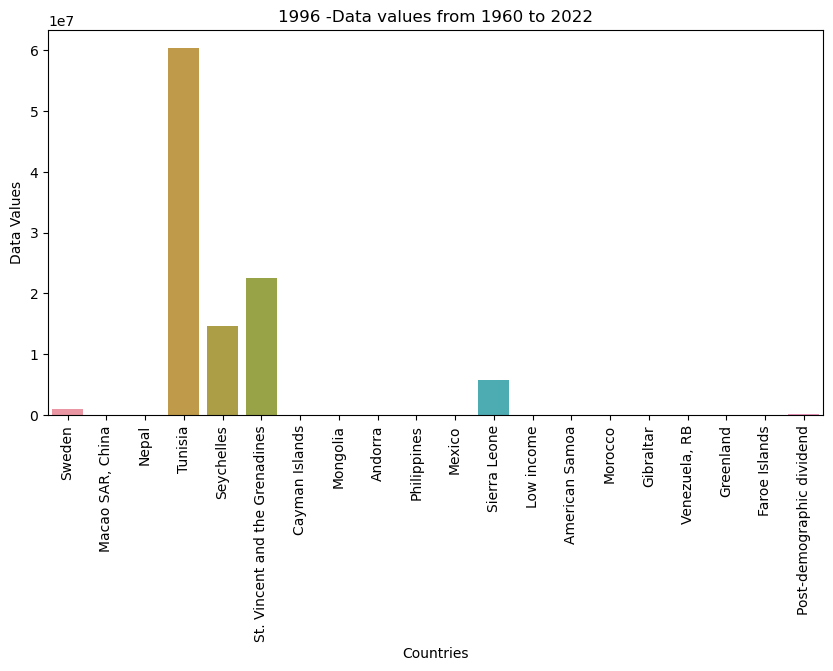

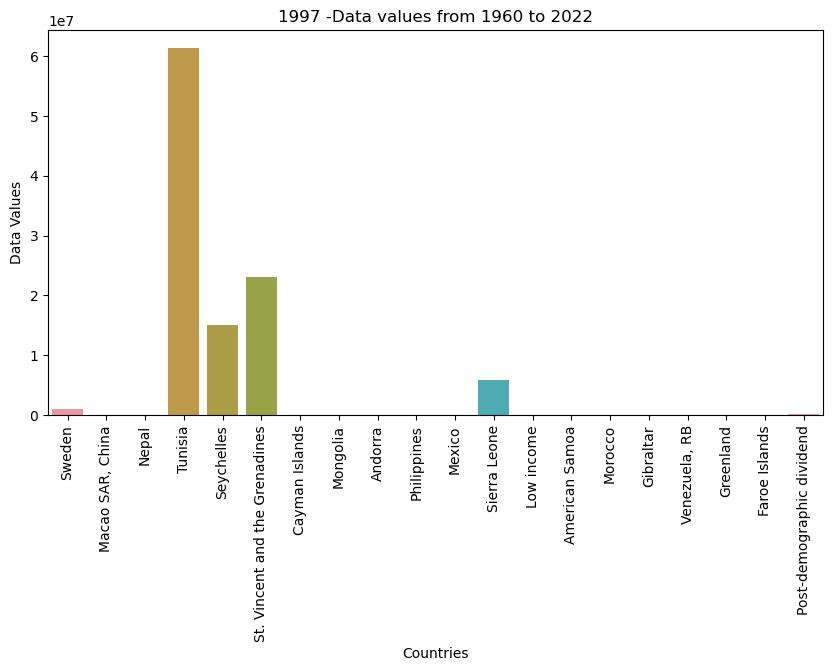

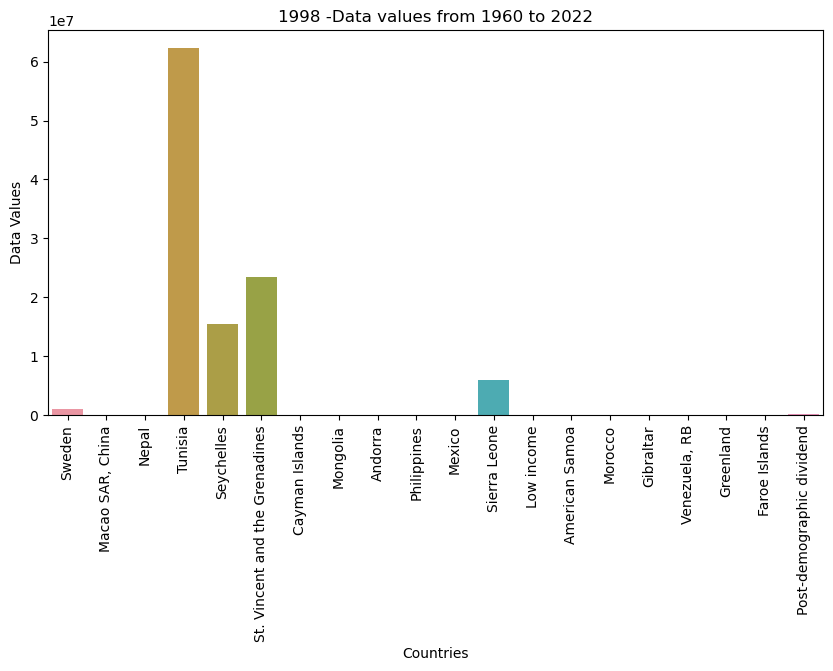

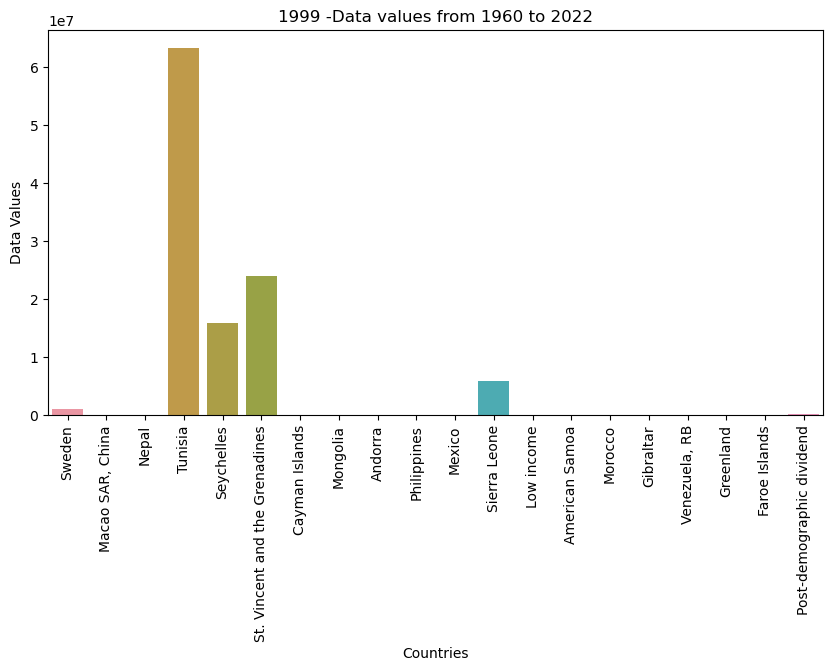

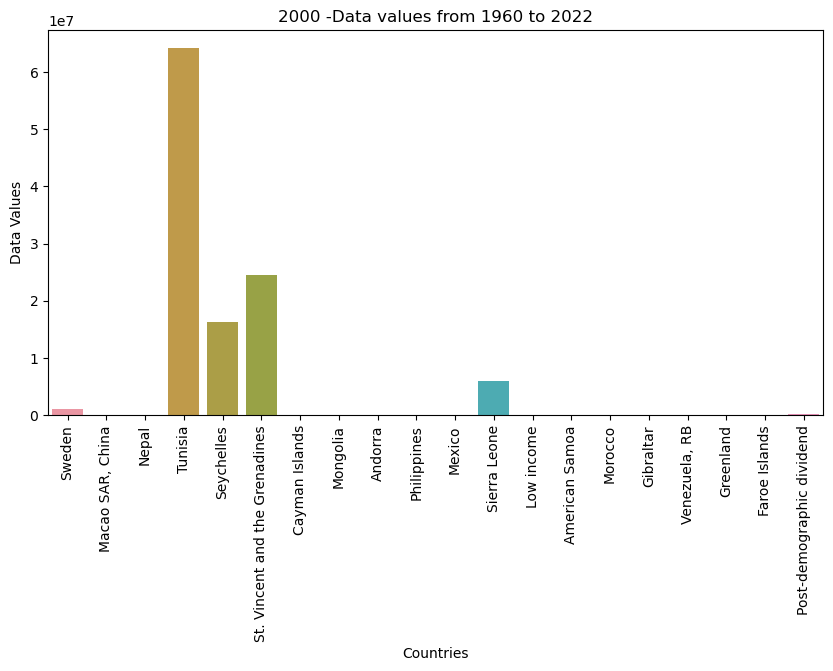

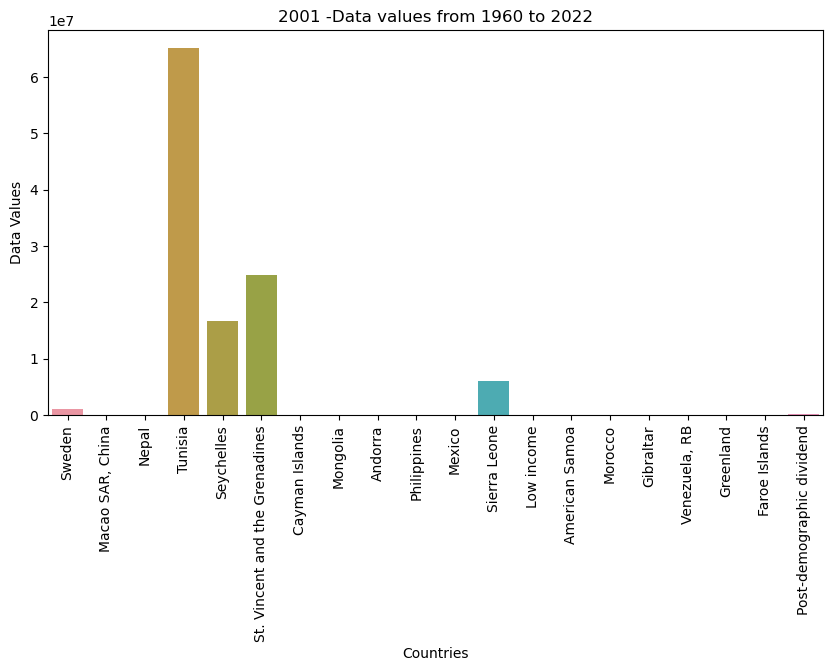

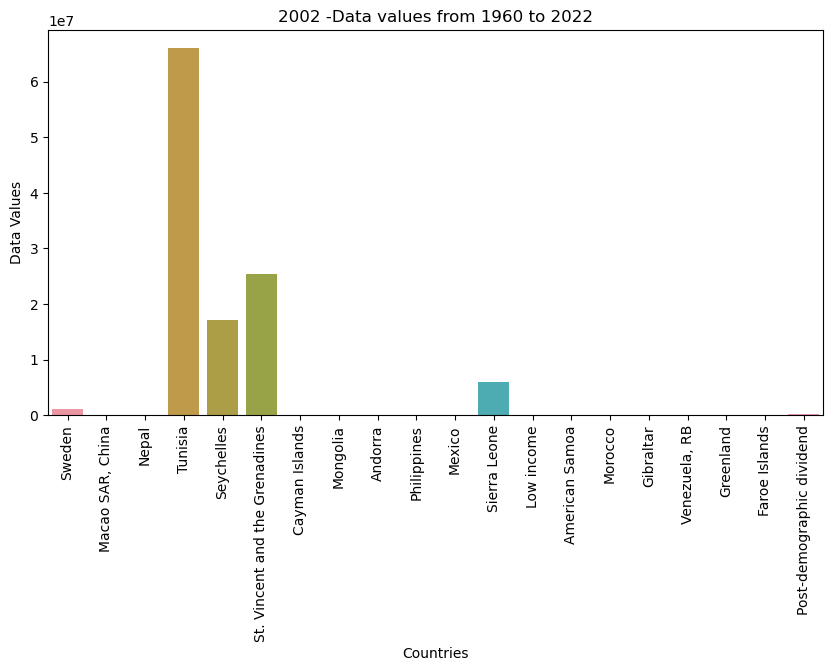

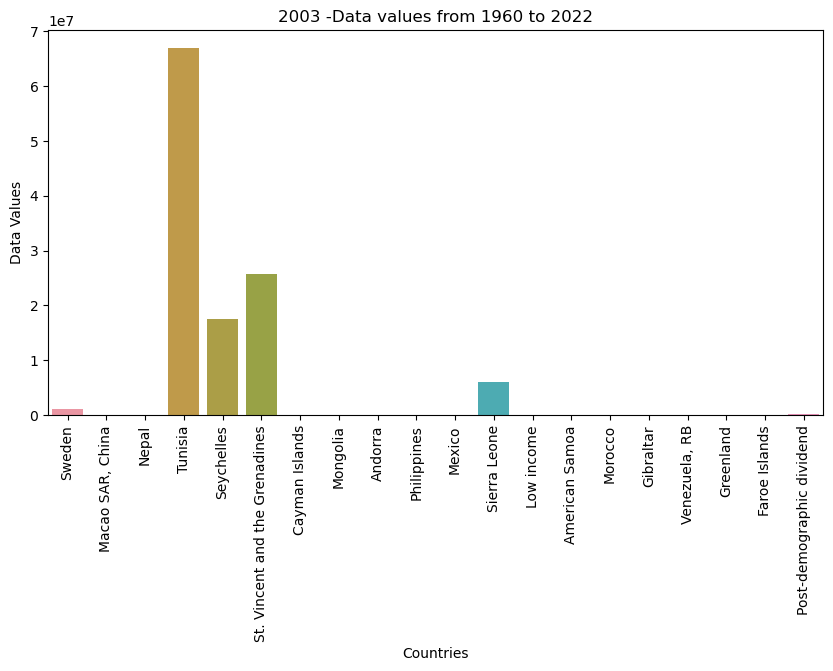

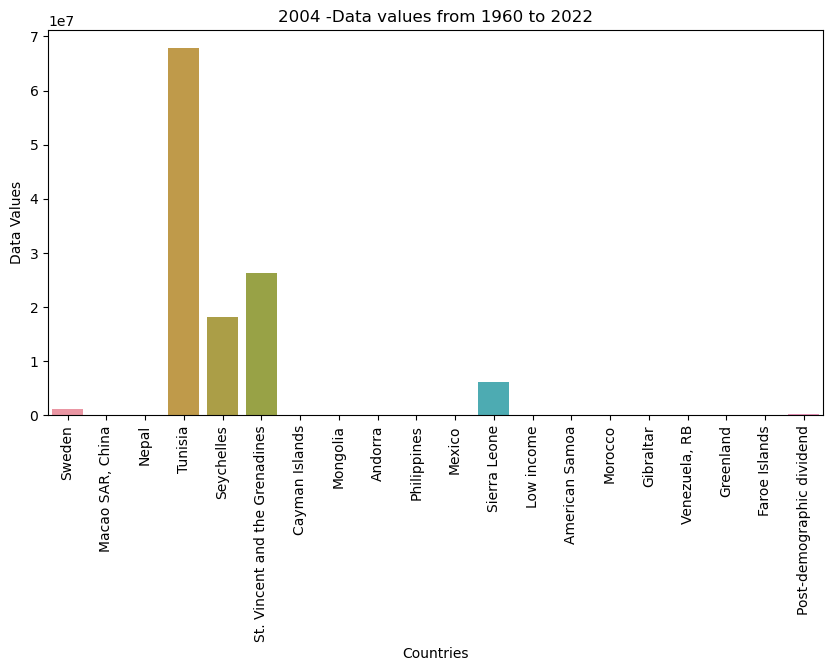

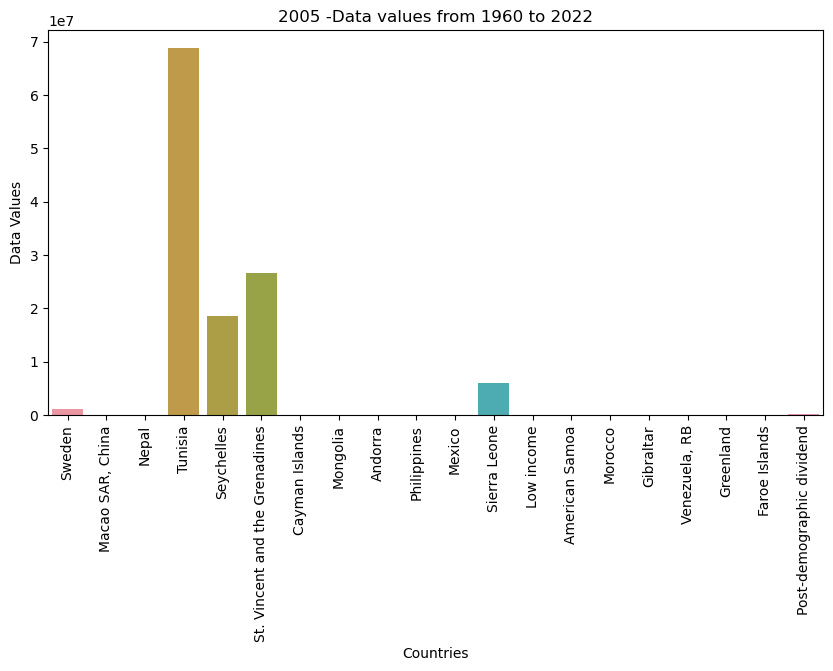

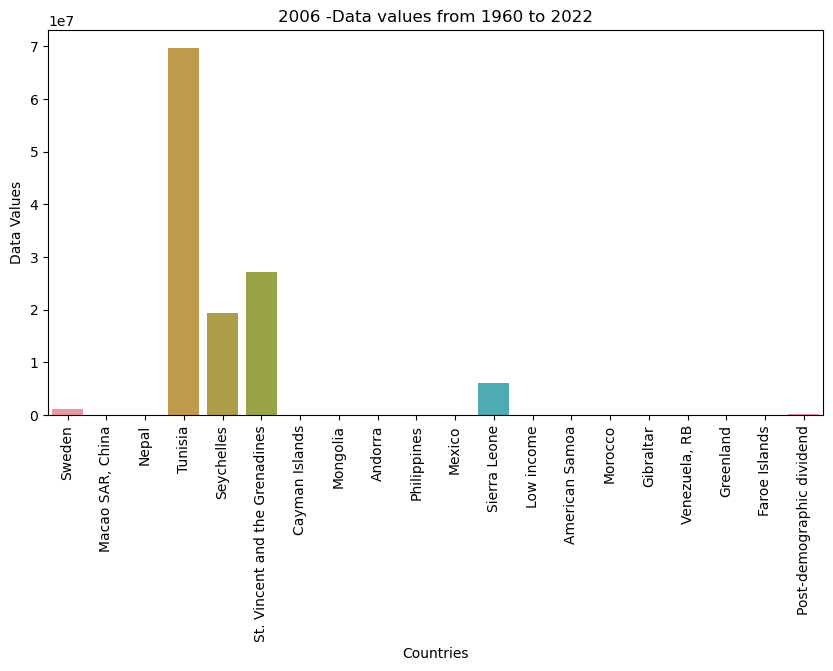

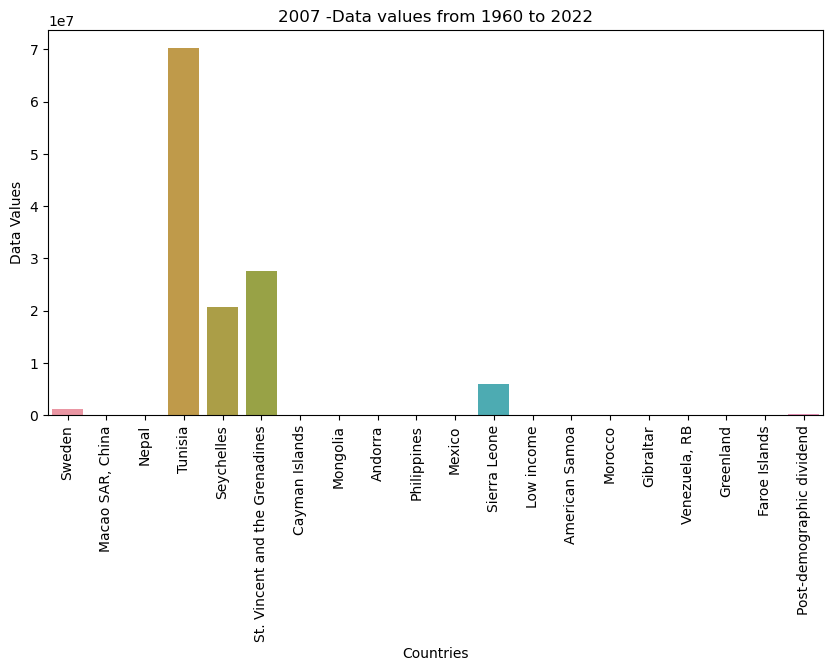

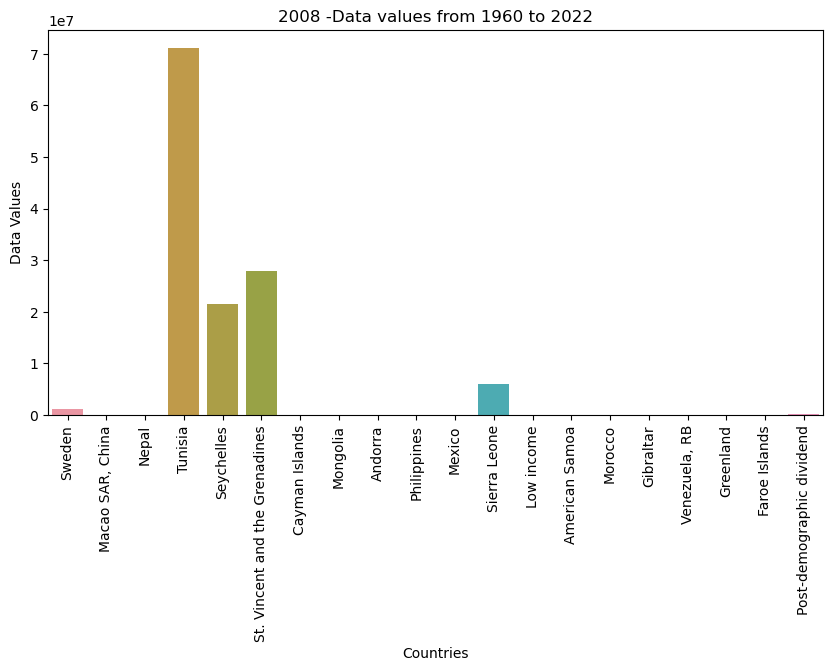

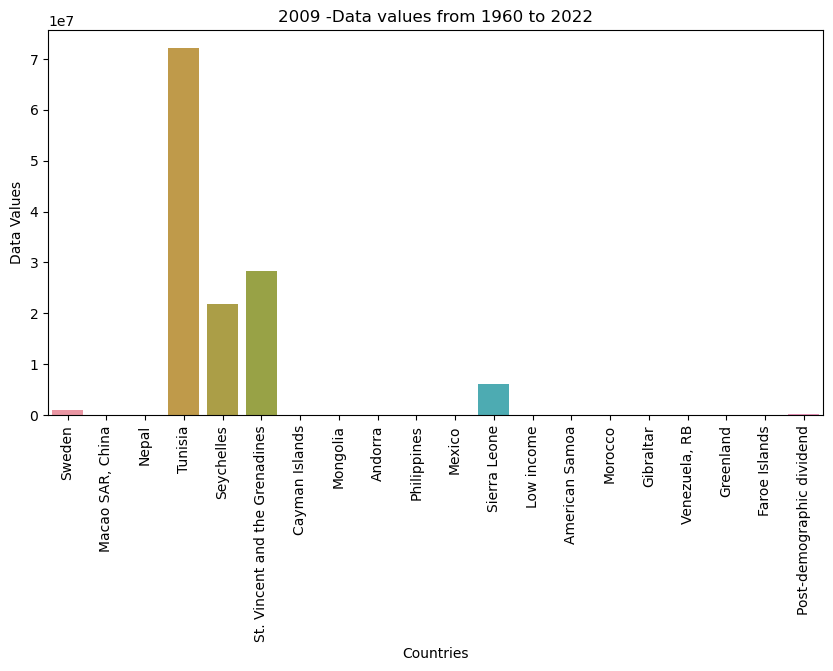

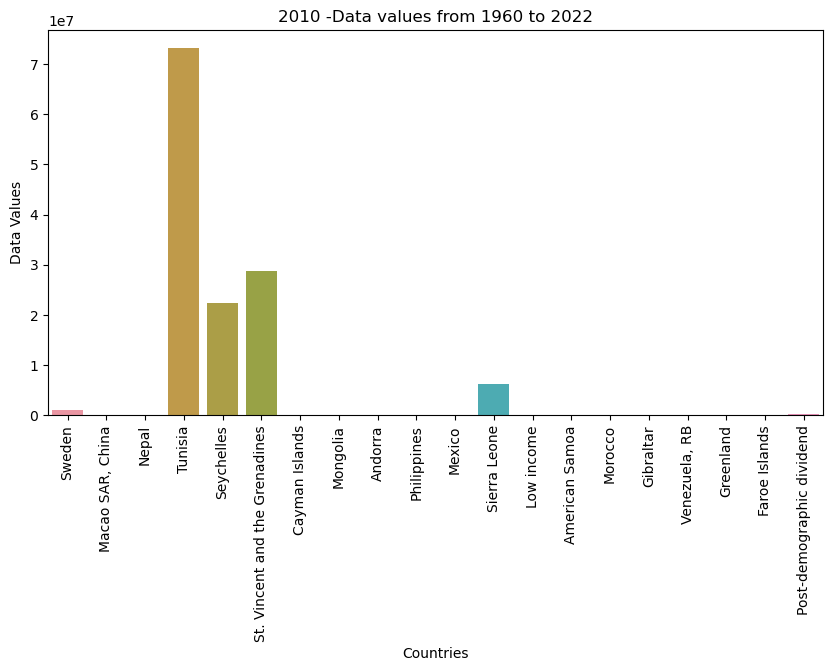

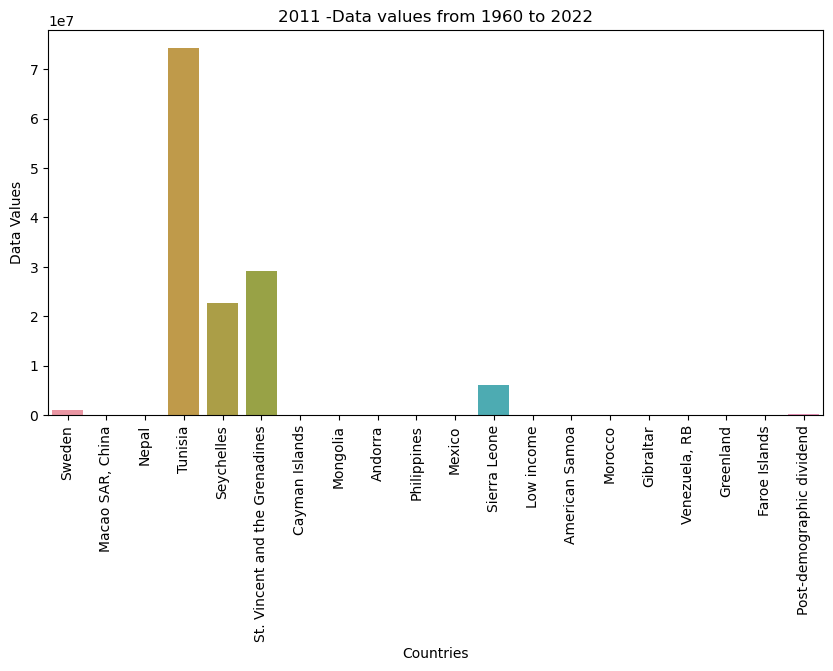

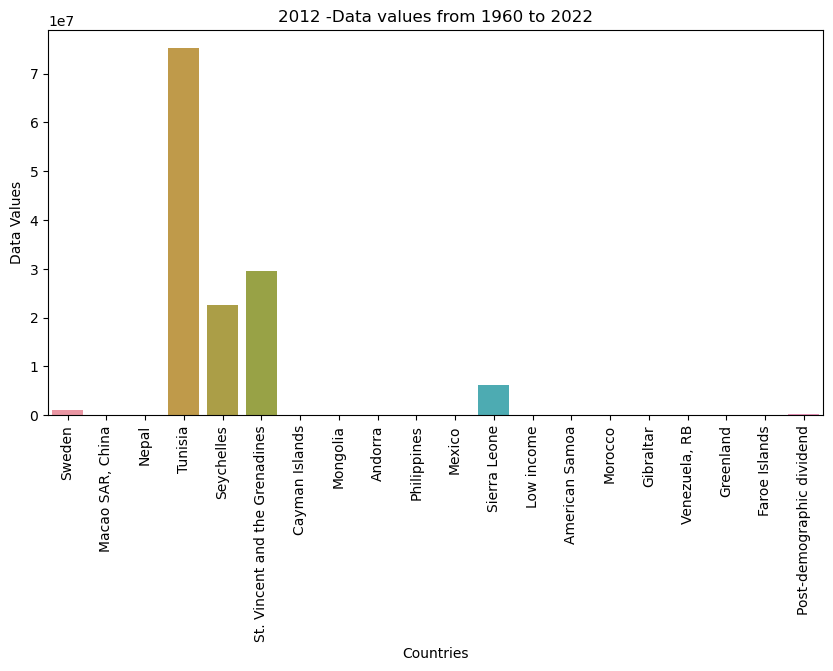

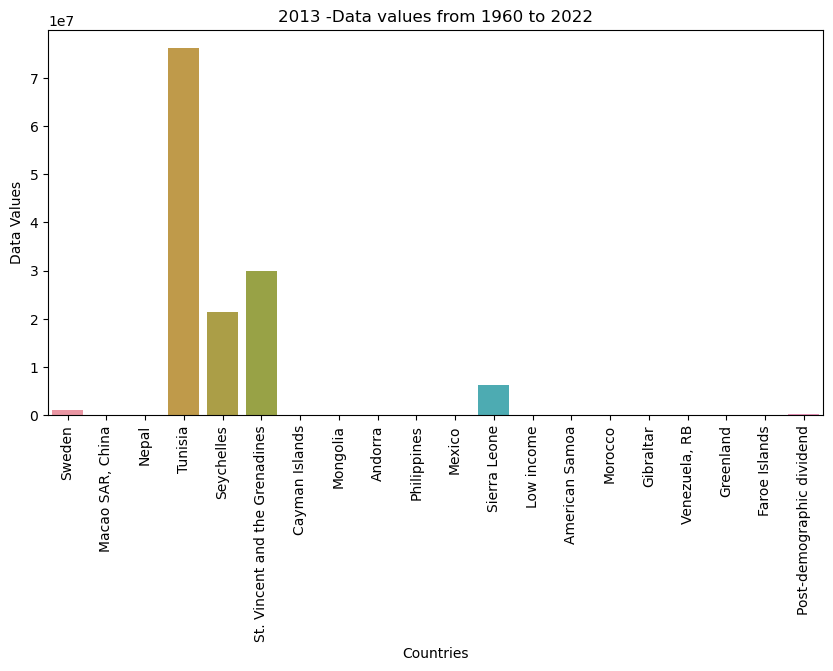

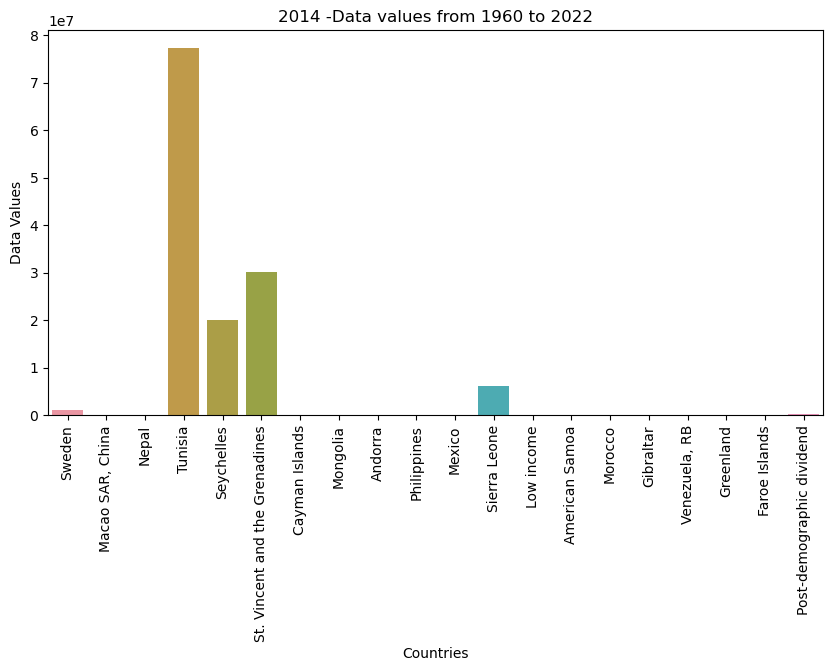

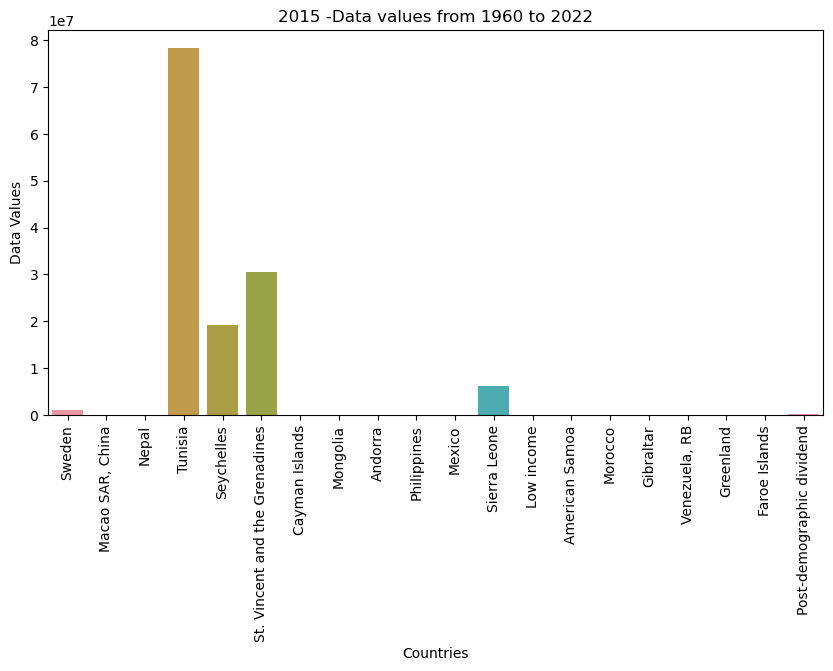

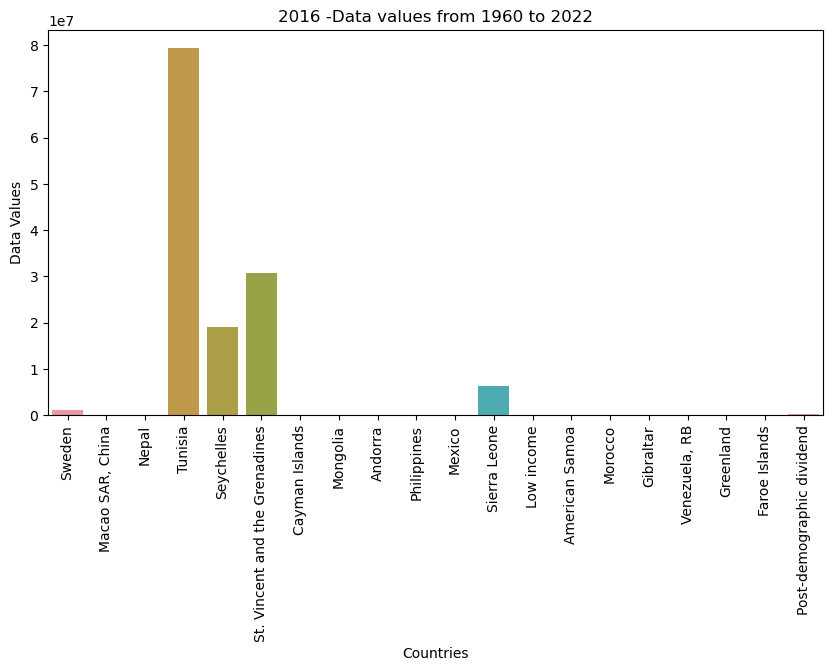

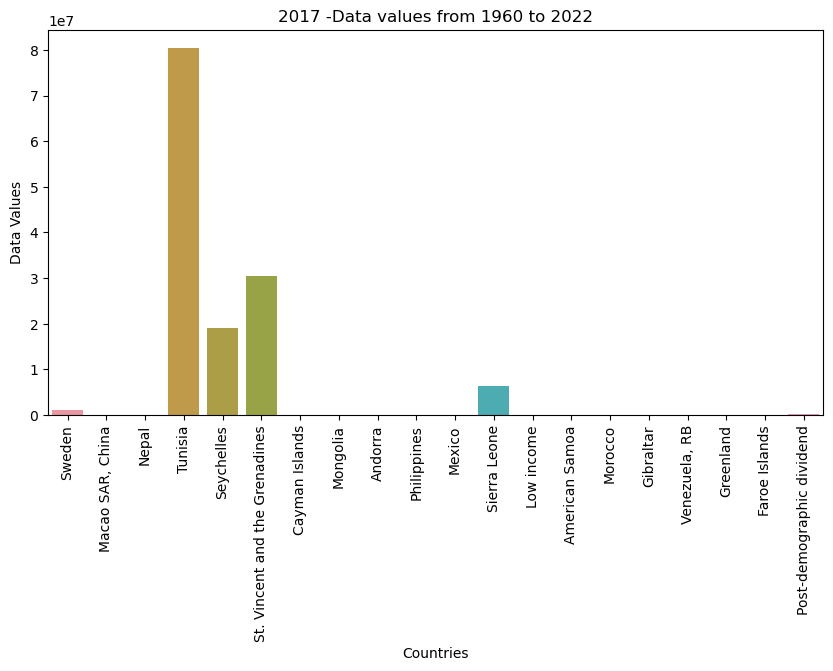

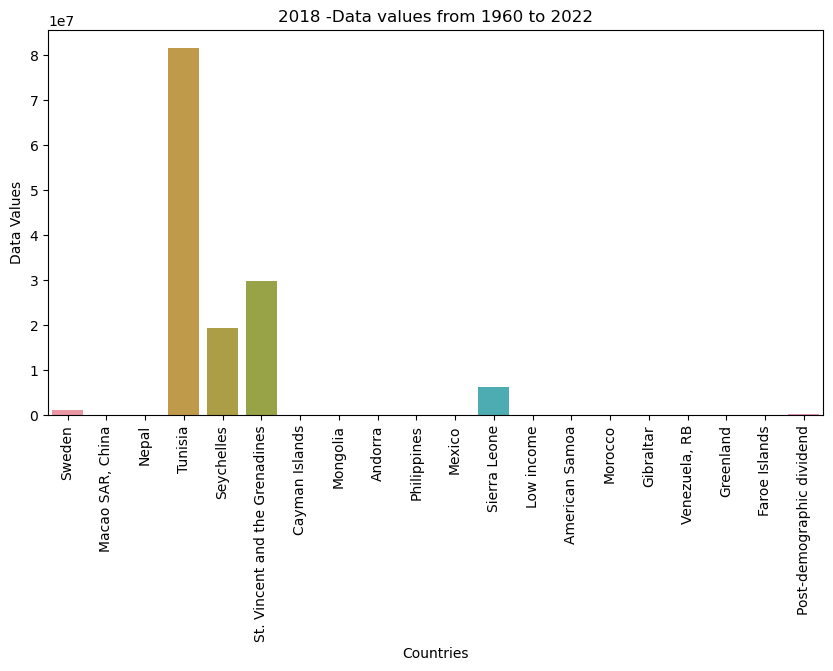

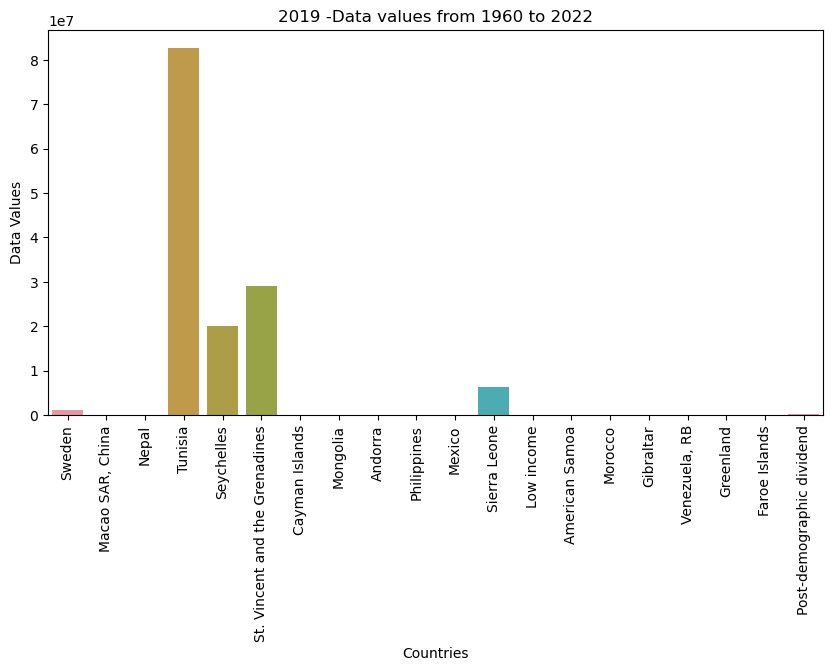

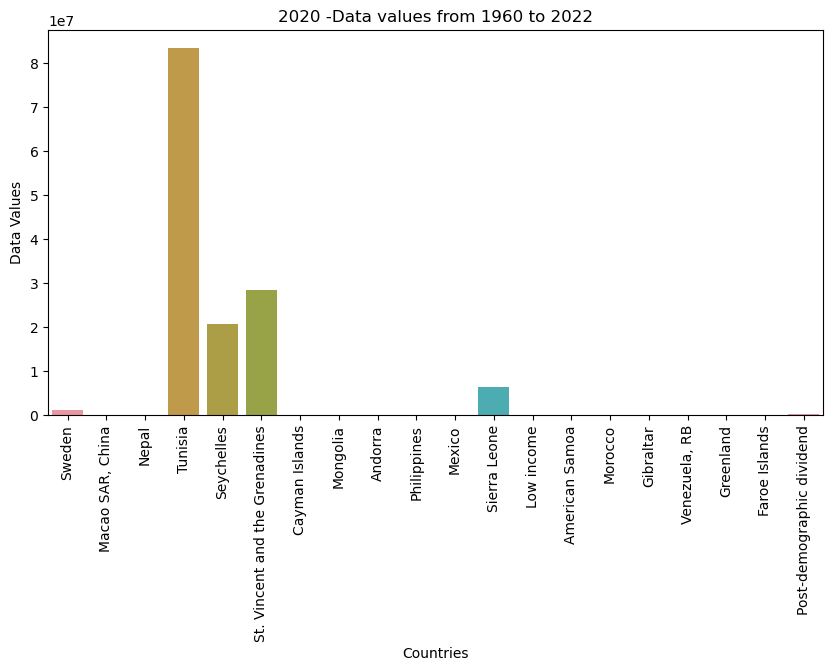

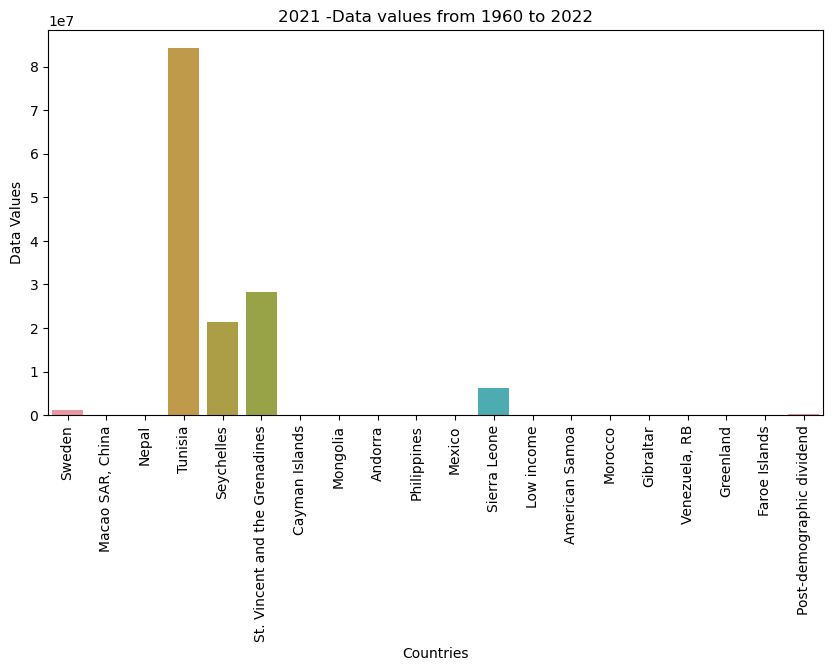

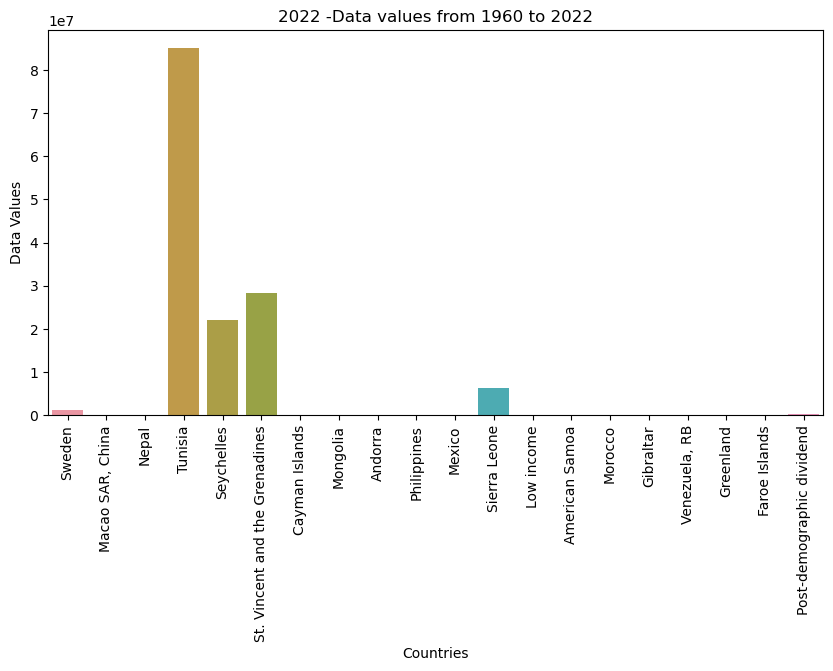

In [83]:
country_by_2022_t=country_by_2022.set_index('Country Name').T
for country_name,data_values in country_by_1960_t.iterrows():
    fig=plt.figure(figsize=(10,5))
    sns.barplot(x=data_values.index, y=data_values.values)
    plt.xlabel('Countries')
    plt.ylabel('Data Values')
    plt.title(f'{country_name} -Data values from 1960 to 2022')
    plt.xticks(rotation=90)
    plt.show()

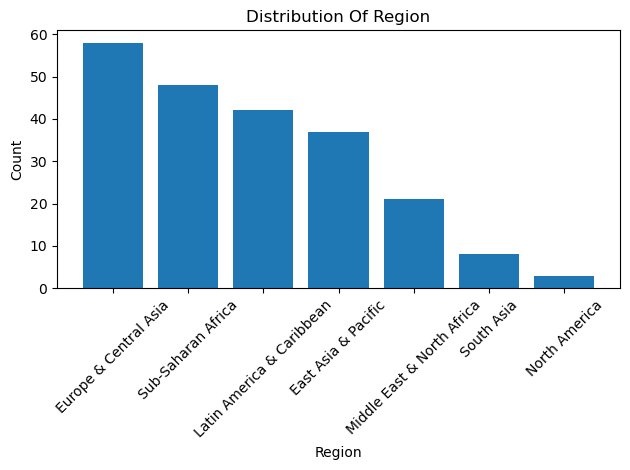

In [85]:
gender_counts=df['Region'].value_counts()
bar_width=0.9
x=range(len(gender_counts.index))

plt.bar(gender_counts.index,gender_counts.values)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution Of Region')


plt.xticks(x,gender_counts.index,rotation=45)
plt.tight_layout()
plt.show()

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Code  265 non-null    object 
 1   Region        217 non-null    object 
 2   IncomeGroup   216 non-null    object 
 3   SpecialNotes  126 non-null    object 
 4   TableName     265 non-null    object 
 5   Unnamed: 5    0 non-null      float64
dtypes: float64(1), object(5)
memory usage: 12.5+ KB


In [87]:
df.describe()

Unnamed: 5
count         0.0
mean          NaN
std           NaN
min           NaN
25%           NaN
50%           NaN
75%           NaN
max           NaN

In [88]:
df.isnull().sum()

Country Code      0
Region           48
IncomeGroup      49
SpecialNotes    139
TableName         0
Unnamed: 5      265
dtype: int64